# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [1]:
# Define local and AWS environment variables
local = 1
aws = 0

if local:
    base_path = "/Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/linear-regression/"
    raw_data = base_path + "data/raw/"
    processed_data = base_path + "data/processed/"
    models = base_path + "models/"

if aws:
    base_path = "s3://ml-data-masters/04-ML-Models/linear-regression/"
    raw_data = base_path + "data/raw/"
    processed_data = base_path + "data/processed/"
    models = base_path + "models/"

In [97]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, lasso_path
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression

import statsmodels.formula.api as sm  # API for statsmodels

from IPython.display import display
from collections import Counter
from pprint import pprint 

from warnings import filterwarnings
filterwarnings('ignore')


#### **1.1.1**
Load the dataset

In [3]:
# Load the data
df_raw = pd.read_csv(raw_data + "Car_Price_data.csv")
df_raw.head()


make_model body_type  price               vat       km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible  83450.0  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible  73000.0  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible  16200.0  Used   Diesel   

   Gears                                Comfort_Convenience  \
0    7.0  Air conditioning,Armrest,Automatic climate con...   
1    7.0  Air conditioning,Automatic climate control,Hil...   
2    7.0  Air conditioning,Cruise control,Electrical sid...   
3    6.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4    7.0  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  ... Previous_Owners  \
0  Bluetooth,Hands-free equipment,On-board comput...  ...             2.0   
1  Bluetooth,Hands-free equipment,On-board comput...  ...             1.0   
2                              MP3,On-board computer  ...             1.0   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   

   hp_kW  Inspection_new  Paint_Type  Upholstery_type  Gearing_Type  \
0   66.0               1    Metallic            Cloth     Automatic   
1  141.0               0    Metallic            Cloth     Automatic   
2   85.0               0    Metallic            Cloth     Automatic   
3   66.0               0    Metallic            Cloth     Automatic   
4   66.0               1    Metallic            Cloth     Automatic   

  Displacement_cc Weight_kg Drive_chain  cons_comb  
0          1422.0    1220.0       front        3.8  
1          1798.0    1255.0       front        5.6  
2          1598.0    1135.0       front        3.8  
3          1422.0    1195.0       front        3.8  
4          1422.0    1135.0       front        4.1  

[5 rows x 23 columns]

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [5]:
# Standardize column names by converting to lowercase and replacing spaces with underscores
df_raw.columns = df_raw.columns.str.lower().str.replace(' ', '_')

**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

In [6]:
# Define categorical and numeric predictor columns

cat_columns = [
    'make_model', 'body_type', 'vat', 'type', 'fuel',
    'comfort_convenience', 'entertainment_media', 'extras', 'safety_security',
    'paint_type', 'upholstery_type',
    'gearing_type', 'drive_chain'
]

num_columns = [
    'km', 'gears', 'previous_owners', 'hp_kw', 'displacement_cc',
    'weight_kg', 'cons_comb',
    'age', 'inspection_new'
]

# Further categorize numerical predictor columns based on imputation strategy
num_median_columns = ['km', 'age']
num_mode_columns = ['gears', 'previous_owners', 'inspection_new']
num_mean_columns = ['hp_kw','weight_kg', 'cons_comb', 'displacement_cc']

# Define feature and target columns
target_column = ['price']
feature_columns = [col for col in df_raw.columns if col != 'price'] 

**Categorical Columns Imputation Strategy**
- Use mode for all

**Numeric Columns Imputation Strategy**

If target column has missing values, better to drop the rows as imputing target variable can lead to bias

For other columns, follow below strategy:
- price → median (target variable, drop if few missing, but if you need imputation, prices are skewed → median safer than mean)
- km → median (mileage usually skewed, better than mean)
- Gears → mode (discrete small integers, categorical-like)
- age → median (skewed distribution possible, median more robust)
- Inspection_new → mode (binary categorical 0/1)
- Previous_Owners → mode (small integers, categorical-like)
- hp_kW → mean or median (engine power is continuous; if distribution is fairly symmetric → mean, otherwise median)
- Displacement_cc → mean (engine displacement usually continuous & symmetric within ranges)
- Weight_kg → mean (continuous, symmetric, less outlier-prone)
- cons_comb → mean (fuel consumption is continuous, usually normal-ish)

In [7]:
# Find the proportion of missing values in each column and handle if found

def handle_missing_values(df=df_raw):

    def analyze_missing_values(df):
        # Create a dataset with list of columns and their missing value proportions

        missingValues = {'column_name': df.columns,
                         'data_type': df.dtypes,
                         'missing_count': df.isnull().sum(),
                         'missing_percentage': df.isnull().mean() * 100}
        missing_values = pd.DataFrame(missingValues).sort_values(by='missing_percentage', ascending=False).reset_index(drop=True)

        conditions_for_impute = [
                        (missing_values['column_name'].isin(target_column)),
                        (missing_values['column_name'].isin(categorical_cols)),
                        (missing_values['column_name'].isin(num_median_columns)),
                        (missing_values['column_name'].isin(num_mean_columns)),
                        (missing_values['column_name'].isin(num_mode_columns))
                    ]
        choices_for_impute = ['drop', 'mode', 'median', 'mean', 'mode']
        missing_values['impute_type'] = np.select(conditions_for_impute, choices_for_impute, default='unknown')

        conditions = [
                        (missing_values['impute_type'] == 'none'),
                        (missing_values['missing_percentage'] == 0),
                        (missing_values['missing_percentage'] > 0) & (missing_values['missing_percentage'] <= 5),
                        (missing_values['missing_percentage'] > 5) & (missing_values['missing_percentage'] <= 30),
                        (missing_values['missing_percentage'] > 30)
                    ]
        choices = ['none', 'none', 'drop', 'impute', 'drop']
        missing_values['action'] = np.select(conditions, choices, default='unknown') 

        return missing_values

    # Define categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    #numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Analyse missing values and identify action
    missing_values = analyze_missing_values(df)
    display(missing_values)

    print(f"Strategy for handling missing values:")
    print(f"If target column has missing values, better to drop the rows as imputing target variable can lead to bias")
    print(f"For other columns, follow below strategy:")
    print(f"- Missing values percentage = 0% : No action needed")
    print(f"- Missing values percentage > 0% and <= 5% : Drop the column")
    print(f"- Missing values percentage > 5% and <= 30% : Impute missing values")
    print(f"- Missing values percentage > 30% : Check data source, likely drop the column")

    print(f"\nCategorical columns: {categorical_cols}")
    print(f"Numerical columns with median imputation: {num_median_columns}")
    print(f"Numerical columns with mean imputation: {num_mean_columns}")
    print(f"Numerical columns with mode imputation: {num_mode_columns}")

    # Handle missing values based on the action determined
    for index, row in missing_values.iterrows():
        col = row['column_name']
        action = row['action']

        if (col not in target_column) & (action == 'drop'):
            df.drop(columns=[col], inplace=True)
        elif action == 'impute':
            if col in num_median_columns:
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)
            elif col in num_mean_columns:
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
            elif col in categorical_cols:
                mode_value = df[col].mode()[0]
                df[col].fillna(mode_value, inplace=True)
        else:
            pass  # No action needed for 'none' or unknown actions

    return df

df_processed = handle_missing_values(df_raw)


column_name data_type  missing_count  missing_percentage  \
0            make_model    object              0                 0.0   
1                   age   float64              0                 0.0   
2           drive_chain    object              0                 0.0   
3             weight_kg   float64              0                 0.0   
4       displacement_cc   float64              0                 0.0   
5          gearing_type    object              0                 0.0   
6       upholstery_type    object              0                 0.0   
7            paint_type    object              0                 0.0   
8        inspection_new     int64              0                 0.0   
9                 hp_kw   float64              0                 0.0   
10      previous_owners   float64              0                 0.0   
11      safety_security    object              0                 0.0   
12            body_type    object              0                 0.0   
13               extras    object              0                 0.0   
14  entertainment_media    object              0                 0.0   
15  comfort_convenience    object              0                 0.0   
16                gears   float64              0                 0.0   
17                 fuel    object              0                 0.0   
18                 type    object              0                 0.0   
19                   km   float64              0                 0.0   
20                  vat    object              0                 0.0   
21                price     int64              0                 0.0   
22            cons_comb   float64              0                 0.0   

   impute_type action  
0         mode   none  
1       median   none  
2         mode   none  
3         mean   none  
4         mean   none  
5         mode   none  
6         mode   none  
7         mode   none  
8         mode   none  
9         mean   none  
10        mode   none  
11        mode   none  
12        mode   none  
13        mode   none  
14        mode   none  
15        mode   none  
16        mode   none  
17        mode   none  
18        mode   none  
19      median   none  
20        mode   none  
21        drop   none  
22        mean   none

Strategy for handling missing values:
If target column has missing values, better to drop the rows as imputing target variable can lead to bias
For other columns, follow below strategy:
- Missing values percentage = 0% : No action needed
- Missing values percentage > 0% and <= 5% : Drop the column
- Missing values percentage > 5% and <= 30% : Impute missing values
- Missing values percentage > 30% : Check data source, likely drop the column

Categorical columns: ['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience', 'entertainment_media', 'extras', 'safety_security', 'paint_type', 'upholstery_type', 'gearing_type', 'drive_chain']
Numerical columns with median imputation: ['km', 'age']
Numerical columns with mean imputation: ['hp_kw', 'weight_kg', 'cons_comb', 'displacement_cc']
Numerical columns with mode imputation: ['gears', 'previous_owners', 'inspection_new']


#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

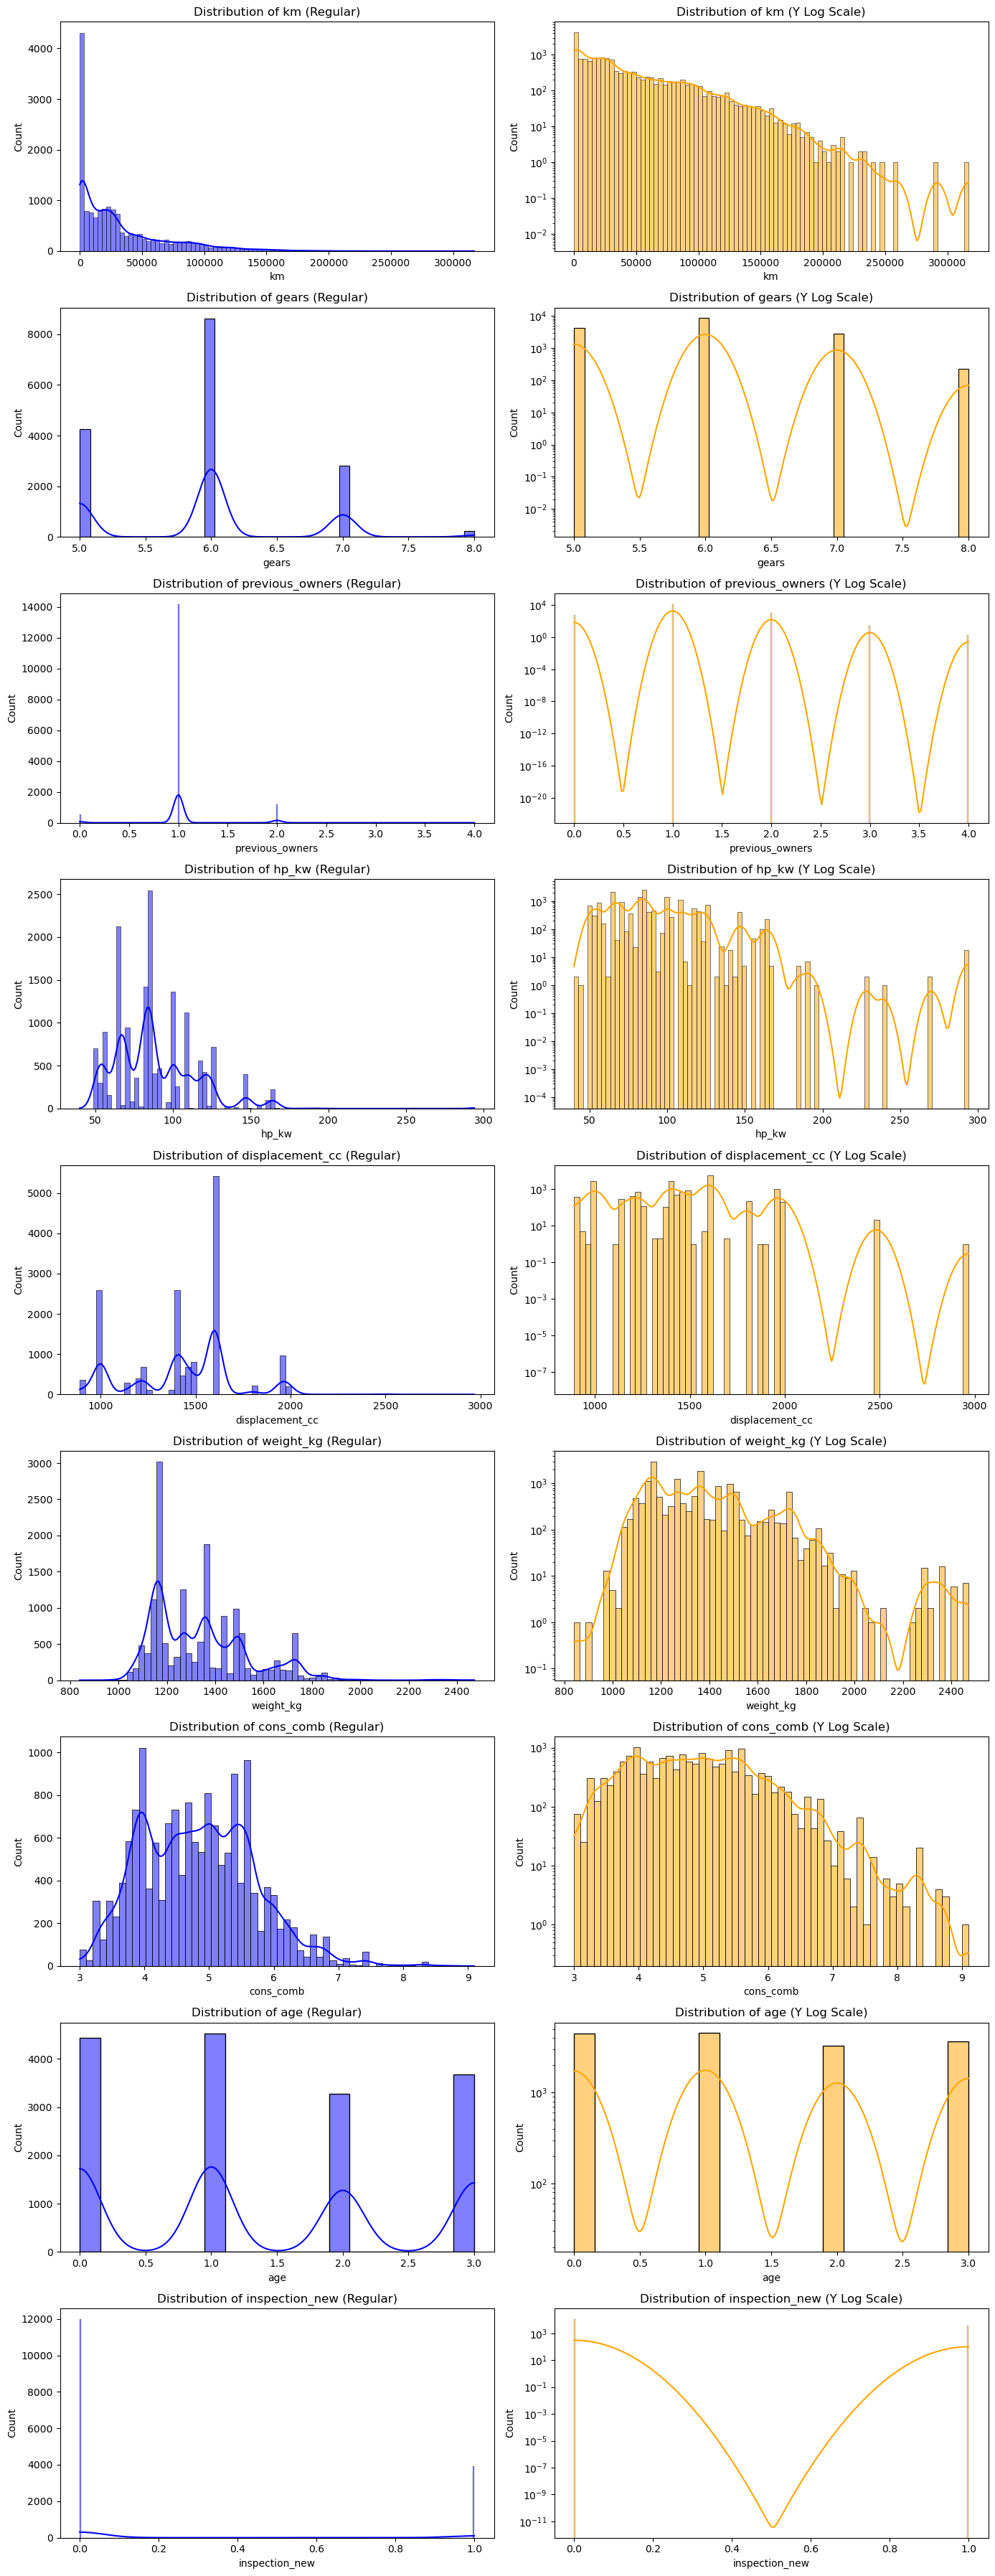

In [8]:
# Identify numerical features and plot histograms

# All numerical features are in num_columns list defined above

def plot_numerical_histograms(df, numerical_cols, plot_ylog=True):
    if plot_ylog:
        n_cols = 2
        n_rows = len(numerical_cols)
        plt.figure(figsize=(14, n_rows * 4))

        for idx, col in enumerate(numerical_cols):
            # Regular scale
            plt.subplot(n_rows, n_cols, idx * 2 + 1)
            sns.histplot(df[col], kde=True, color='blue')
            plt.title(f"Distribution of {col} (Regular)")

            # Log scale (y-axis)
            plt.subplot(n_rows, n_cols, idx * 2 + 2)
            sns.histplot(df[col], kde=True, color='orange')
            plt.yscale('log')
            plt.title(f"Distribution of {col} (Y Log Scale)")

        plt.tight_layout()
    else:
        n_cols = 1
        n_rows = len(numerical_cols)
        plt.figure(figsize=(7, n_rows * 4))

        for idx, col in enumerate(numerical_cols):
            plt.subplot(n_rows, n_cols, idx + 1)
            sns.histplot(df[col], kde=True, color='blue')
            plt.title(f"Distribution of {col}")

        plt.tight_layout()
    plt.show()

plot_numerical_histograms(df_processed, num_columns)


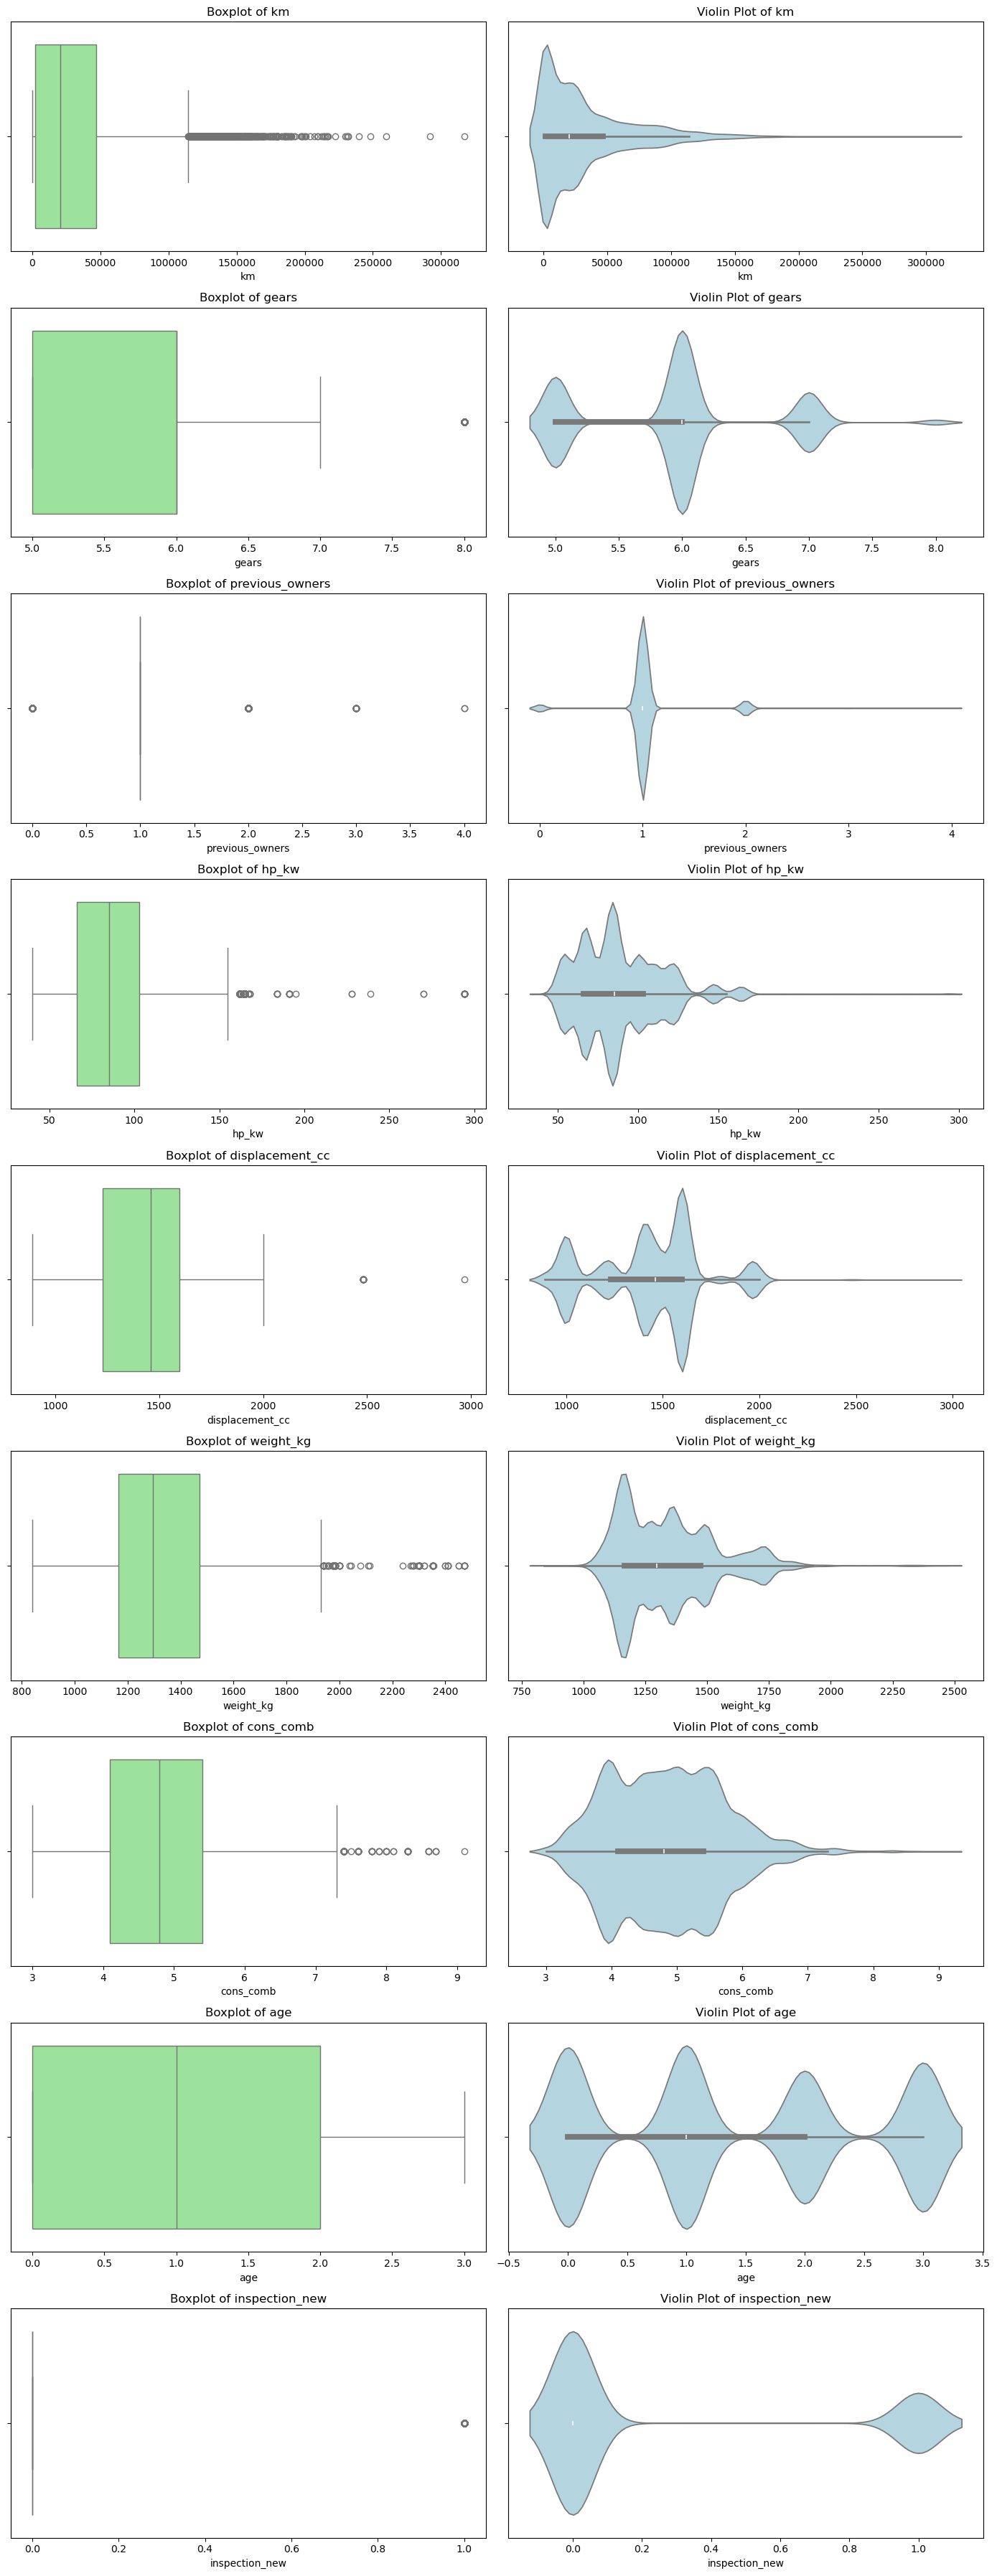

In [9]:
def plot_numerical_boxplots_and_violins(df, numerical_cols):
    n_cols = 2
    n_rows = len(numerical_cols)
    plt.figure(figsize=(14, n_rows * 4))

    for idx, col in enumerate(numerical_cols):
        # Boxplot
        plt.subplot(n_rows, n_cols, idx * 2 + 1)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f"Boxplot of {col}")

        # Violin plot
        plt.subplot(n_rows, n_cols, idx * 2 + 2)
        sns.violinplot(x=df[col], color='lightblue')
        plt.title(f"Violin Plot of {col}")

    plt.tight_layout()
    plt.show()

plot_numerical_boxplots_and_violins(df_processed, num_columns)

#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

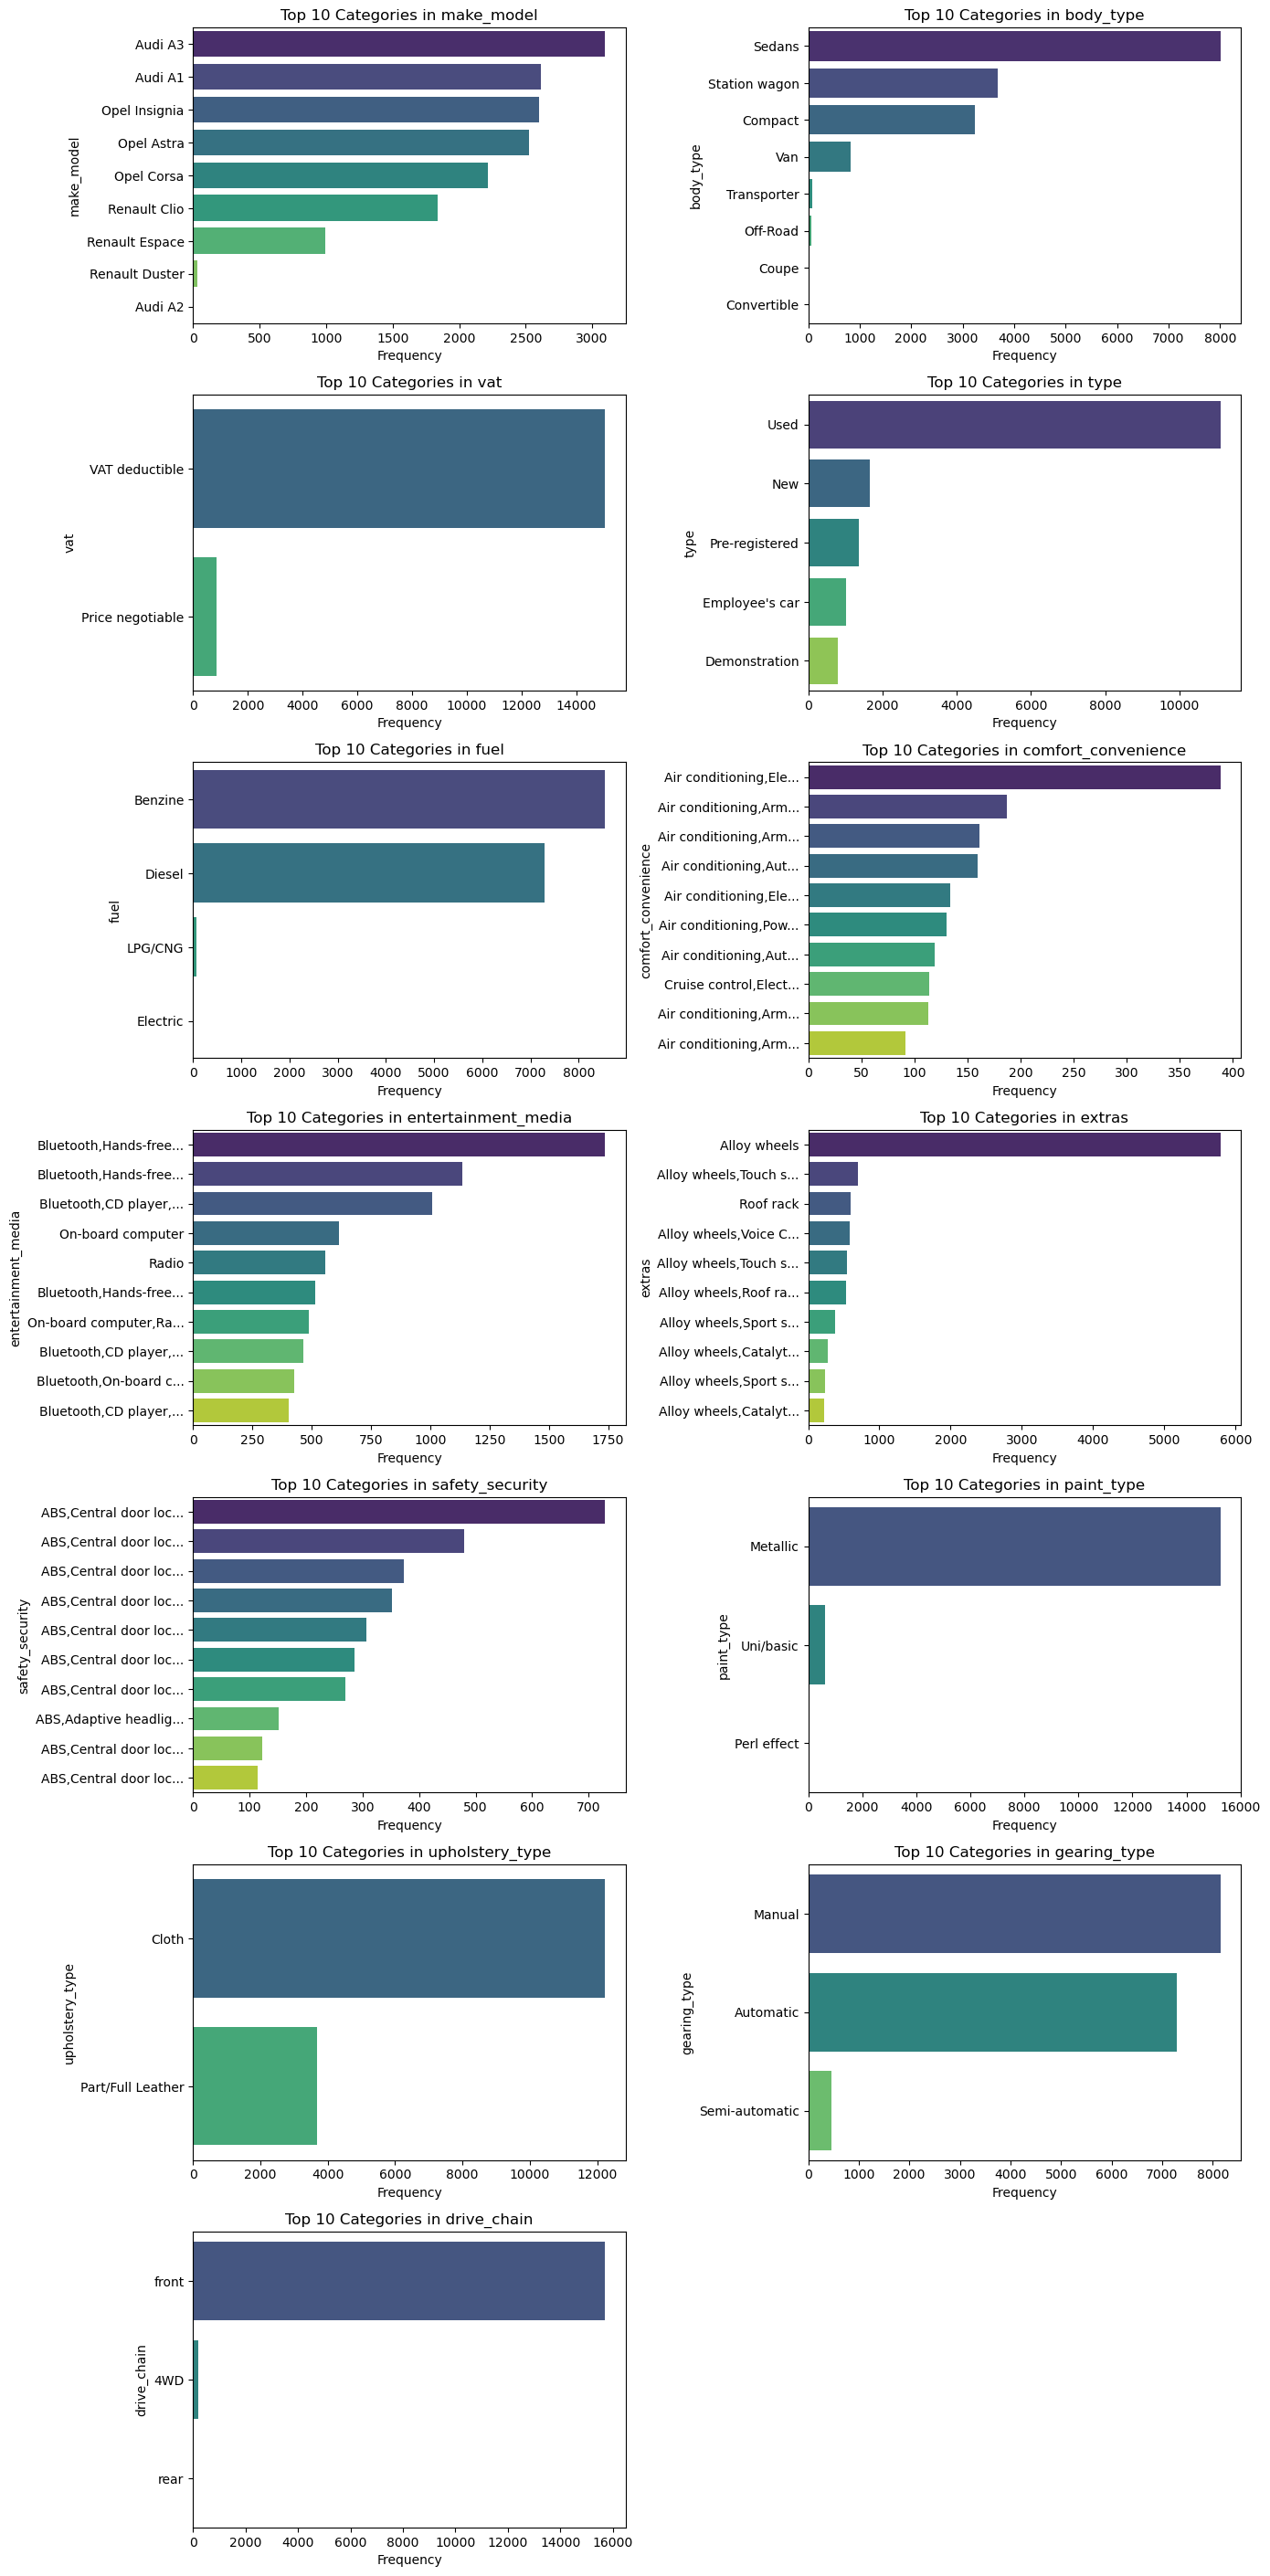

In [10]:
# Identify categorical columns and check their frequency distributions

# All categorical features are in cat_columns list defined above

def plot_categorical_frequencies(df, categorical_cols):
    n_cols = 2
    n_rows = len(categorical_cols)
    plt.figure(figsize=(14, n_rows * 4))

    for idx, col in enumerate(categorical_cols):
        plt.subplot(n_rows, n_cols, idx + 1)
        value_counts = df[col].value_counts().head(10)  # .head(10) for Top 10 categories
        sns.barplot(x=value_counts.values, y=value_counts.index, hue=value_counts.index, palette='viridis')
        plt.title(f"Top 10 Categories in {col}")
        plt.xlabel('Frequency')
        plt.ylabel(col)
        # Truncate y-tick labels to 20 characters (adjust as needed)
        plt.yticks(
            ticks=range(len(value_counts.index)),
            labels=[str(label)[:20] + ('...' if len(str(label)) > 20 else '') for label in value_counts.index]
        )

    plt.tight_layout()
    plt.show()

plot_categorical_frequencies(df_processed, cat_columns)

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

The columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]` are all categorical columns with multiple discrete values in comma separated format in each cell. These will be treated with multi-label hot encoding later

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [11]:
# Fix columns as needed

def analyze_column_freq(df, col):
    value_counts = df[col].value_counts(normalize=True).sort_values(ascending=False)
    print ("-"*75)
    print(f"Value counts for column '{col}':")
    display(value_counts)
    print("\n")

analyze_column_freq(df_processed, 'type')

def fix_low_freq_values_type(df, col):
    print(f"Strategy for low frequency values in column '{col}':")
    print(f"- Pre-registered → similar to New cars (low mileage, low usage) → combine with New")
    print(f"- Employee's car + Demonstration → short-term usage, small mileage → combine into Short-use")
    df[col] = df[col].replace({'Pre-registered': 'New', "Employee's car": 'Short-use', 'Demonstration': 'Short-use'})
    print("\nPost Processing:")
    analyze_column_freq(df, col)

fix_low_freq_values_type(df_processed, 'type')

---------------------------------------------------------------------------
Value counts for column 'type':


type
Used              0.697141
New               0.103613
Pre-registered    0.085705
Employee's car    0.063525
Demonstration     0.050016
Name: proportion, dtype: float64



Strategy for low frequency values in column 'type':
- Pre-registered → similar to New cars (low mileage, low usage) → combine with New
- Employee's car + Demonstration → short-term usage, small mileage → combine into Short-use

Post Processing:
---------------------------------------------------------------------------
Value counts for column 'type':


type
Used         0.697141
New          0.189318
Short-use    0.113541
Name: proportion, dtype: float64

In [12]:
def fix_low_freq_values(df, col_name):
    # Fix low frequency values by combining them into 'Other' category
    freq = df[col_name].value_counts(normalize=True)
    print("-"*75)
    print(f"\nValue counts for column '{col_name}':")
    print(freq)

    if (freq.min() > 0.05):
        print(f"\nNo change needed as all values are significant in '{col_name}' with >5% frequency")
        return df
    if (freq[freq <= 0.05].count() <= 1):
        print(f"\nNo change needed as only one low frequency value in '{col_name}' with <=5% frequency")
        return df

    print(f"\nCombining low frequency categories in '{col_name}' into 'Other'")
    low_freq_categories = freq[freq <= 0.05].index
    df[col_name] = df[col_name].replace(low_freq_categories, 'Other')
    print(f"\nPost-Processed Value counts for column '{col_name}':")
    print(df[col_name].value_counts(normalize=True))

    return df

# Example usage:
df_processed = fix_low_freq_values(df_processed, 'body_type')
df_processed = fix_low_freq_values(df_processed, 'vat')
df_processed = fix_low_freq_values(df_processed, 'fuel')
df_processed = fix_low_freq_values(df_processed, 'paint_type')
df_processed = fix_low_freq_values(df_processed, 'upholstery_type')
df_processed = fix_low_freq_values(df_processed, 'gearing_type')
df_processed = fix_low_freq_values(df_processed, 'drive_chain')

---------------------------------------------------------------------------

Value counts for column 'body_type':
body_type
Sedans           0.502922
Station wagon    0.231040
Compact          0.203582
Van              0.051335
Transporter      0.005529
Off-Road         0.003519
Coupe            0.001571
Convertible      0.000503
Name: proportion, dtype: float64

Combining low frequency categories in 'body_type' into 'Other'

Post-Processed Value counts for column 'body_type':
body_type
Sedans           0.502922
Station wagon    0.231040
Compact          0.203582
Van              0.051335
Other            0.011122
Name: proportion, dtype: float64
---------------------------------------------------------------------------

Value counts for column 'vat':
vat
VAT deductible      0.945272
Price negotiable    0.054728
Name: proportion, dtype: float64

No change needed as all values are significant in 'vat' with >5% frequency
------------------------------------------------------------------

#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.


Pre Outlier Treatment on ['price']:


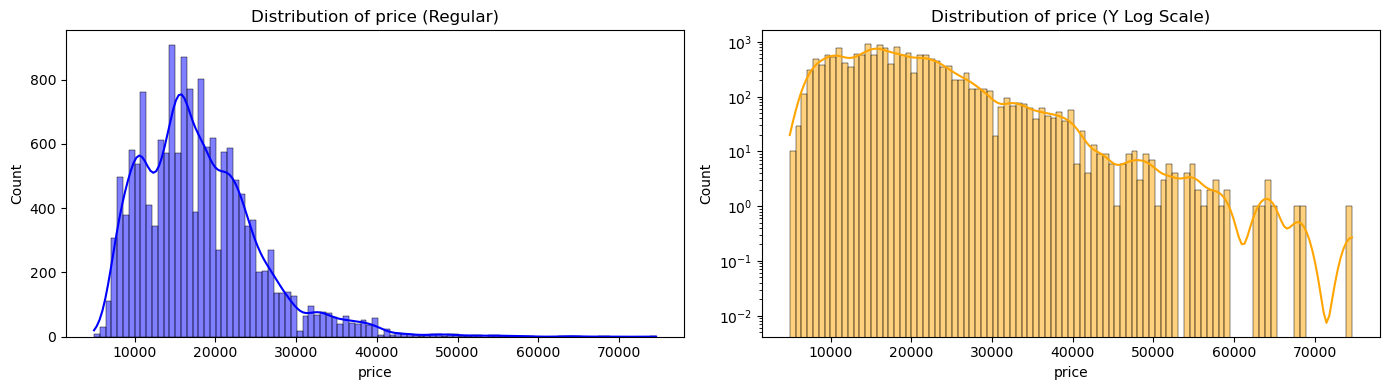

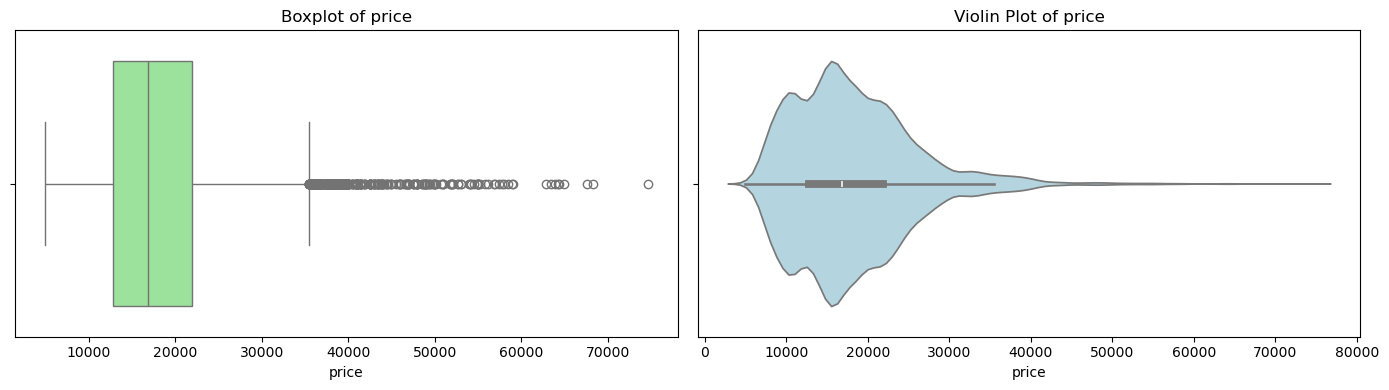

In [13]:
# Plot histograms for target feature
print(f"\nPre Outlier Treatment on {target_column}:")
plot_numerical_histograms(df_processed, target_column)
plot_numerical_boxplots_and_violins(df_processed, target_column)

**The target variable seems to be skewed. Perform suitable transformation on the target.**

In [14]:
# Transform the target variable using log transformation to reduce skewness
def transform_target_log(df, target_col):
    print(f"Applying log transformation to target column '{target_col}' to reduce skewness.")
    try:
        original_skewness = df[target_col].skew()
        print(f"Original skewness of '{target_col}': {original_skewness}")

        # Before applying log1p, check for negative values
        neg_count = (df_processed['price'] < 0).sum()
        zero_count = (df_processed['price'] == 0).sum()
        print(f"negatives: {neg_count}, zeros: {zero_count}")

        if neg_count > 0:
            print("There are negative prices — log1p cannot be used. Consider investigating or use Yeo-Johnson (PowerTransformer).")
        else:
            col_name = f"{target_col}_log"
            df[col_name] = np.log1p(df[target_col])  # log1p to handle zero values
            col_name_skew = df[col_name].skew()
            print(f"After log1p: skew={col_name_skew:.3f}")
            if abs(col_name_skew) < 0.5:
                print(f"Log transformation output : fairly symmetric (|skew| < 0.5)")
            elif abs(col_name_skew) < 1:
                print(f"Log transformation output : moderately skewed (0.5 <= |skew| < 1)")
            else:
                print(f"Log transformation output : highly skewed (|skew| >= 1)")
    except Exception as e:
        print(f"Error calculating skewness: {e}")

    return df

df_processed = transform_target_log(df_processed, 'price')

Applying log transformation to target column 'price' to reduce skewness.
Original skewness of 'price': 1.236169412899669
negatives: 0, zeros: 0
After log1p: skew=-0.031
Log transformation output : fairly symmetric (|skew| < 0.5)


| Skewness value          | Interpretation                                        | Visual shape   | Meaning for regression                                            |
| ----------------------- | ----------------------------------------------------- | -------------- | ----------------------------------------------------------------- |
| **0**                   | Perfectly symmetric                                   | Bell-shaped    | Ideal for linear regression (normal residuals).                   |
| **> 0** (positive skew) | Right tail longer (many small values, few large ones) | Right-heavy | Common for prices, incomes, sales — most are small, few are huge. |
| **< 0** (negative skew) | Left tail longer (many large values, few small ones)  | Left-heavy   | Rare in price data; usually means a floor effect.                 |


Rough guide:
- |skew| < 0.5 → fairly symmetric
- 0.5–1 → moderately skewed
- 1 → highly skewed (needs transformation)

In [15]:
# Check for valid outliers for Audi AX and Renault Espace
print(f"Mean price for Audi A3: {df_processed[(df_processed['make_model'] == 'Audi A3')]['price'].mean()}")
print(f"Mean price for Renault Espace: {df_processed[df_processed['make_model'] == 'Renault Espace']['price'].mean()}")

Mean price for Audi A3: 20996.693251533743
Mean price for Renault Espace: 30080.21190716448



Post Log Transformation Treatment on ['price_log']:


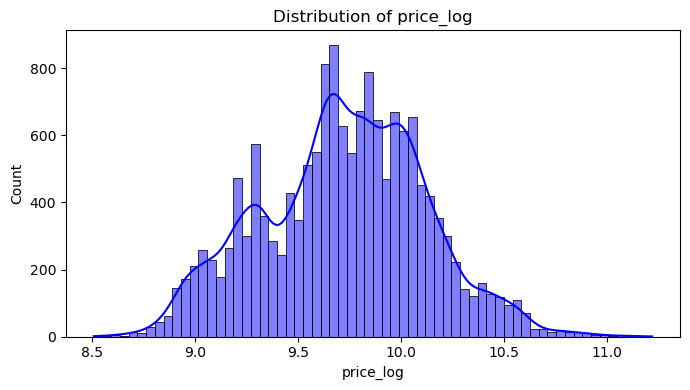

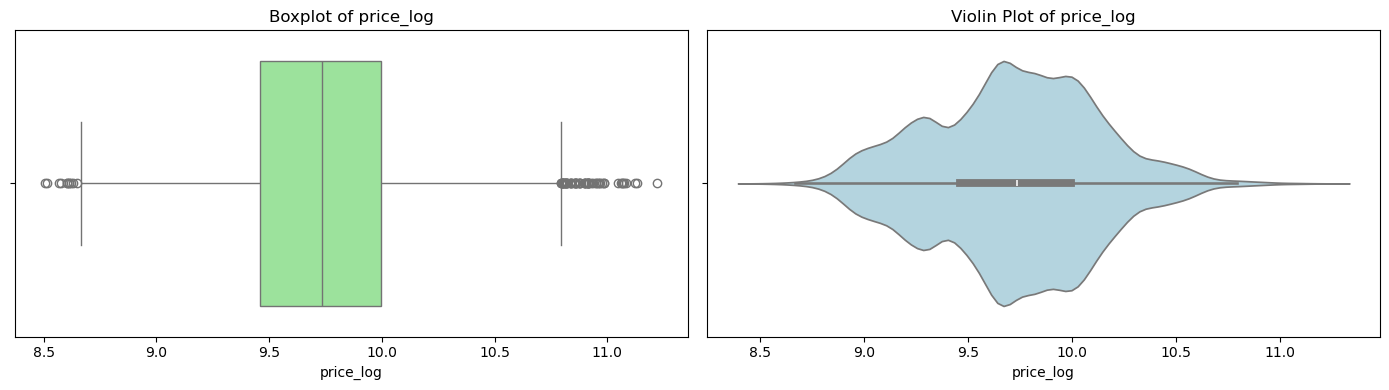

In [16]:
# Plot histograms for target feature
target_column_log = ['price_log']
print(f"\nPost Log Transformation Treatment on {target_column_log}:")
plot_numerical_histograms(df_processed, target_column_log, plot_ylog=False)
plot_numerical_boxplots_and_violins(df_processed, target_column_log)

### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

Use the transformed target (price_log) for correlation analysis
Why:
- We’re building your model on the transformed target, so all pre-model analyses (correlation, feature selection, etc.) should reflect relationships with that version of the target.
- **Log transformation linearizes nonlinear relationships.**
    - Many numerical predictors (like hp_kw, km, age) have multiplicative or exponential effects on price.
    - Taking log(price) converts those into roughly additive linear relationships — exactly what correlation (and linear regression) assume.
- **Pearson correlation assumes linearity and roughly normal variables.**
    - The original price was right-skewed (skew ≈ +1.24), violating this assumption.
    - price_log (skew ≈ 0) satisfies it much better, making correlations meaningful and less dominated by a few luxury-car outliers.
- **Mutual information for categorical features** is nonparametric and scale-invariant, so it’s fine either way — but to keep consistency, use the same target (price_log) everywhere.

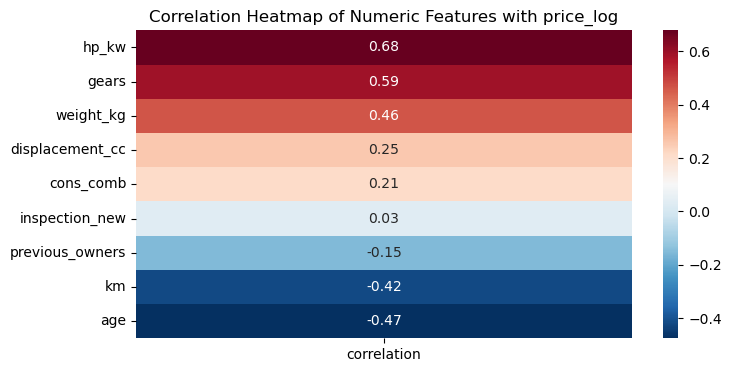

feature     type     score sign
0            hp_kw  numeric  0.678024    +
1            gears  numeric  0.588194    +
2              age  numeric  0.474618    -
3        weight_kg  numeric  0.464597    +
4               km  numeric  0.419189    -
5  displacement_cc  numeric  0.254854    +
6        cons_comb  numeric  0.211097    +
7  previous_owners  numeric  0.152029    -
8   inspection_new  numeric  0.030927    +

In [17]:
# Visualise correlation
# Numerical features correlation
def analyze_correlation(df, target_col, top_k=10):
    """
    Finds correlation/association between features and target.
    - Numeric features -> Pearson correlation

    Args:
        df (pd.DataFrame): Input dataframe
        target_col (str): Name of target column
        top_k (int): Number of top features to display

    Returns:
        pd.DataFrame: Combined feature importance ranking
    """
    # Separate features and target
    X = df.drop(columns=[target_col])
    ## if target_col ends with '_log' drop the original target column from X
    if target_col.endswith('_log'):
        original_target = target_col[:-4]
        if original_target in X.columns:
            X = X.drop(columns=[original_target])
    y = df[target_col]

    results = []

    # Numeric features correlation  
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if numeric_features:
        corr = X[numeric_features].corrwith(y).sort_values(ascending=False)
        for col, score in corr.items():
            results.append({
                "feature": col,
                "type": "numeric",
                "score": abs(score),
                "sign": "+" if score >= 0 else "-"
            })

    # Plot a heatmap for numeric features correlation
    if numeric_features:
        plt.figure(figsize=(8, 4))
        sns.heatmap(corr.to_frame(name='correlation'), annot=True, fmt=".2f", cmap='RdBu_r', cbar=True)
        plt.title(f"Correlation Heatmap of Numeric Features with {target_col}")
        plt.show()

    # Convert results to DataFrame
    combined = pd.DataFrame(results)
    combined = combined.sort_values(by="score", ascending=False).reset_index(drop=True)

    # Display top K features
    display(combined.head(top_k))
    return combined.head(top_k) 

# Example run
num_feature_importance = analyze_correlation(df_processed, target_column_log[0], top_k=20)

#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

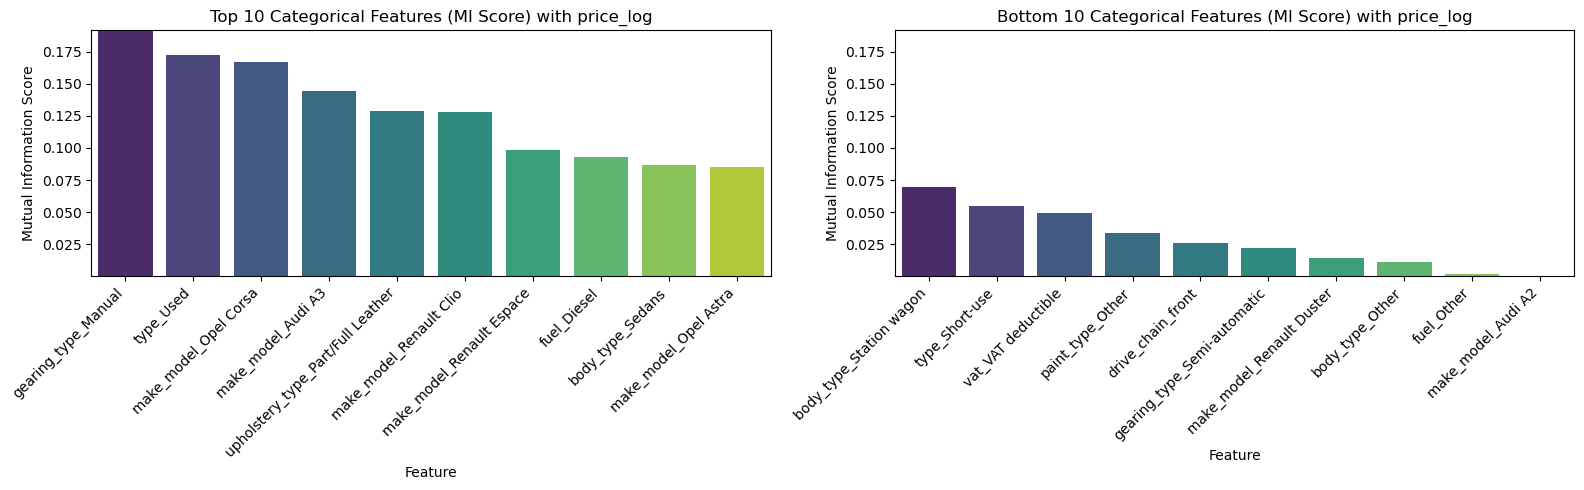

MI Score Ranking of Top 10 Categorical Features with price_log:


feature         type     score  sign
0                gearing_type_Manual  categorical  0.191521  None
1                          type_Used  categorical  0.172049  None
2              make_model_Opel Corsa  categorical  0.166655  None
3                 make_model_Audi A3  categorical  0.144532  None
4  upholstery_type_Part/Full Leather  categorical  0.128890  None
5            make_model_Renault Clio  categorical  0.127724  None
6          make_model_Renault Espace  categorical  0.098145  None
7                        fuel_Diesel  categorical  0.093154  None
8                   body_type_Sedans  categorical  0.086926  None
9              make_model_Opel Astra  categorical  0.085342  None

MI Score Ranking of Bottom 10 Categorical Features with price_log:


feature         type     score  sign
12      body_type_Station wagon  categorical  0.069255  None
13               type_Short-use  categorical  0.054666  None
14           vat_VAT deductible  categorical  0.049533  None
15             paint_type_Other  categorical  0.034203  None
16            drive_chain_front  categorical  0.025958  None
17  gearing_type_Semi-automatic  categorical  0.022270  None
18    make_model_Renault Duster  categorical  0.014348  None
19              body_type_Other  categorical  0.011160  None
20                   fuel_Other  categorical  0.002250  None
21           make_model_Audi A2  categorical  0.000181  None

In [18]:
# Visualise correlation
#from sklearn.feature_selection import mutual_info_regression

def analyze_correlation(df, target_col, top_k=10):
    """
    Finds correlation/association between features and target.
    - Categorical features -> Mutual Information (MI)

    Args:
        df (pd.DataFrame): Input dataframe
        target_col (str): Name of target column
        top_k (int): Number of top features to display

    Returns:
        pd.DataFrame: Combined feature importance ranking
    """
    # Separate features and target
    X = df.drop(columns=[target_col])
    ## if target_col ends with '_log' drop the original target column from X
    if target_col.endswith('_log'):
        original_target = target_col[:-4]
        if original_target in X.columns:
            X = X.drop(columns=[original_target])

    y = df[target_col]

    results = []

    #categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
    # Select Categorical features except the ones which have comma-separated multiple values 
    categorical_features = ['make_model', 'body_type', 'vat', 'type', 'fuel','paint_type', 'upholstery_type','gearing_type', 'drive_chain']
    if categorical_features:
        X_cat = pd.get_dummies(X[categorical_features], drop_first=True)
        mi_scores = mutual_info_regression(X_cat, y, random_state=42)
        for col, score in zip(X_cat.columns, mi_scores):
            results.append({
                "feature": col,
                "type": "categorical",
                "score": score,
                "sign": None  # MI has no sign
            })

    # Convert results to DataFrame
    combined = pd.DataFrame(results)
    combined = combined.sort_values(by="score", ascending=False).reset_index(drop=True)

    # Plot a bar plot for categorical features MI scores
    if categorical_features:
        fig, axes = plt.subplots(1, 2, figsize=(max(16, top_k), 5))
        sns.barplot(x='feature', y='score', data=combined.head(top_k), palette='viridis', ax=axes[0])
        axes[0].set_title(f"Top {top_k} Categorical Features (MI Score) with {target_col}")
        axes[0].set_xlabel("Feature")
        axes[0].set_ylabel("Mutual Information Score")
        plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

        sns.barplot(x='feature', y='score', data=combined.tail(top_k), palette='viridis', ax=axes[1])
        axes[1].set_title(f"Bottom {top_k} Categorical Features (MI Score) with {target_col}")
        axes[1].set_xlabel("Feature")
        axes[1].set_ylabel("Mutual Information Score")
        plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

        min_score = combined['score'].min()
        max_score = combined['score'].max()
        axes[0].set_ylim(min_score, max_score)
        axes[1].set_ylim(min_score, max_score)

        plt.tight_layout()
        plt.show()

    # Display top K features
    print (f"MI Score Ranking of Top {top_k} Categorical Features with {target_col}:")
    display(combined.head(top_k))

    # Display bottom K features
    print (f"MI Score Ranking of Bottom {top_k} Categorical Features with {target_col}:")
    display(combined.tail(top_k))
    return combined.head(top_k+10)

# Example run
cat_feature_importance = analyze_correlation(df_processed, target_column_log[0], top_k=10)


In [19]:
# Assume num_feature_importance and cat_feature_importance are DataFrames from your previous analysis
# Both should have columns: 'feature', 'type', 'score', (and optionally 'sign')

# Concatenate the two DataFrames
combined_feature_importance = pd.concat([num_feature_importance, cat_feature_importance], ignore_index=True)

# Sort by absolute score (descending)
combined_feature_importance = combined_feature_importance.sort_values(by="score", ascending=False).reset_index(drop=True)

# Display the top features
print(f"Combined Numerical and Categorical Feature Importance Ranking (Top 20):")
display(combined_feature_importance.head(20))

Combined Numerical and Categorical Feature Importance Ranking (Top 20):


feature         type     score  sign
0                               hp_kw      numeric  0.678024     +
1                               gears      numeric  0.588194     +
2                                 age      numeric  0.474618     -
3                           weight_kg      numeric  0.464597     +
4                                  km      numeric  0.419189     -
5                     displacement_cc      numeric  0.254854     +
6                           cons_comb      numeric  0.211097     +
7                 gearing_type_Manual  categorical  0.191521  None
8                           type_Used  categorical  0.172049  None
9               make_model_Opel Corsa  categorical  0.166655  None
10                    previous_owners      numeric  0.152029     -
11                 make_model_Audi A3  categorical  0.144532  None
12  upholstery_type_Part/Full Leather  categorical  0.128890  None
13            make_model_Renault Clio  categorical  0.127724  None
14          make_model_Renault Espace  categorical  0.098145  None
15                        fuel_Diesel  categorical  0.093154  None
16                   body_type_Sedans  categorical  0.086926  None
17              make_model_Opel Astra  categorical  0.085342  None
18                      body_type_Van  categorical  0.083550  None
19           make_model_Opel Insignia  categorical  0.077306  None

### Feature Importance Summary

- The table below combines the top numerical and categorical features most strongly associated with the target variable.
- **Numerical features** are ranked by absolute Pearson correlation with the target.
- **Categorical features** are ranked by mutual information (MI) with the target.
- This combined ranking helps prioritize which features to focus on for modeling and interpretation.

**Inferences:**

| Rank | Feature                               | Type        | Score | Sign   | Inference                                                           |
| ---- | ------------------------------------- | ----------- | ----- | ------ | ------------------------------------------------------------------- |
| 1    | **hp_kw**                             | Numeric     | 0.678 | +      | Strongest driver of price. Higher engine power → higher car value.  |
| 2    | **gears**                             | Numeric     | 0.588 | +      | More gears (modern transmissions) → higher vehicle pricing.         |
| 3    | **age**                               | Numeric     | 0.475 | –      | Older cars lose value; strong negative correlation with price.      |
| 4    | **weight_kg**                         | Numeric     | 0.465 | +      | Heavier cars (SUVs/luxury) tend to cost more.                       |
| 5    | **km**                                | Numeric     | 0.419 | –      | Higher mileage reduces resale price, though less sharply than age.  |
| 6    | **displacement_cc**                   | Numeric     | 0.255 | +      | Larger engine capacity moderately increases price.                  |
| 7    | **cons_comb**                         | Numeric     | 0.211 | +      | Higher fuel consumption often linked to powerful or premium models. |
| 8    | **gearing_type_Manual**               | Categorical | 0.192 | –/None | Manual transmissions generally associated with lower-priced cars.   |
| 9    | **type_Used**                         | Categorical | 0.172 | –/None | Used vehicles naturally have lower prices than new ones.            |
| 10   | **make_model_Opel Corsa**             | Categorical | 0.167 | –/None | Budget-friendly model pulling average price down.                   |
| 11   | **previous_owners**                   | Numeric     | 0.152 | –      | More previous owners → lower resale value (buyer caution).          |
| 12   | **make_model_Audi A3**                | Categorical | 0.145 | +      | Premium compact car model → pushes price upward.                    |
| 13   | **upholstery_type_Part/Full Leather** | Categorical | 0.129 | +      | Leather interiors signal premium trim → price uplift.               |
| 14   | **make_model_Renault Clio**           | Categorical | 0.128 | –/None | Mass-market model → tends to reduce price.                          |
| 15   | **make_model_Renault Espace**         | Categorical | 0.098 | –/None | Family van category → typically lower-priced.                       |
| 16   | **fuel_Diesel**                       | Categorical | 0.093 | ±      | Diesel pricing mixed; once premium, now declining slightly.         |
| 17   | **body_type_Sedans**                  | Categorical | 0.087 | ±      | Sedans moderately priced; varies with market preference.            |
| 18   | **make_model_Opel Astra**             | Categorical | 0.085 | –/None | Mid-segment Opel model → below-premium price range.                 |
| 19   | **body_type_Van**                     | Categorical | 0.084 | –      | Vans have lower resale vs SUVs/sedans.                              |
| 20   | **make_model_Opel Insignia**          | Categorical | 0.077 | –/None | Higher than Astra but below luxury German counterparts.             |


<Figure size 3000x3000 with 0 Axes>

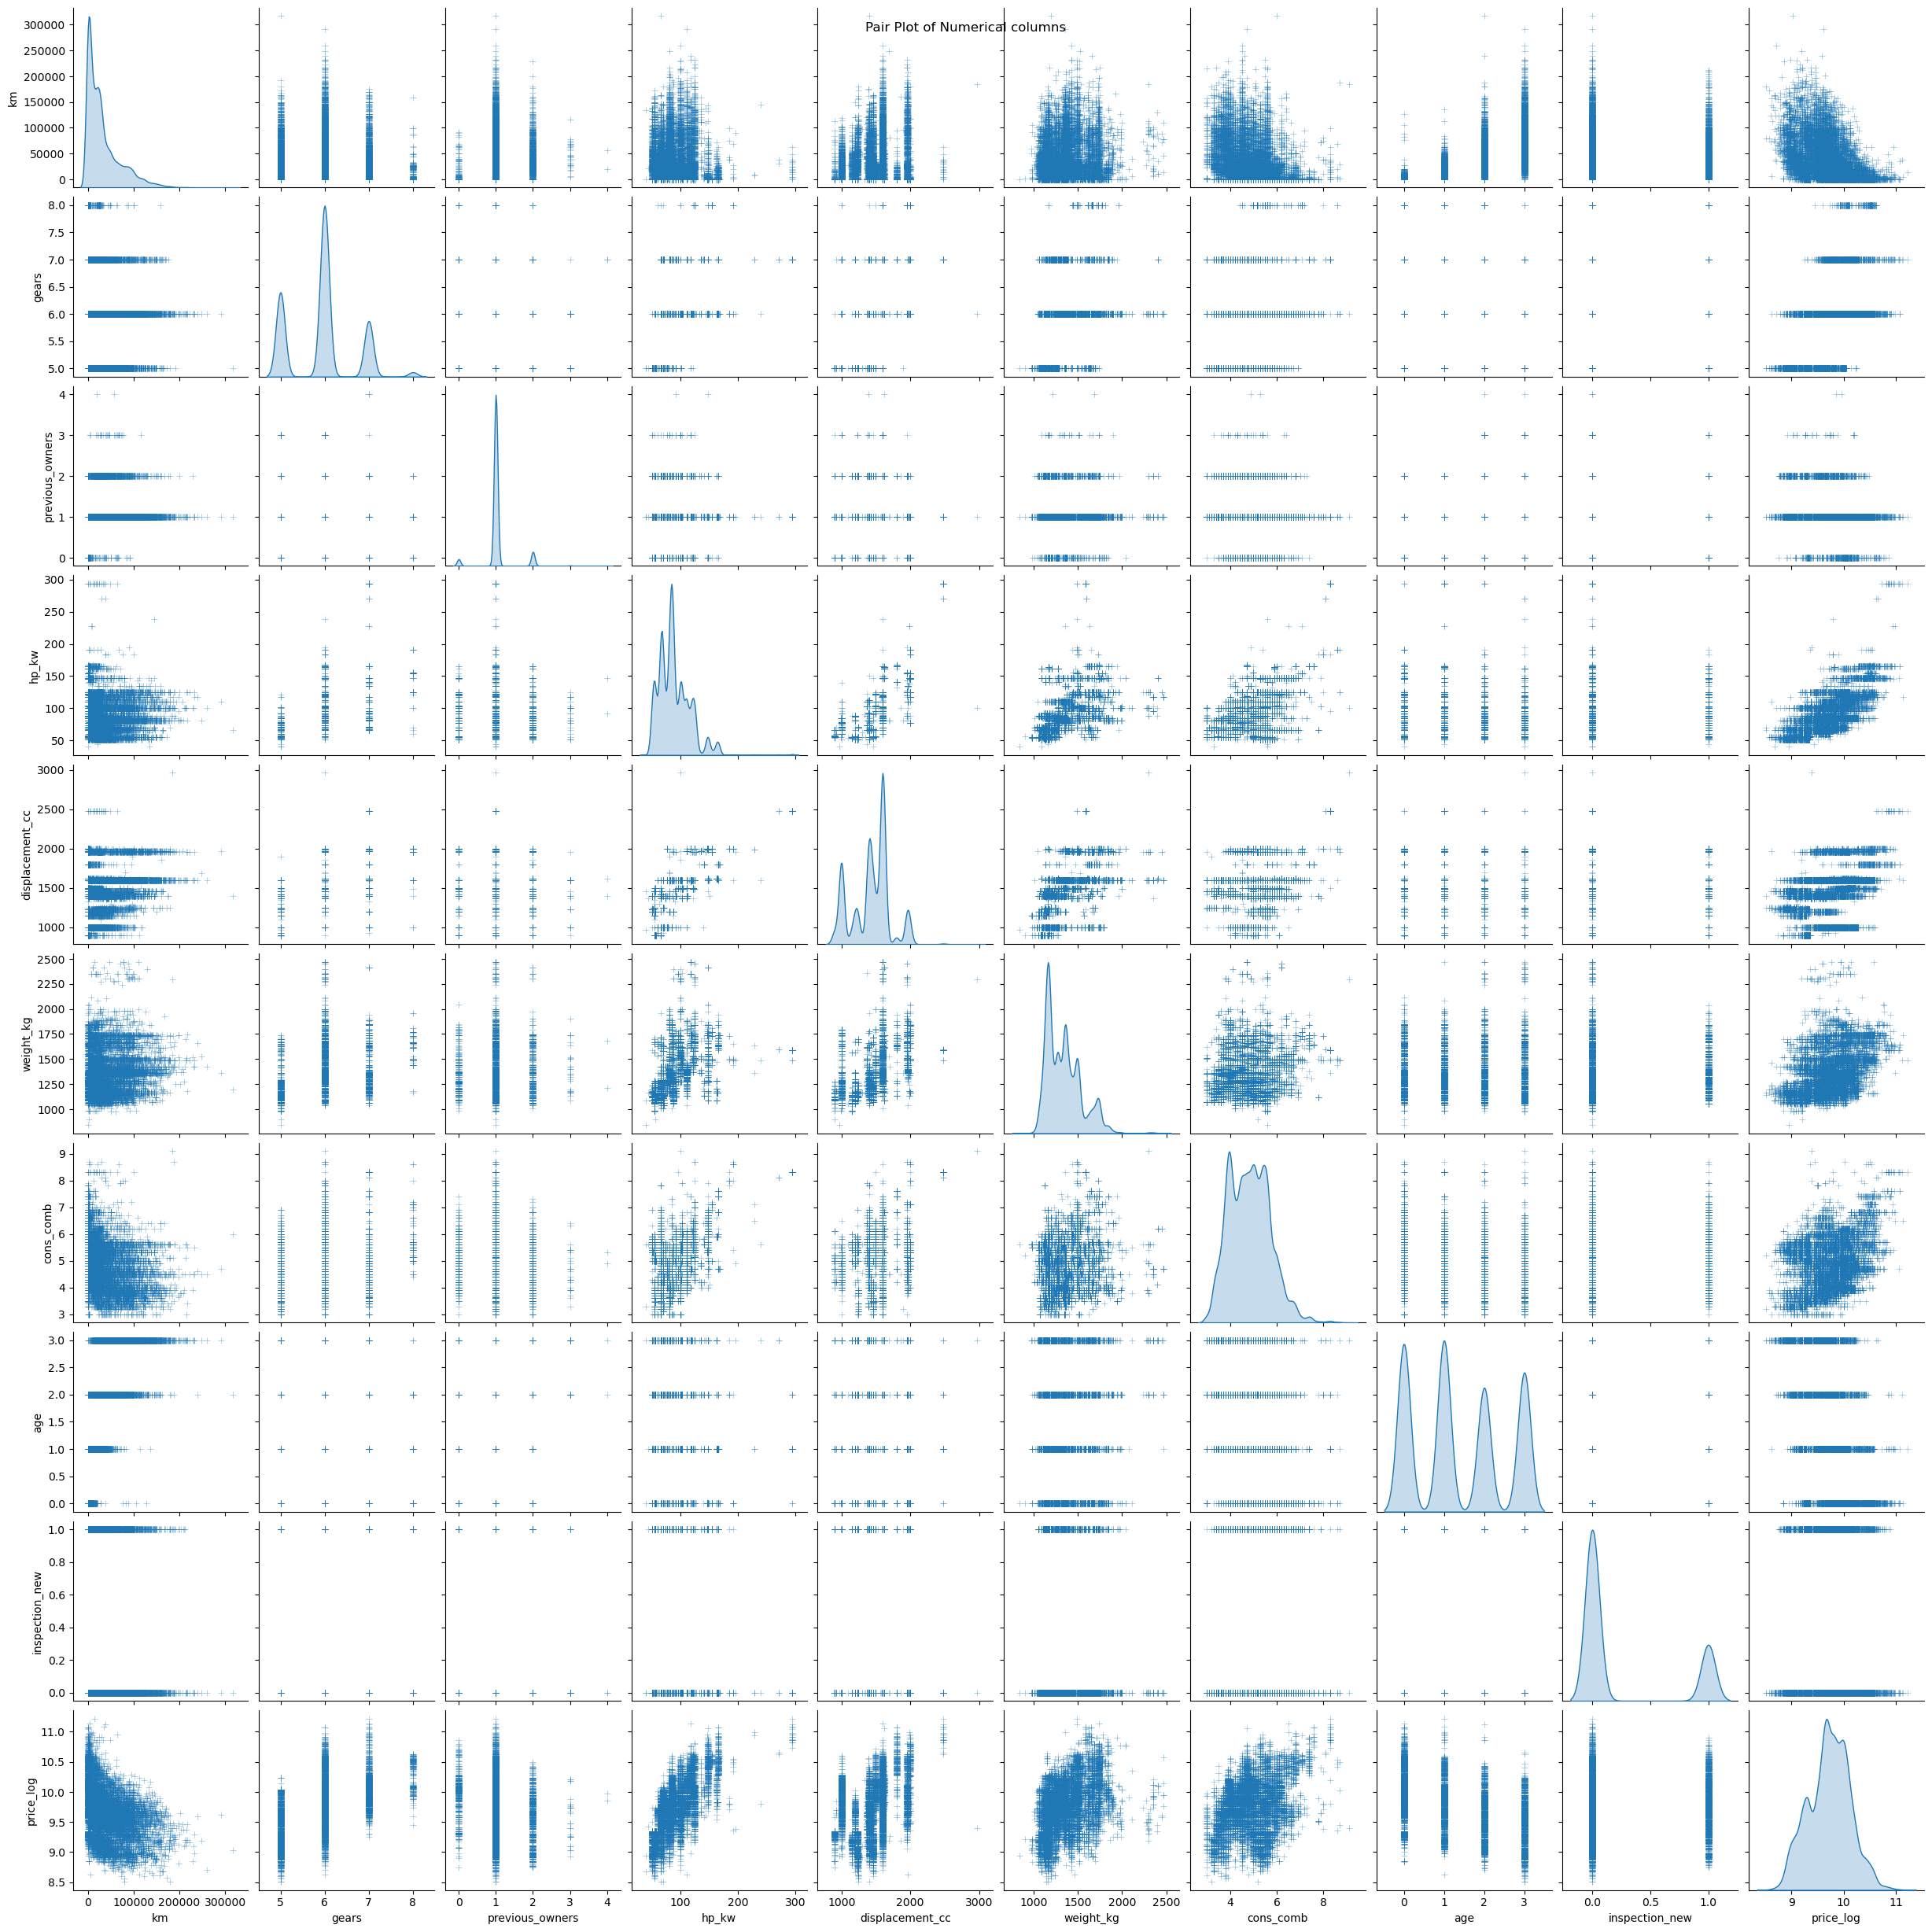

In [20]:
# Pair plot of all variables
plt.figure(figsize=(30, 30))
sns.pairplot(df_processed[num_columns + target_column_log], diag_kind='kde', markers='+', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical columns")
plt.show()

### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.


Pre Outlier Treatment on ['km', 'hp_kw', 'displacement_cc', 'weight_kg', 'cons_comb']:


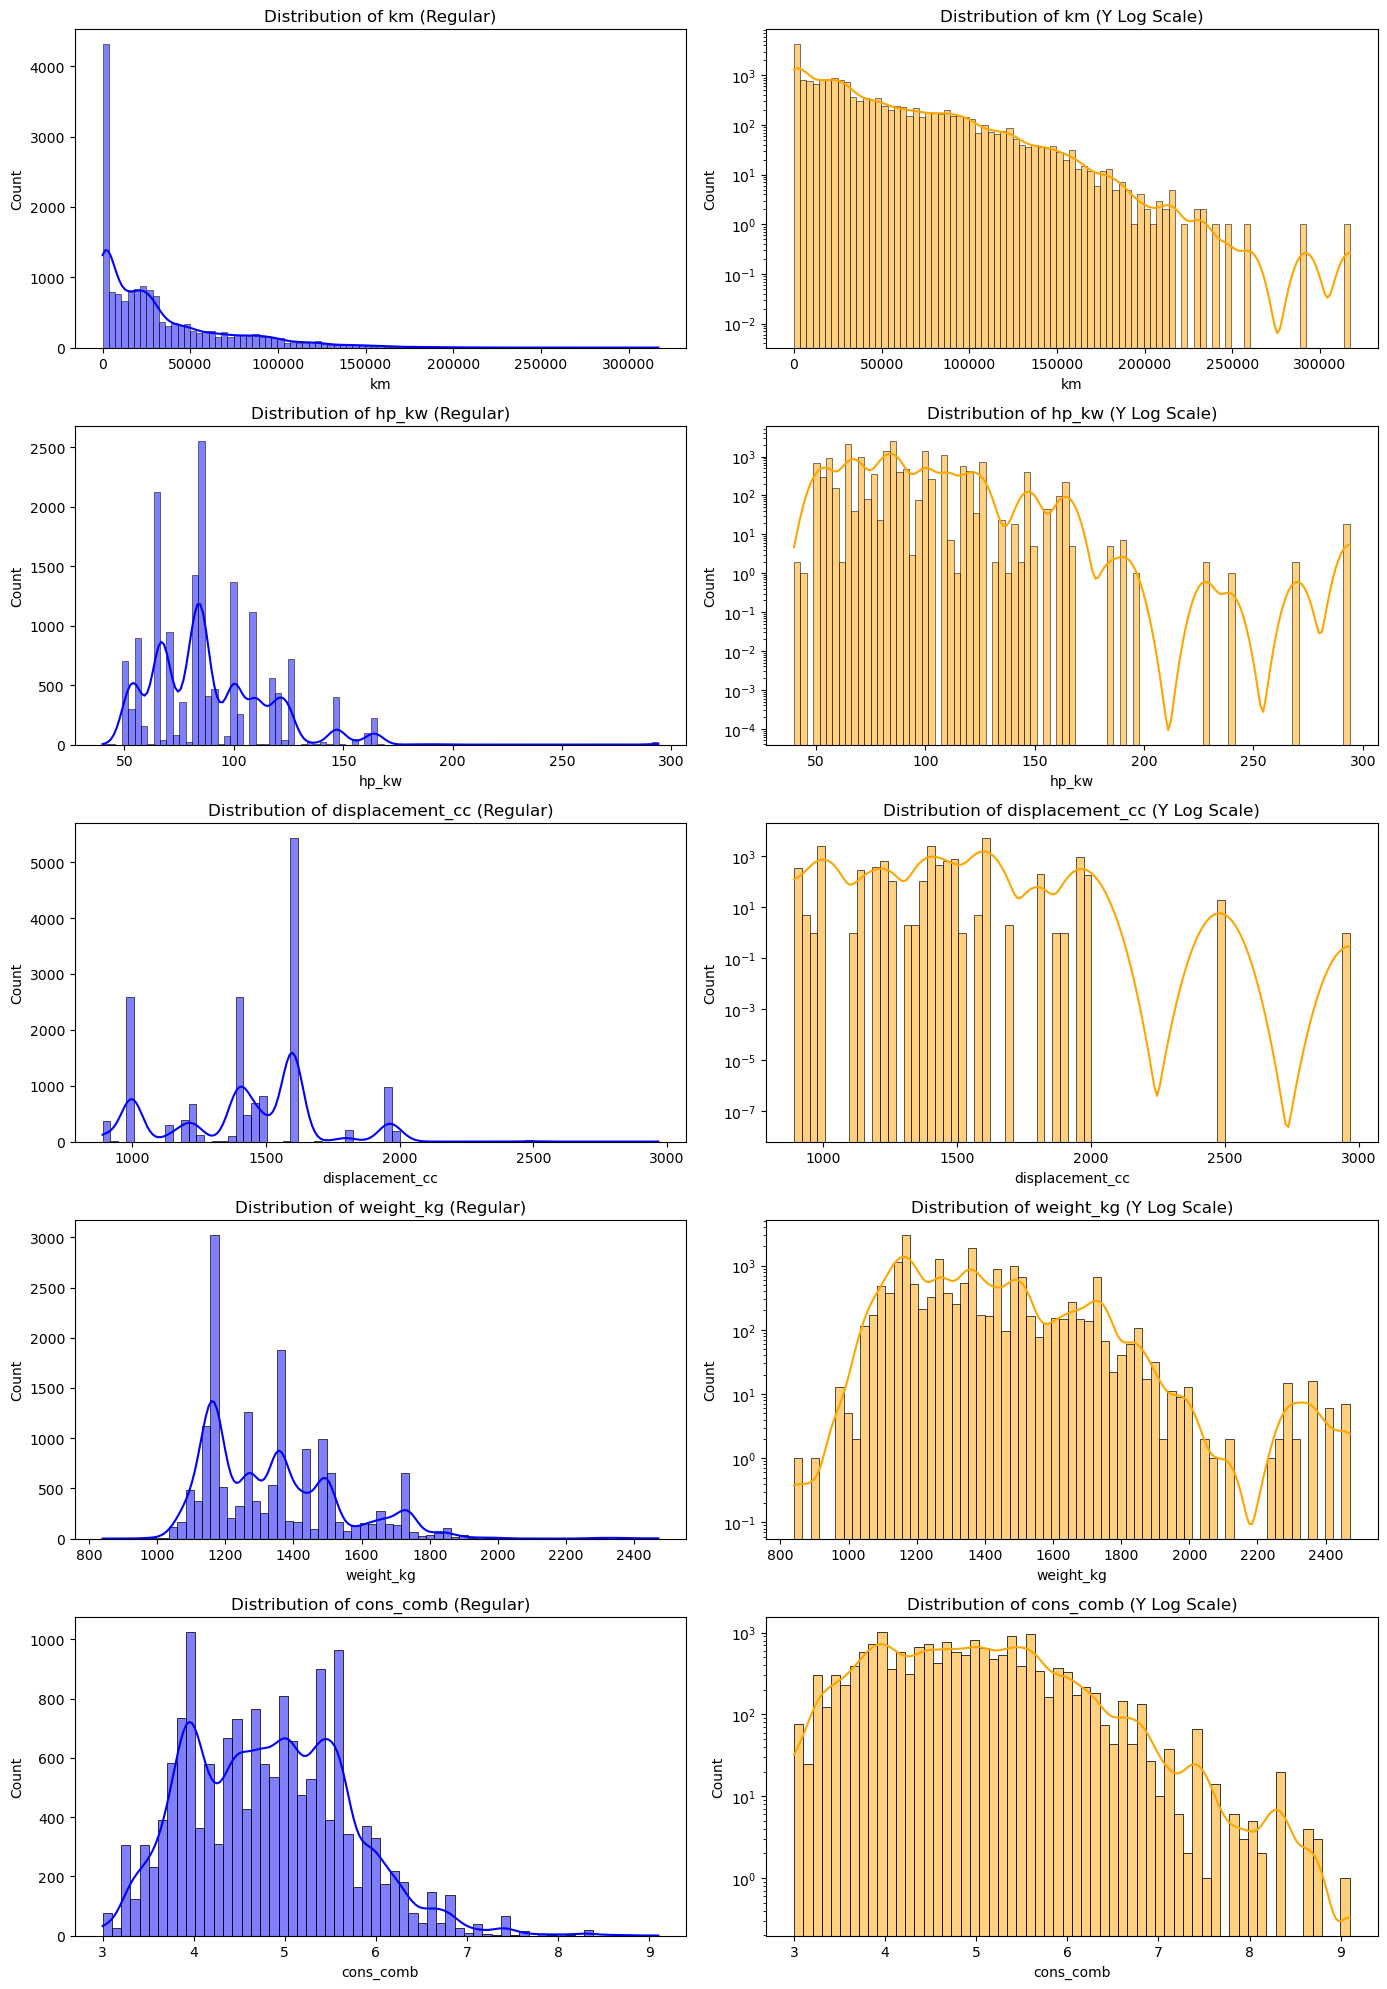

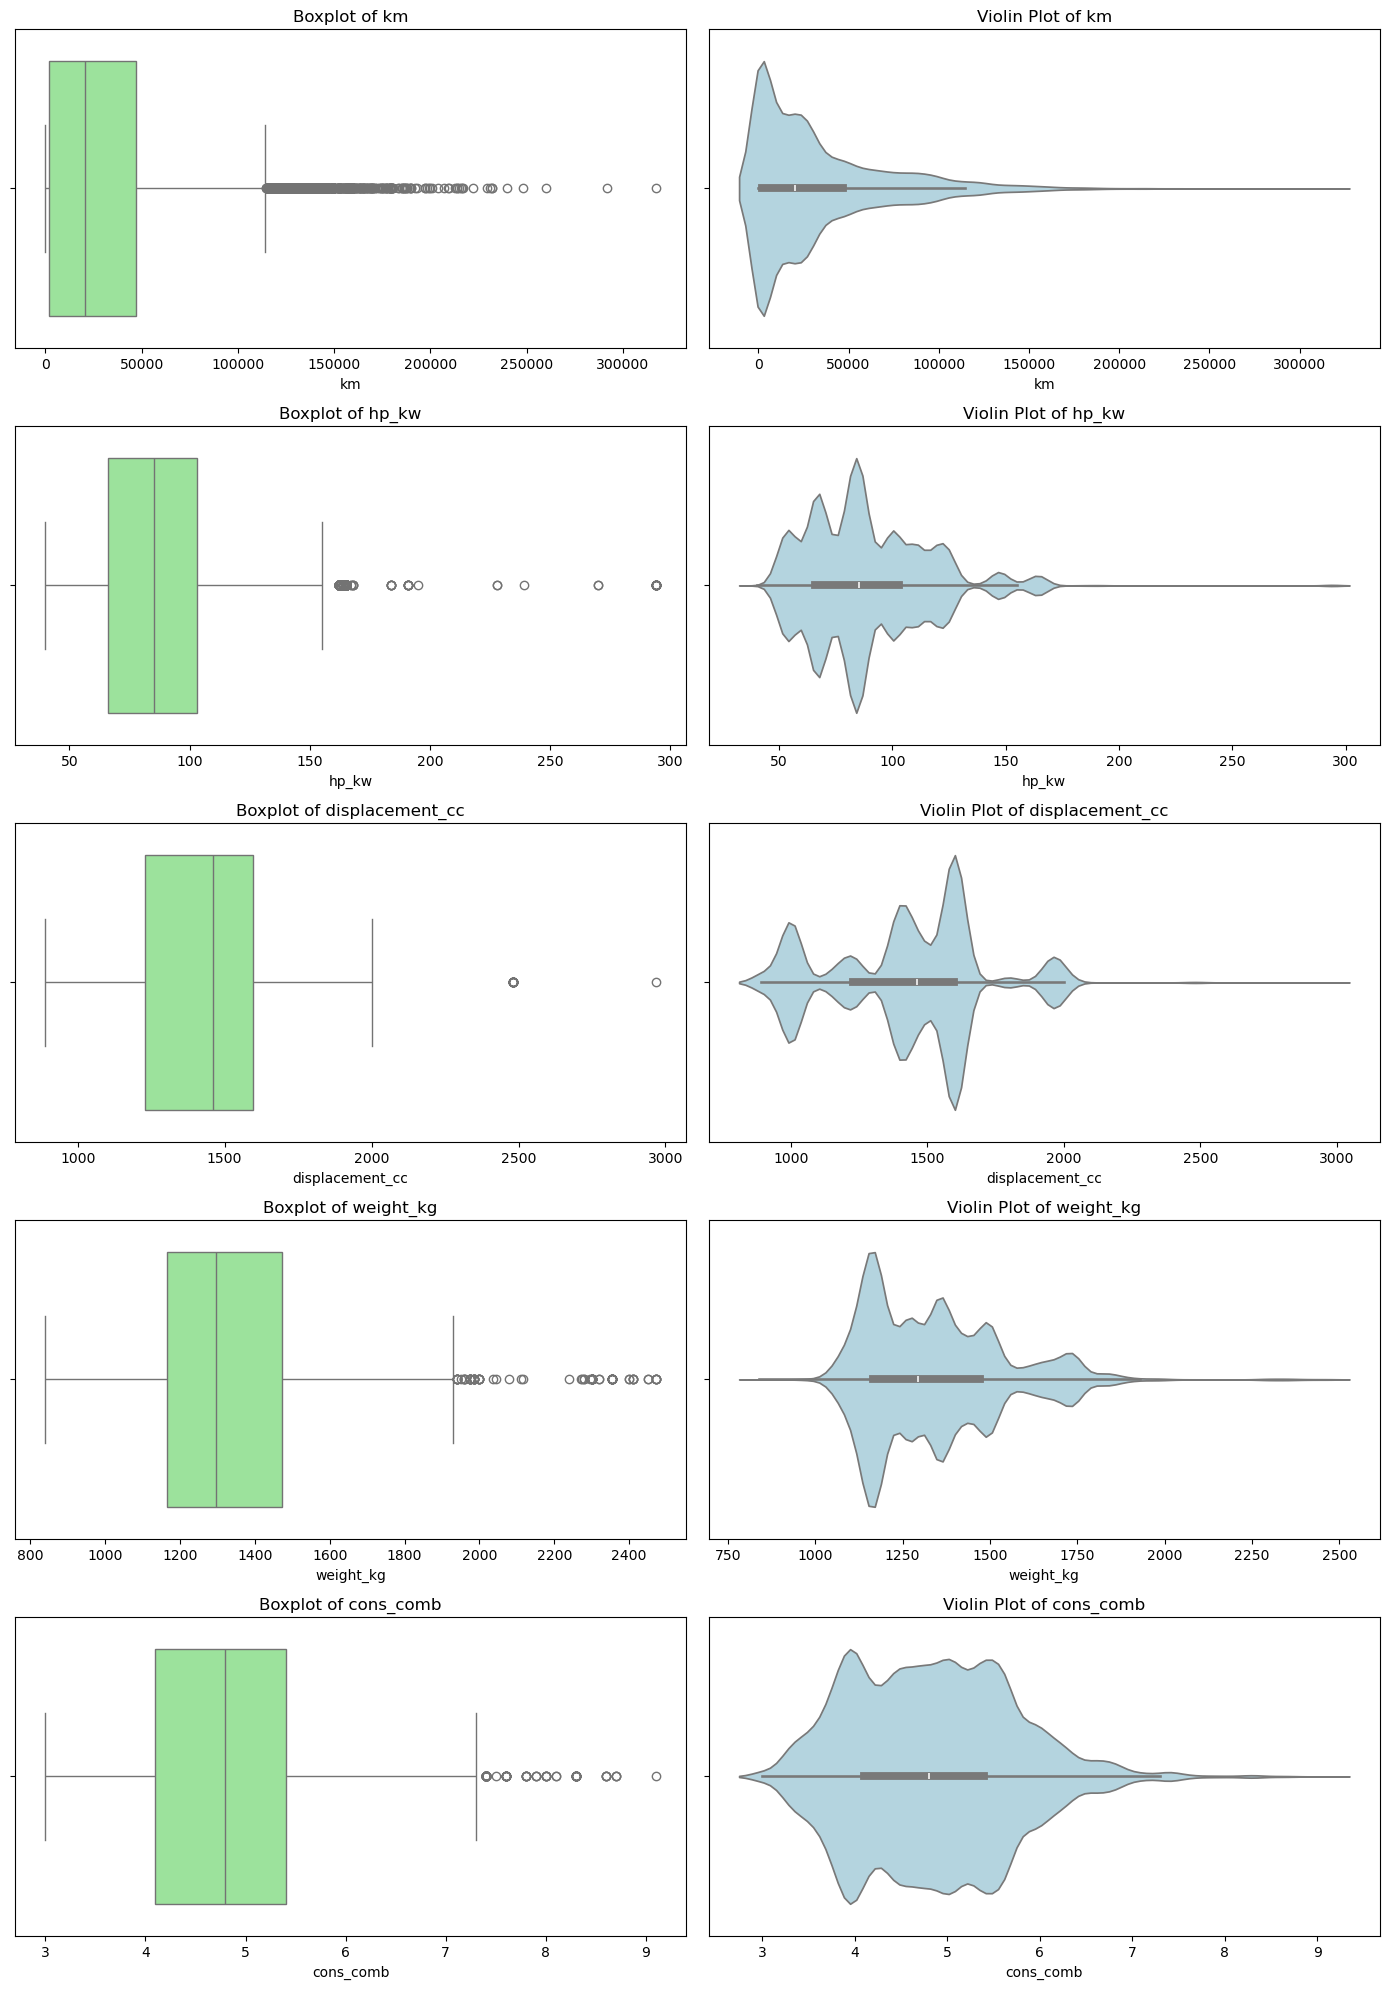

In [21]:
# Outliers present in each column

short_num_cols = ['km','hp_kw','displacement_cc','weight_kg','cons_comb']
print(f"\nPre Outlier Treatment on {short_num_cols}:")
plot_numerical_histograms(df_processed, short_num_cols)
plot_numerical_boxplots_and_violins(df_processed, short_num_cols)


#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

In [22]:
# Outlier treatment using Z-score method

def outlier_treatment_z_score(df, col, threshold=3):
    df_copy = df.copy()

    # Calculate Z-scores
    df_copy['z_score'] = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    outliers = df_copy[df_copy['z_score'].abs() > threshold]
    print("-" * 75)
    print(f"Original record count: {df.shape[0]}")
    print(f"Number of outliers in '{col}' using Z-score method with threshold {threshold}: {outliers.shape[0]} ({(outliers.shape[0]/df.shape[0])*100:.2f}%)")

    # Optionally, remove outliers
    #display(df_copy[df_copy['z_score'].abs() > threshold])
    df_cleaned = df_copy[df_copy['z_score'].abs() <= threshold]
    print(f"Data shape after removing outliers: {df_cleaned.shape}")
    df_cleaned.drop(columns=['z_score'], inplace=True)
    print(f"Records removed: {df.shape[0] - df_cleaned.shape[0]}")
    return df_cleaned



---------------------------------------------------------------------------
Original record count: 15915
Number of outliers in 'km' using Z-score method with threshold 3: 262 (1.65%)
Data shape after removing outliers: (15653, 25)
Records removed: 262
---------------------------------------------------------------------------
Original record count: 15653
Number of outliers in 'hp_kw' using Z-score method with threshold 3: 35 (0.22%)
Data shape after removing outliers: (15618, 25)
Records removed: 35
---------------------------------------------------------------------------
Original record count: 15618
Number of outliers in 'displacement_cc' using Z-score method with threshold 3: 0 (0.00%)
Data shape after removing outliers: (15618, 25)
Records removed: 0
---------------------------------------------------------------------------
Original record count: 15618
Number of outliers in 'weight_kg' using Z-score method with threshold 3: 86 (0.55%)
Data shape after removing outliers: (15532, 2

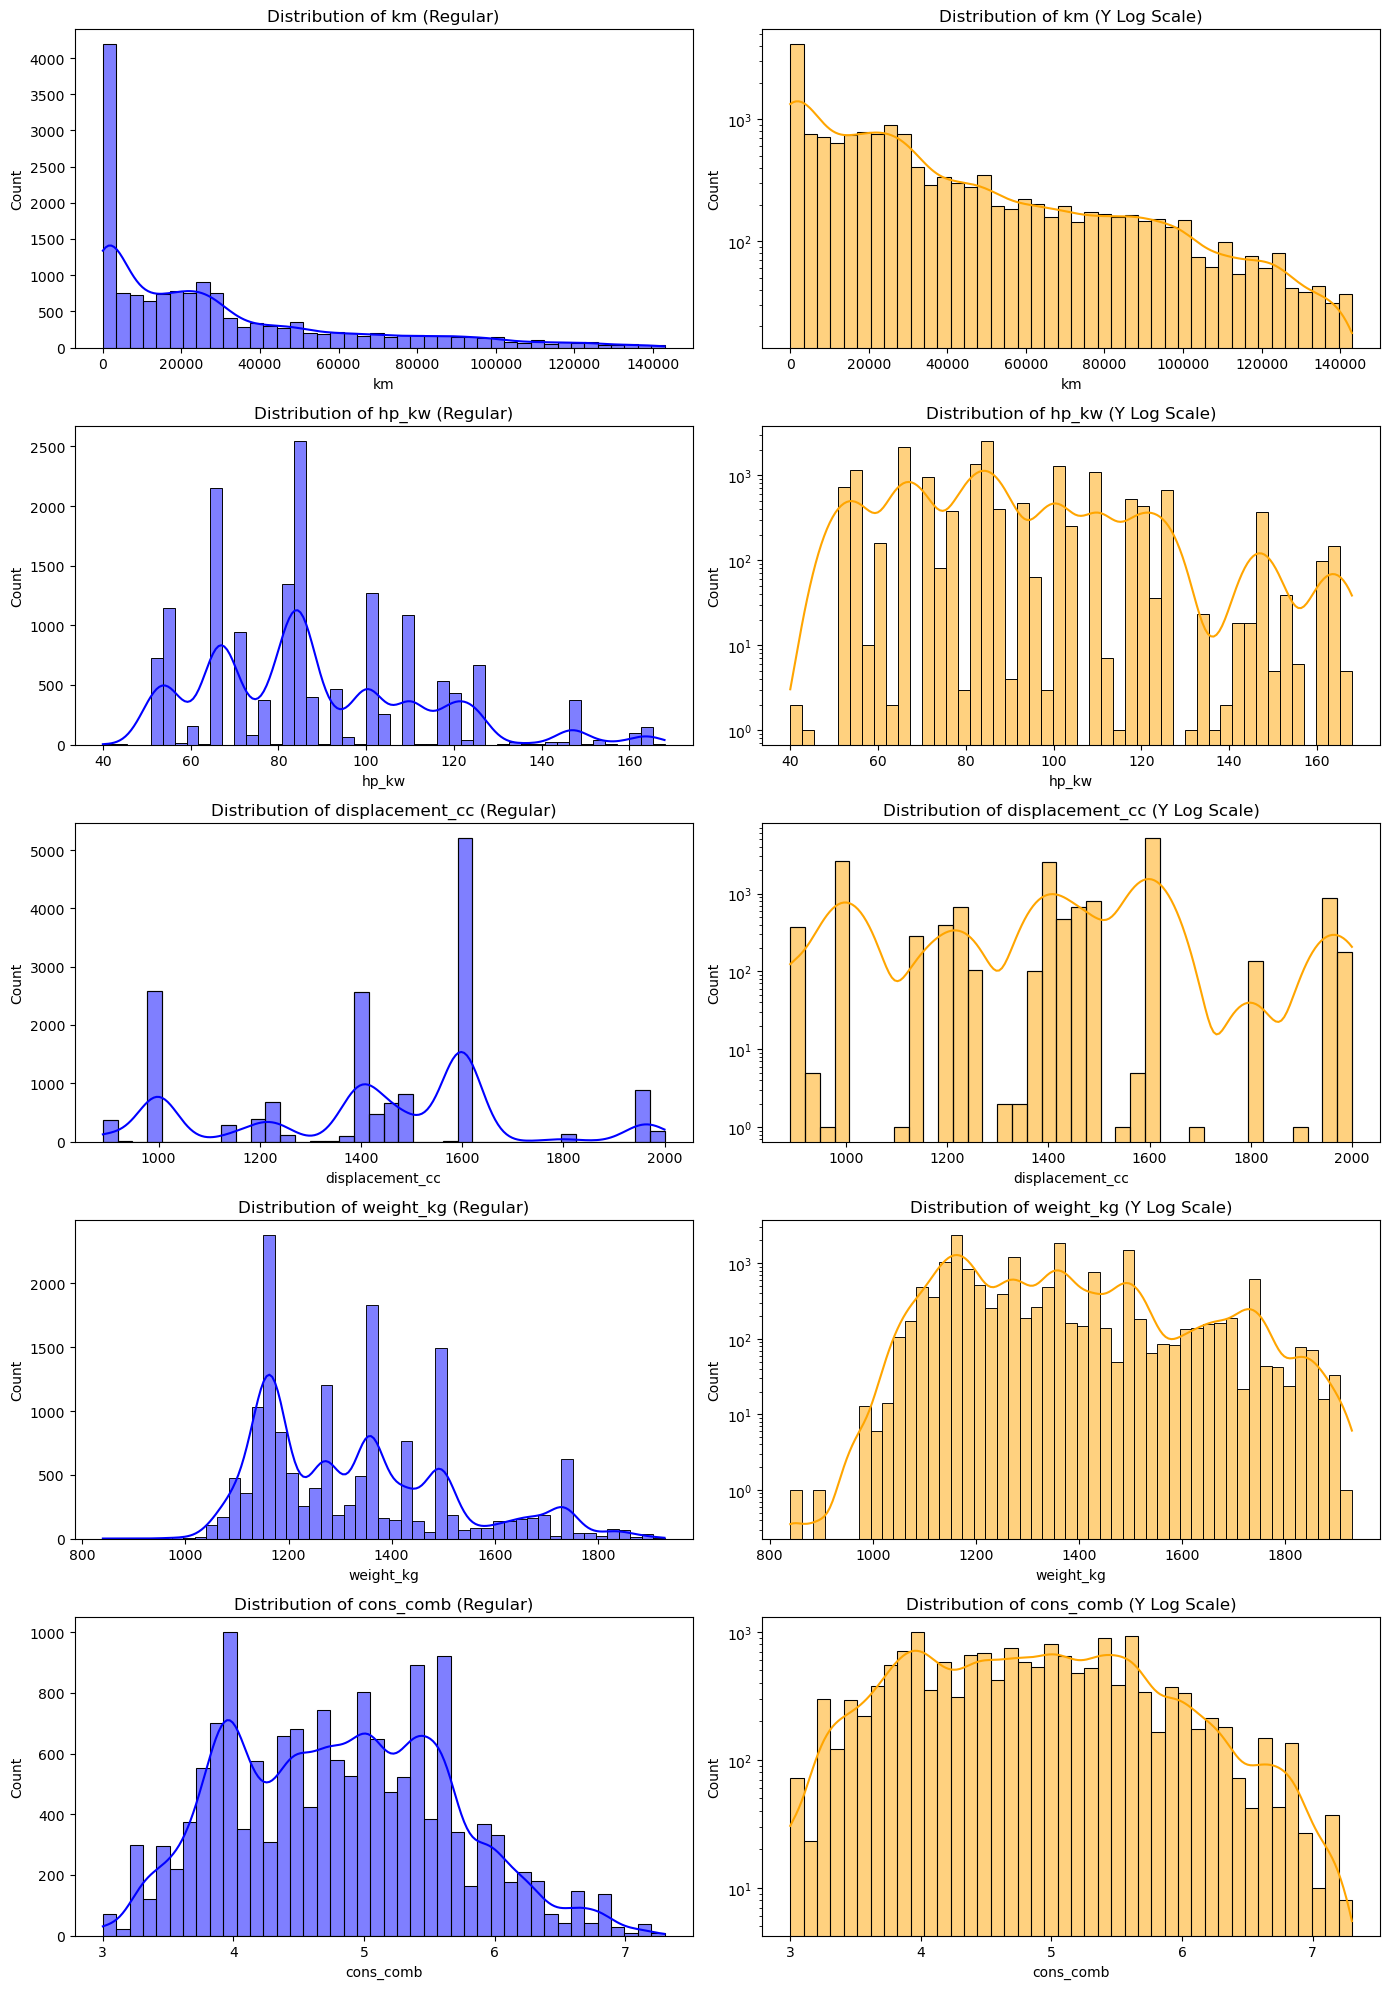

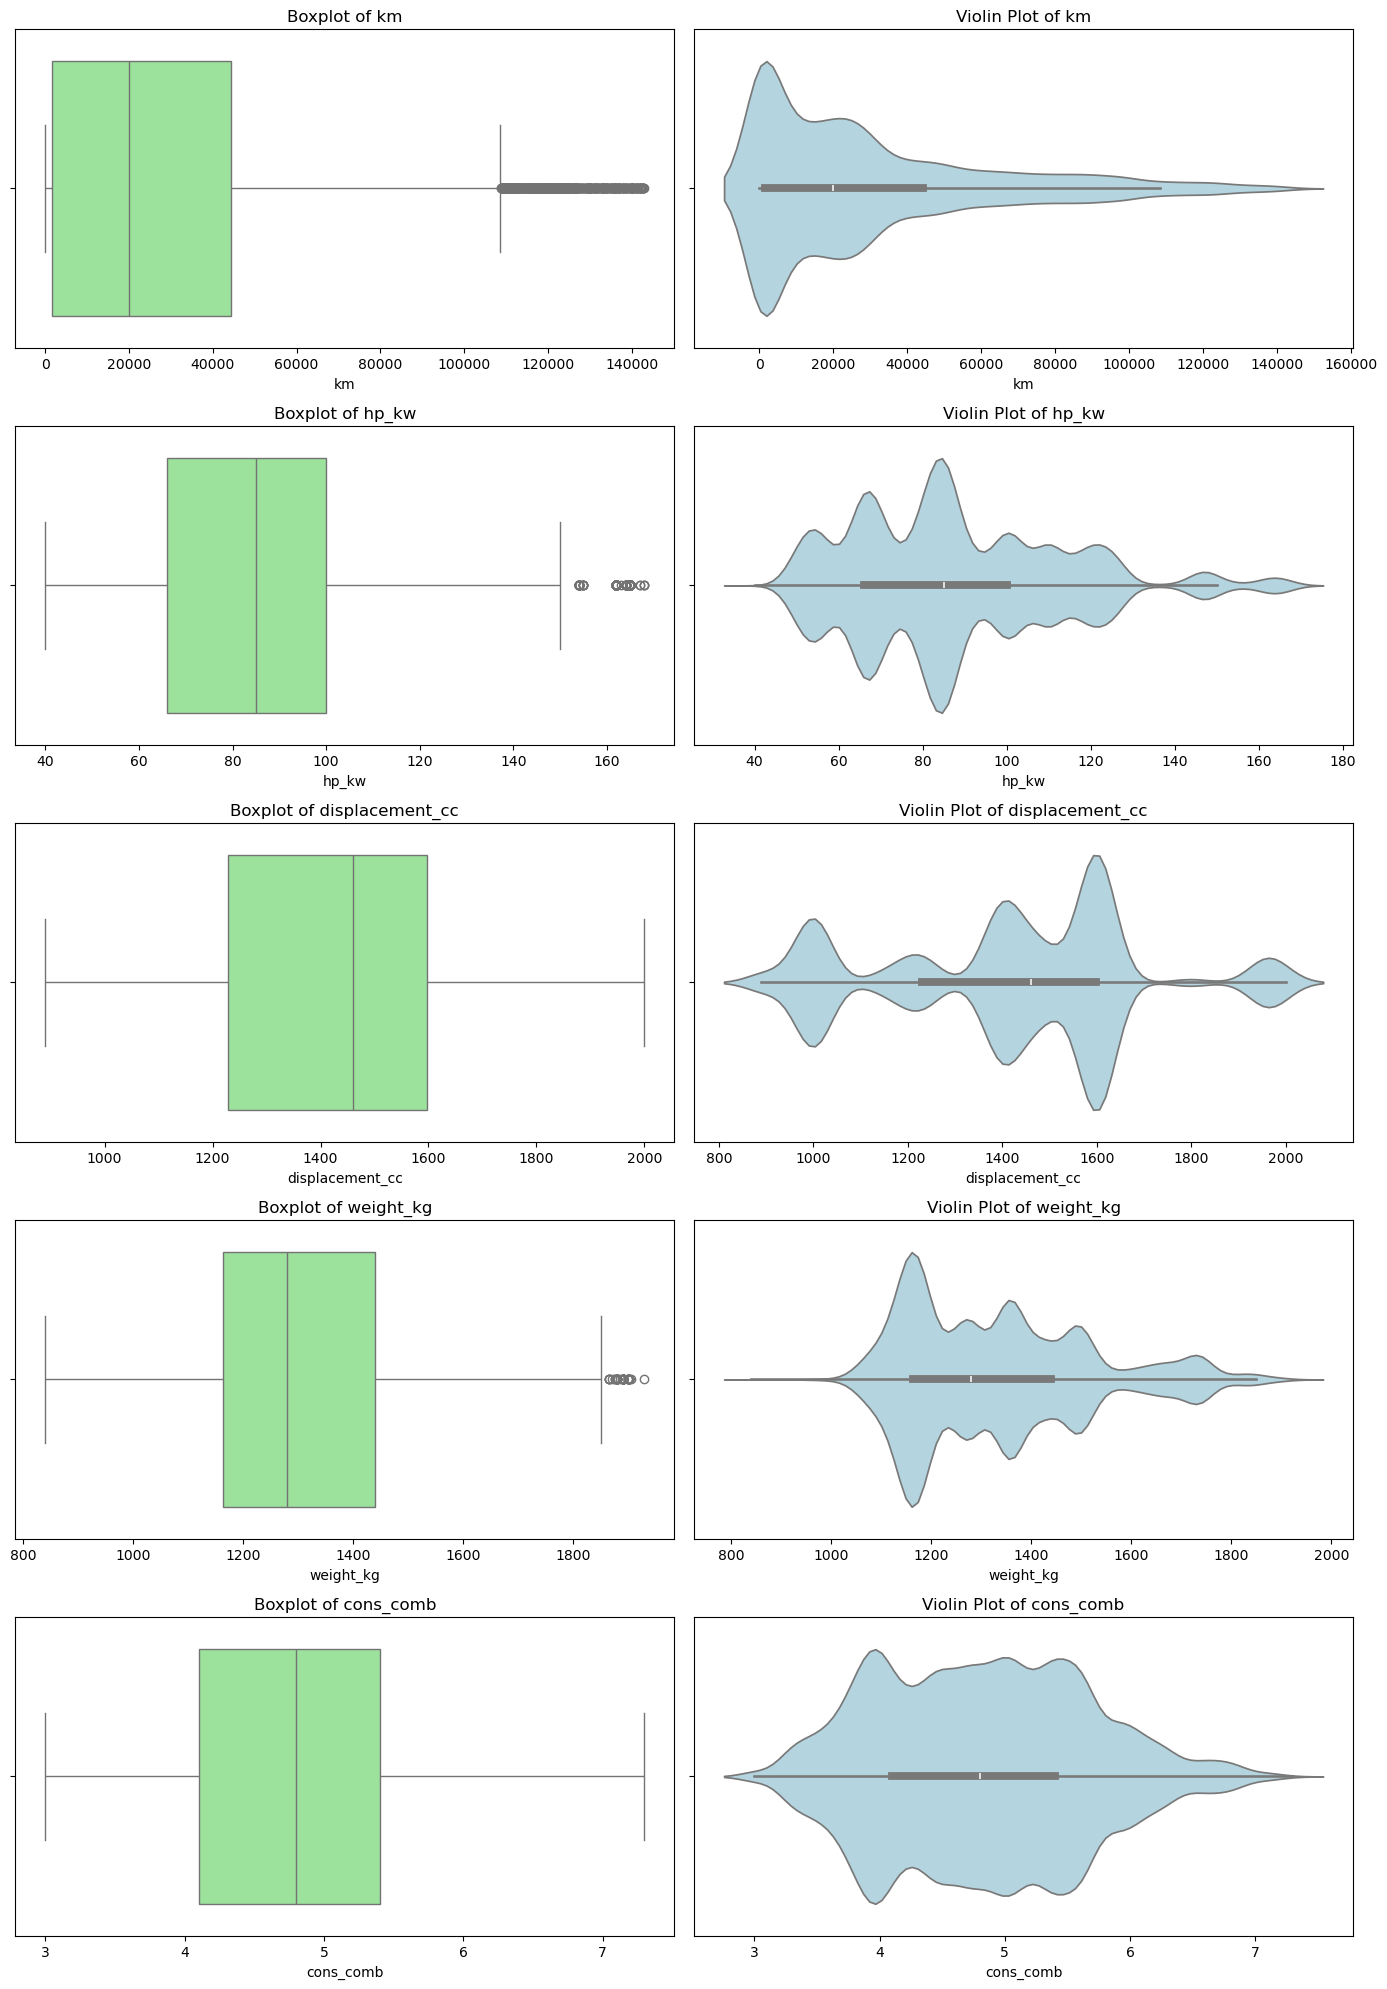

In [23]:
# Handle outliers
df_out = outlier_treatment_z_score(df_processed, 'km', threshold=3)
df_out = outlier_treatment_z_score(df_out, 'hp_kw', threshold=3)
df_out = outlier_treatment_z_score(df_out, 'displacement_cc', threshold=3)
df_out = outlier_treatment_z_score(df_out, 'weight_kg', threshold=3)
df_out = outlier_treatment_z_score(df_out, 'cons_comb', threshold=3)

plot_numerical_histograms(df_out, short_num_cols)
plot_numerical_boxplots_and_violins(df_out, short_num_cols)

In [24]:
def data_quality_checks(df):
    # print the records where age is zero
    print(f"-"*75)
    print(f"\nData Quality Checks Driven Cleanup - age")
    print(f"- There are {len(df[df['age'] == 0])} cars with zero age which is valid for new cars.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['km'] > 1000)])} cars with zero age and high km.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['type'].str.lower() != 'new')])} cars with zero age and type <> new.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['km'] > 1000) & (df['type'].str.lower() != 'new')])} cars with zero age, high km and type <> new.")
    print(f"- These records are likely data quality issues and will be removed.")
    df = df[~((df['age'] == 0) & (df['type'].str.lower() != 'new'))]
    df = df[~((df['age'] == 0) & (df['km'] > 1000))]

    print(f"\nData Quality Counts Post Cleanup - age")
    print(f"- There are {len(df[df['age'] == 0])} cars with zero age which is valid for new cars.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['km'] > 1000)])} cars with zero age and high km.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['type'].str.lower() != 'new')])} cars with zero age and type <> new.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['km'] > 1000) & (df['type'].str.lower() != 'new')])} cars with zero age, high km and type <> new.")
    print(f"- These records are likely data quality issues and will be removed.")

    # print the records where age is zero
    print(f"-"*75)
    print(f"\nData Quality Checks Driven Cleanup - km")
    print(f"- There are {len(df[df['km'] == 0])} cars with zero km which is valid for new cars.")
    print(f"- There are {len(df[(df['km'] == 0) & (df['type'].str.lower() != 'new')])} cars with zero km and type <> new.")
    print(f"- There are {len(df[(df['km'] == 0) & (df['age'] != 0)])} cars with zero km, age <> 0.")
    print(f"- These look like brand new cars, example the ones in showroom without usage, hence will be retained.")

    return df

df_out = data_quality_checks(df=df_out)


---------------------------------------------------------------------------

Data Quality Checks Driven Cleanup - age
- There are 4336 cars with zero age which is valid for new cars.
- There are 1851 cars with zero age and high km.
- There are 1557 cars with zero age and type <> new.
- There are 899 cars with zero age, high km and type <> new.
- These records are likely data quality issues and will be removed.

Data Quality Counts Post Cleanup - age
- There are 1827 cars with zero age which is valid for new cars.
- There are 0 cars with zero age and high km.
- There are 0 cars with zero age and type <> new.
- There are 0 cars with zero age, high km and type <> new.
- These records are likely data quality issues and will be removed.
---------------------------------------------------------------------------

Data Quality Checks Driven Cleanup - km
- There are 19 cars with zero km which is valid for new cars.
- There are 0 cars with zero km and type <> new.
- There are 0 cars with zero k

In [25]:
df_out['make_model'].unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Espace'], dtype=object)

In [26]:
# Check for realistic value ranges for desired models
def data_outlier_checks(df):
    print (f"Checking for realistic value ranges for ['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa','Opel Insignia', 'Renault Clio', 'Renault Espace']")
    print(f"- Car weight should be positive")
    print(f"- Engine displacement should be positive")
    print(f"- Car weight should be between 600 and 3500 kg")
    print(f"- Displacement should be between 890 and 3000 cc")
    print(f"- Engine power (hp_kw) should be between 40 and 300 kW")
    print(f"- Combined fuel consumption (cons_comb) should be between 3 and 15 L/100km")
    print(f"- Car age should be between 0 and 30 years")
    print(f"- Car mileage (km) should be between 0 and 400,000 km")

    # Check for negative or zero values
    assert (df['weight_kg'] > 0).all(), "Car weight should be positive"
    assert (df['displacement_cc'] > 0).all(), "Engine displacement should be positive"

    # Check for realistic value ranges
    assert df['weight_kg'].between(800, 2200).all(), "Car weight out of realistic range (800-2200 kg)"
    assert df['displacement_cc'].between(890, 3000).all(), "Displacement out of realistic range (890-3000 cc)"
    assert df['hp_kw'].between(40, 300).all(), "Engine power (hp_kw) out of realistic range (40-300 kW)"
    assert df['cons_comb'].between(3, 15).all(), "Combined fuel consumption out of realistic range (3-15 L/100km)"
    assert df['age'].between(0, 30).all(), "Car age out of realistic range (0-30 years)"
    assert df['km'].between(0, 400000).all(), "Car mileage out of realistic range (0-400,000 km)"

    # Check for missing values
    assert not df[['weight_kg', 'displacement_cc', 'hp_kw', 'cons_comb', 'age', 'km']].isnull().any().any(), "Missing values found in key columns"

    # Print the summary statistics after outlier treatment
    print("-"*75)
    print("\nPost Outlier Treatment Summary Statistics (Min, Max, Missing, Negative, Zero counts):")
    for col in ['weight_kg', 'displacement_cc', 'hp_kw', 'cons_comb', 'age', 'km']:
        print(f"- {col}: min={df[col].min()}, max={df[col].max()}, missing={df[col].isnull().sum()}, negative={(df[col] < 0).sum()}, zero={(df[col] == 0).sum()}")

    # Check for outliers using quantiles
    print("-"*75)
    print("\nPost Z-score Outlier Treatment - Records above 99th percentile:")
    print("-"*75)

    # Print the make_model of records above 99th percentile for weight_kg, displacement_cc, hp_kw, cons_comb
    print("- Weight (kg):")
    weight_out = df[df['weight_kg'] > df['weight_kg'].quantile(0.99)]
    weight_avg = weight_out['weight_kg'].mean()
    weight_nuniq_models = weight_out['make_model'].nunique()
    weight_uniq_models = weight_out['make_model'].unique()
    print("- Count of cars withWeight (kg) above 99th percentile:", len(weight_out))
    print(f"- Average weight_kg of cars above 99th percentile: {weight_avg:.2f} kg")
    print(f"- Number of Unique make_models above 99th percentile: {weight_nuniq_models}")
    print(f"- Unique make_models above 99th percentile: {weight_uniq_models}")
    print("-"*75)

    print("- Displacement (cc):")
    displacement_out = df[df['displacement_cc'] > df['displacement_cc'].quantile(0.99)]
    displacement_avg = displacement_out['displacement_cc'].mean()
    displacement_nuniq_models = displacement_out['make_model'].nunique()
    displacement_uniq_models = displacement_out['make_model'].unique()
    print("- Count of cars with Displacement (cc) above 99th percentile:", len(displacement_out))
    print(f"- Average displacement_cc of cars above 99th percentile: {displacement_avg:.2f} cc")
    print(f"- Number of Unique make_models above 99th percentile: {displacement_nuniq_models}")
    print(f"- Unique make_models above 99th percentile: {displacement_uniq_models}")
    print("-"*75)

    print("- HP (kW):")
    hp_out = df[df['hp_kw'] > df['hp_kw'].quantile(0.99)]
    hp_avg = hp_out['hp_kw'].mean()
    hp_nuniq_models = hp_out['make_model'].nunique()
    hp_uniq_models = hp_out['make_model'].unique()
    print("- Count of cars with HP (kW) above 99th percentile:", len(hp_out))
    print(f"- Average hp_kw of cars above 99th percentile: {hp_avg:.2f} kW")
    print(f"- Number of Unique make_models above 99th percentile: {hp_nuniq_models}")
    print(f"- Unique make_models above 99th percentile: {hp_uniq_models}")
    print("-"*75)

    print("- Fuel consumption (cons_comb):")
    cons_out = df[df['cons_comb'] > df['cons_comb'].quantile(0.99)]
    cons_avg = cons_out['cons_comb'].mean()
    cons_nuniq_models = cons_out['make_model'].nunique()
    cons_uniq_models = cons_out['make_model'].unique()
    print("- Count of cars with Fuel consumption (cons_comb) above 99th percentile:", len(cons_out))
    print(f"- Average cons_comb of cars above 99th percentile: {cons_avg:.2f} L/100km")
    print(f"- Number of Unique make_models above 99th percentile: {cons_nuniq_models}")
    print(f"- Unique make_models above 99th percentile: {cons_uniq_models}")

    print("-"*75)
    print(f"Post Outlier Treatment and Data Validation:")
    print(f"- All values of weight_kg, displacement_cc, hp_kw, cons_comb, age, km are within realistic ranges")
    print(f"- No missing or negative values in key columns weight_kg, displacement_cc, hp_kw, cons_comb, age, km")
    print(f"- There are few records above 99th percentile in Weight, Displacement, HP, fuel consumption which are valid high-end cars")

data_outlier_checks(df=df_out)


Checking for realistic value ranges for ['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa','Opel Insignia', 'Renault Clio', 'Renault Espace']
- Car weight should be positive
- Engine displacement should be positive
- Car weight should be between 600 and 3500 kg
- Displacement should be between 890 and 3000 cc
- Engine power (hp_kw) should be between 40 and 300 kW
- Combined fuel consumption (cons_comb) should be between 3 and 15 L/100km
- Car age should be between 0 and 30 years
- Car mileage (km) should be between 0 and 400,000 km
---------------------------------------------------------------------------

Post Outlier Treatment Summary Statistics (Min, Max, Missing, Negative, Zero counts):
- weight_kg: min=840.0, max=1929.0, missing=0, negative=0, zero=0
- displacement_cc: min=898.0, max=2000.0, missing=0, negative=0, zero=0
- hp_kw: min=40.0, max=167.0, missing=0, negative=0, zero=0
- cons_comb: min=3.0, max=7.3, missing=0, negative=0, zero=0
- age: min=0.0, max=3.0, missi

**Outlier Records Interpretation and Analysis**
| Feature                         | >99th Percentile Summary                                                                                | Interpretation                                                                                            | Verdict                     |
| ------------------------------- | --------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- | --------------------------- |
| **Weight (kg)**                 | ~1,863 kg average among top 1%, seen in *Audi A3*, *Opel Astra*, *Insignia*, *Renault Espace* | Those are **mid-to-large sedans / MPVs**, which *naturally weigh 1.7–2.0 tons*. Nothing implausible here. | ✅ **Valid outliers** (keep) |
| **Displacement (cc)**           | ~1,998 cc avg, *Audi A1/A3*, *Insignia*, *Espace*                                             | 2.0 L engines are standard for premium trims. Definitely real data.                                       | ✅ **Valid outliers** (keep) |
| **HP (kW)**                     | ~165 kW (≈ 220 HP), *Renault Clio*, *Espace*                                                  | High-performance trims exist (e.g., *Clio RS*, *Espace GT*). Values are within market reality (< 300 HP). | ✅ **Valid outliers** (keep) |
| **Fuel consumption (L/100 km)** | ~7.0 L/100 km, *Opel Astra/Corsa/Insignia*                                                    | 7 L/100 km is *normal to slightly high*, not erroneous. May indicate sporty engines or urban cycles.      | ✅ **Valid outliers** (keep) |


In [27]:
df_out.shape

(12932, 24)

<Figure size 1600x1600 with 0 Axes>

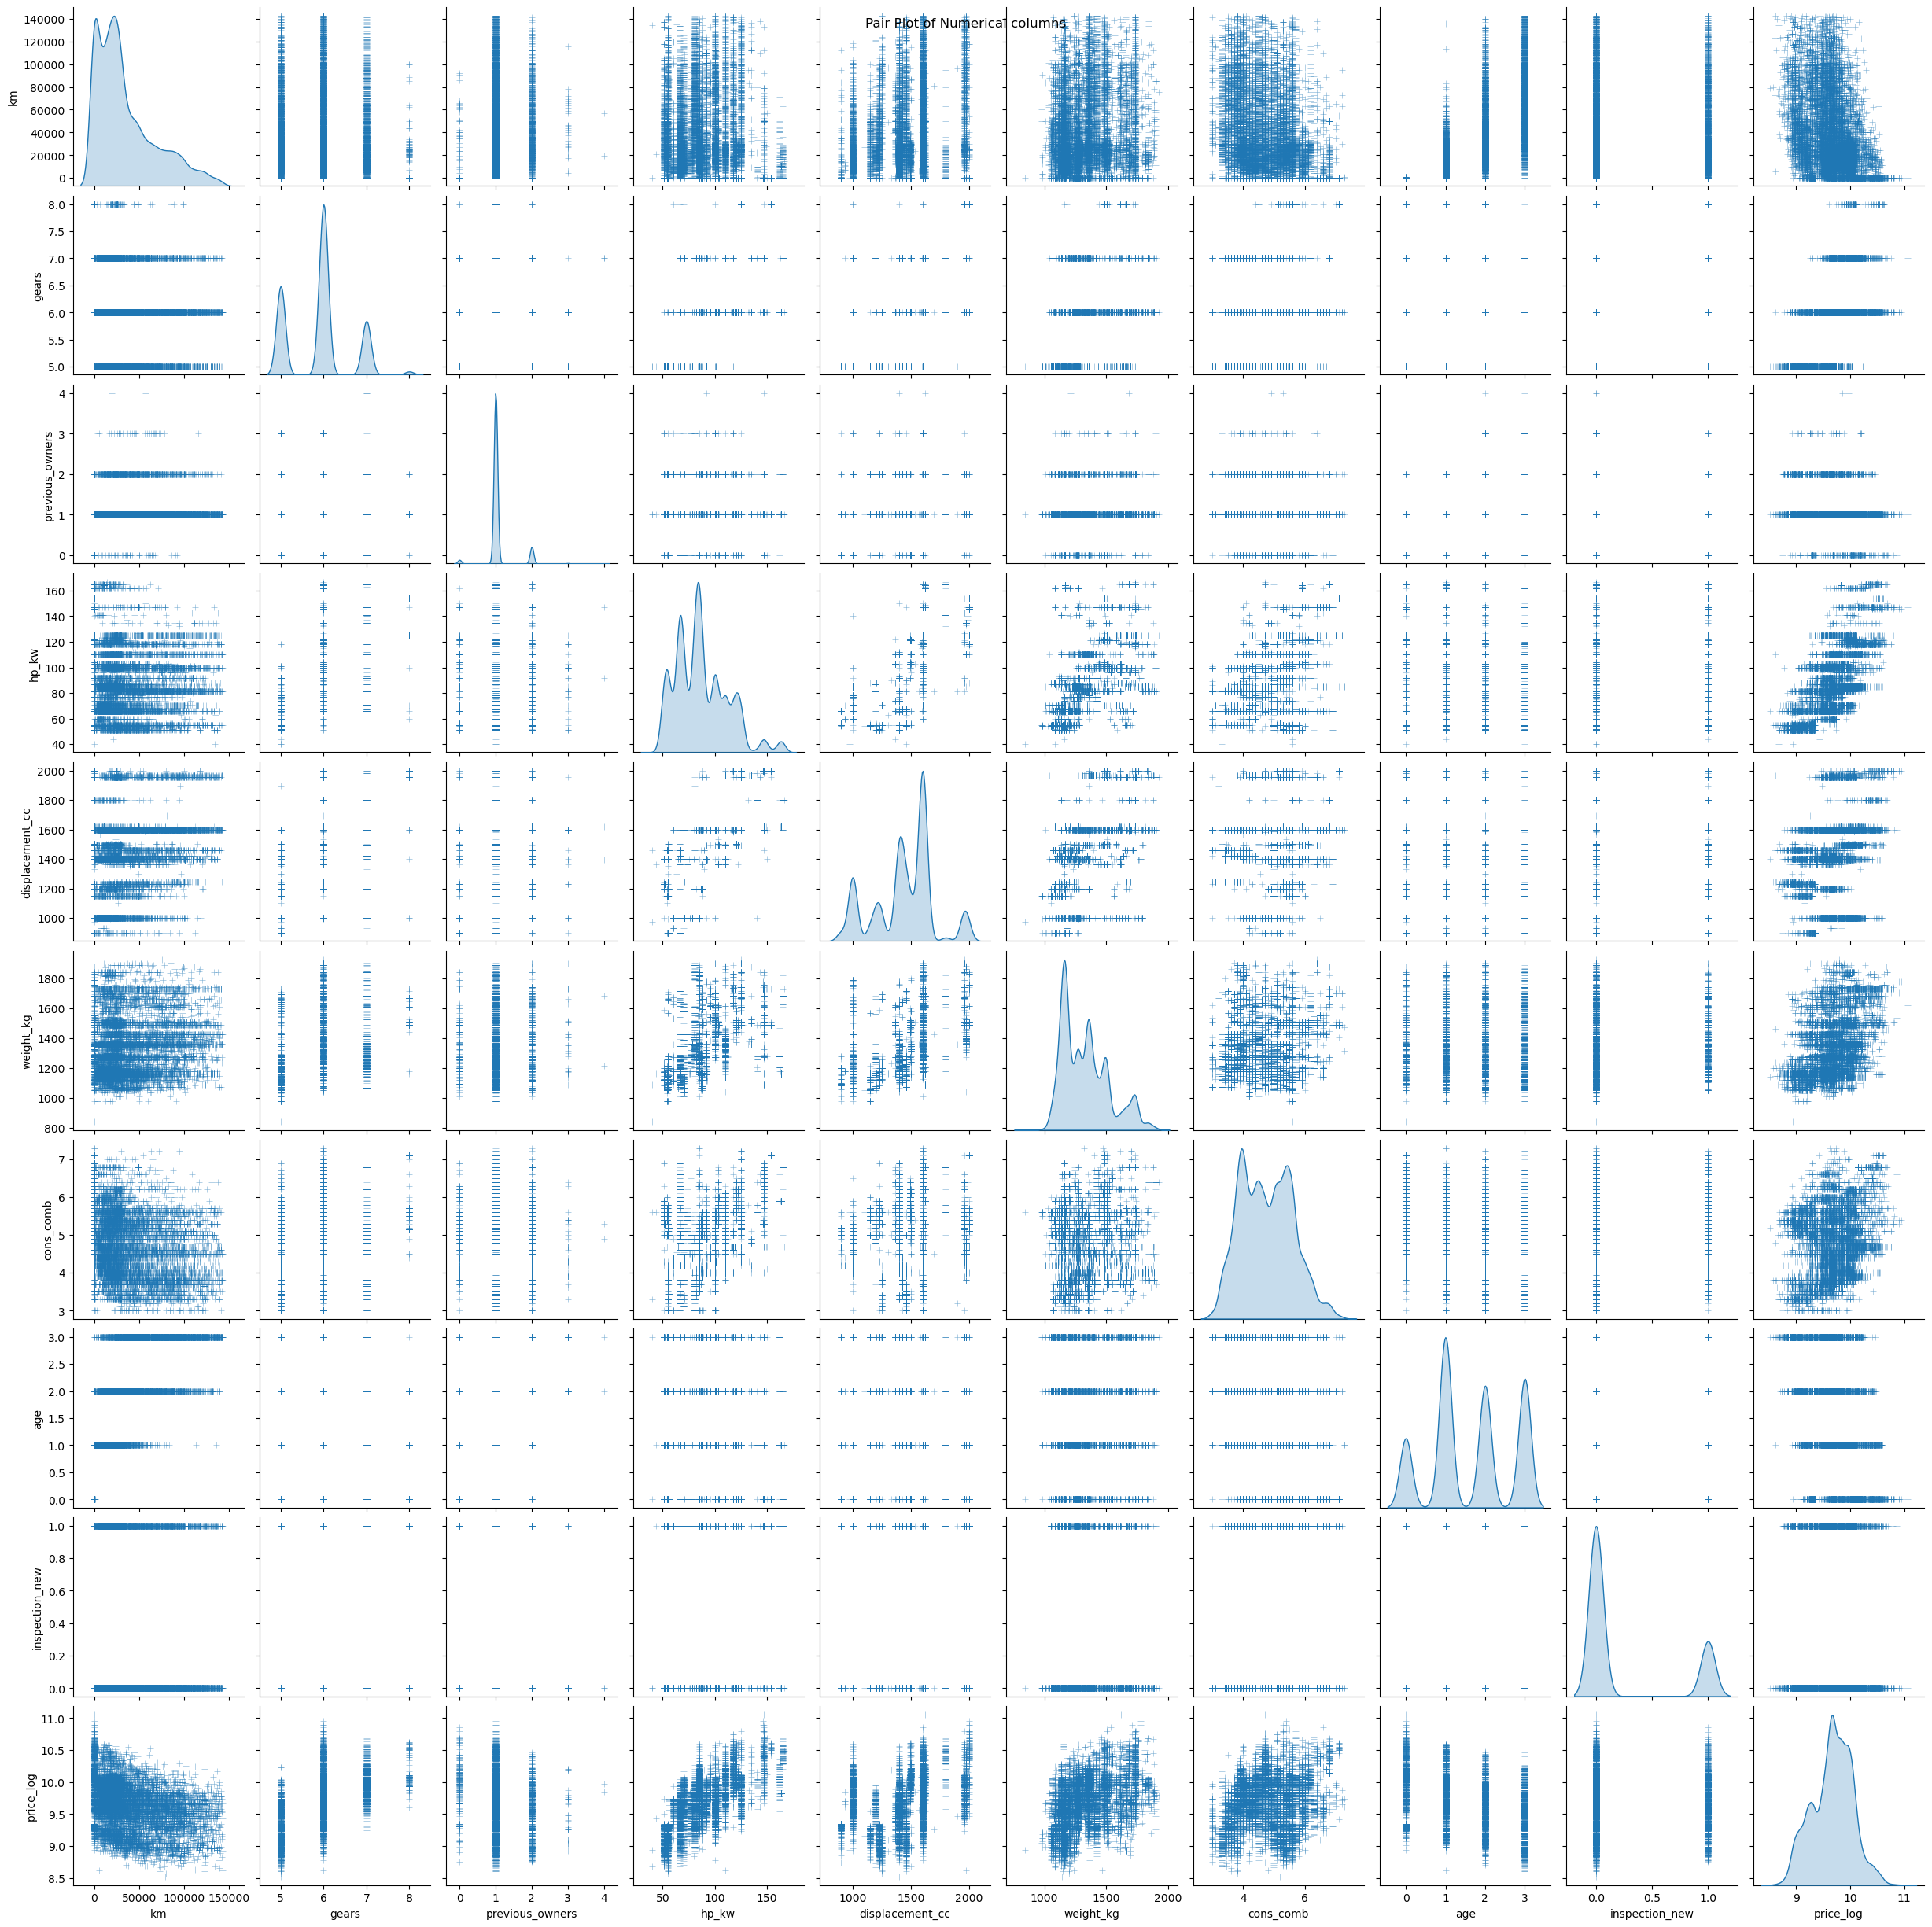

In [28]:
# Pair plot of all variables
plt.figure(figsize=(16, 16))
sns.pairplot(df_out[num_columns + target_column_log], diag_kind='kde', markers='+', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical columns")
plt.show()

### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [29]:
# Fix/create columns as needed and create new ones

# power_to_weight ratio column = hp_kw / weight_kg
# km_per_year column = km / (age+1)
# engine_efficiency column (displacement_cc / hp_kw)

def create_additional_features(df):
    print(f"Creating additional features:")
    # Power to weight ratio
    df['power_to_weight'] = df['hp_kw'] / df['weight_kg']
    print(f"- Created 'power_to_weight' feature as hp_kw / weight_kg")
    print(f"- power_to_weight stats: min={df['power_to_weight'].min():.4f}, max={df['power_to_weight'].max():.4f}, mean={df['power_to_weight'].mean():.4f}")

    # KM per year
    df['km_per_year'] = df.apply(lambda row: row['km'] / (row['age'] + 1) if row['age'] > 0 else row['km'], axis=1)
    print(f"- Created 'km_per_year' feature as km / (age + 1) (if age > 0 else km)")
    print(f"- km_per_year stats: min={df['km_per_year'].min():.2f}, max={df['km_per_year'].max():.2f}, mean={df['km_per_year'].mean():.2f}")

    # Engine efficiency
    df['engine_efficiency'] = df['displacement_cc'] / df['hp_kw']
    print(f"- Created 'engine_efficiency' feature as displacement_cc / hp_kw")
    print(f"- engine_efficiency stats: min={df['engine_efficiency'].min():.4f}, max={df['engine_efficiency'].max():.4f}, mean={df['engine_efficiency'].mean():.4f}")

    print("We will retain the original columns as well for modeling and see the impact of regularization techniques.")
    return df
df_out = create_additional_features(df_out)

Creating additional features:
- Created 'power_to_weight' feature as hp_kw / weight_kg
- power_to_weight stats: min=0.0321, max=0.1490, mean=0.0648
- Created 'km_per_year' feature as km / (age + 1) (if age > 0 else km)
- km_per_year stats: min=0.00, max=68000.00, mean=11181.03
- Created 'engine_efficiency' feature as displacement_cc / hp_kw
- engine_efficiency stats: min=7.1357, max=36.5250, mean=17.3879
We will retain the original columns as well for modeling and see the impact of regularization techniques.


| Feature             | Formula                   | Intuition                                                  | Why it can help                                                                        |
| ------------------- | ------------------------- | ---------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| `power_to_weight`   | `hp_kw / weight_kg`       | Captures engine strength per mass (performance indicator). | Combines two correlated predictors into one ratio — Lasso may pick it instead of both. |
| `km_per_year`       | `km / (age + 1)`          | Measures usage intensity.                                  | Older low-mileage vs. newer high-mileage cars — useful differentiator.                 |
| `engine_efficiency` | `displacement_cc / hp_kw` | Rough inverse of engine tuning.                            | Optional — may not improve model, but interpretable.                                   |


In [30]:
# One hot encoding for categorical columns with single values

def one_hot_encode_columns(df, categorical_cols):
    """
    One-hot encodes specified categorical columns in the dataframe.

    Args:
        df (pd.DataFrame): Input dataframe
        categorical_cols (list): List of categorical column names to be one-hot encoded

    Returns:
        pd.DataFrame: Dataframe with one-hot encoded columns
    """
    df_encoded = df.copy()
    
    # One-hot encode specified categorical columns
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

    # Convert only boolean columns to int
    for col in df_encoded.select_dtypes('bool').columns:
        df_encoded[col] = df_encoded[col].astype('int64')
    
    return df_encoded


one_hot_cols=['make_model', 'body_type', 'vat', 'type', 'fuel', 'paint_type', 'upholstery_type', 'gearing_type', 'drive_chain']
df_encoded = one_hot_encode_columns(df_out, one_hot_cols)


In [31]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12932 entries, 0 to 15913
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              12932 non-null  int64  
 1   km                                 12932 non-null  float64
 2   gears                              12932 non-null  float64
 3   comfort_convenience                12932 non-null  object 
 4   entertainment_media                12932 non-null  object 
 5   extras                             12932 non-null  object 
 6   safety_security                    12932 non-null  object 
 7   age                                12932 non-null  float64
 8   previous_owners                    12932 non-null  float64
 9   hp_kw                              12932 non-null  float64
 10  inspection_new                     12932 non-null  int64  
 11  displacement_cc                    12932 non-null  float64


In [32]:
df_encoded.shape

(12932, 39)

#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [33]:
# Check unique values in each feature spec column

# Create list of features from df where features are present in < 5% of cars

def get_common_multilabel_features(df, columns, threshold_percent=5):
    """
    For each multi-label categorical column:
    1. Split values by comma, convert to a pandasSeries where each row is a list of features
    2. Flatten all lists into a single list all_features, to count occurrence of each feature
    3. Keep only features present in >= threshold_percent of rows
    
    Returns a dictionary: {column_name: list_of_common_features}
    """
    common_features_dict = {}

    for col in columns:
        # Step 1: Split comma-separated strings into lists
        col_list = df[col].str.split(',').apply(lambda x: [item.strip() for item in x])
        
        # Flatten all lists to count features
        all_features = [item for sublist in col_list for item in sublist]
        feature_counts = Counter(all_features)
        
        # Step 2: Convert to percentage
        feature_freq = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['count'])
        feature_freq['percentage'] = feature_freq['count'] / len(df) * 100
        
        # Step 3: Keep only features above threshold
        common_features = feature_freq[feature_freq['percentage'] >= threshold_percent].index.tolist()
        common_features_dict[col] = common_features
        
        print(f"{col}: {len(common_features)} features retained out of {len(feature_counts)} total")
    
    return common_features_dict

# Example usage:
multi_label_cols = ['comfort_convenience', 'entertainment_media', 'extras', 'safety_security']
common_features_dict = get_common_multilabel_features(df_encoded, multi_label_cols, threshold_percent=5)

# common_features is a dictionary mapping each column to the features to encode
from pprint import pprint
print("\nList of commonly used features retained in the columns:")
pprint(common_features_dict)



comfort_convenience: 27 features retained out of 38 total
entertainment_media: 9 features retained out of 10 total
extras: 8 features retained out of 17 total
safety_security: 27 features retained out of 29 total

List of commonly used features retained in the columns:
{'comfort_convenience': ['Air conditioning',
                         'Armrest',
                         'Automatic climate control',
                         'Cruise control',
                         'Electrical side mirrors',
                         'Hill Holder',
                         'Leather steering wheel',
                         'Light sensor',
                         'Multi-function steering wheel',
                         'Navigation system',
                         'Park Distance Control',
                         'Parking assist system sensors rear',
                         'Power windows',
                         'Rain sensor',
                         'Seat heating',
                         'St

#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [34]:
# Apply multi-hot encoding  MultiLabelBinarizer
# ['comfort_convenience', 'entertainment_media', 'extras', 'safety_security']

def multi_hot_encode_columns(df, multi_label_cols, common_features_dict):
    """
    Multi-hot encode multi-label columns using only common features.
    
    Args:
        df: pandas DataFrame
        multi_label_cols: list of multi-label column names
        common_features_dict: dict {col_name: list_of_common_features}
        
    Returns:
        df_encoded: original df with multi-hot columns concatenated (original columns dropped)
    """
    df_encoded = df.copy()
    
    for col in multi_label_cols:
        # Split and strip
        col_list = df[col].str.split(',').apply(lambda x: [item.strip() for item in x if item.strip() in common_features_dict[col]])    
 
        # Multi-hot encode using only common features
        mlb = MultiLabelBinarizer(classes=common_features_dict[col])
        encoded = pd.DataFrame(
            mlb.fit_transform(col_list),
            columns=[f"{col}_{feat}" for feat in mlb.classes_],
            index=df_encoded.index
        )
        
        # Concatenate encoded columns and drop original
        df_encoded = pd.concat([df_encoded, encoded], axis=1).drop(columns=[col])
    
    return df_encoded

# Example usage:
df_encoded = multi_hot_encode_columns(df_encoded, multi_label_cols, common_features_dict)

print("Encoded DataFrame shape:", df_encoded.shape)


Encoded DataFrame shape: (12932, 106)


In [35]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12932 entries, 0 to 15913
Columns: 106 entries, price to safety_security_Blind spot monitor
dtypes: float64(12), int64(94)
memory usage: 10.6 MB


#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [36]:
# Split data

def split_dataset(df):
    X = df.drop(columns=['price', 'price_log'])
    y = df['price_log']
    y_with_orig = df[['price','price_log']]  # For reference only

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print (f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

    return X_train, X_test, y_train, y_test, y_with_orig

X_train, X_test, y_train_log, y_test_log, y_with_orig = split_dataset(df_encoded)

Shape of X_train: (10345, 104), y_train: (10345,), X_test: (2587, 104), y_test: (2587,)


**Train-Test Split Inference**
- The dataset was split into training (80%) and testing (20%) subsets using the log-transformed target (price_log).
- Both price and price_log columns were removed from the feature matrix X to avoid leakage.
- The original price column was retained separately (y_with_orig) for evaluation and inverse transformation during metric computation.
- A fixed random seed ensures reproducibility.

#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

Recommended workflow:

- Split your data into train and test sets.
- Fit the scaler (e.g., StandardScaler, MinMaxScaler) only on the training data.
- Transform both train and test sets using the scaler fitted on the training data.
- Use the scaled data for all your models.

Why?
- Scaling before splitting can cause data leakage, leading to overly optimistic model performance.
- Scaling after splitting ensures fair and realistic evaluation for all models.

When to use StandardScaler vs MinMaxScalar:
- Standard
    - Most features are continuous and roughly bell-shaped (normal distribution).
    - You are using models that assume standardized data (linear regression, logistic regression, SVM, etc.).
    - You want to handle outliers more robustly (StandardScaler is less sensitive than MinMaxScaler).
- MinMaxScaler:
    - Your features have a known, fixed range and you want to scale everything to [0, 1].
    - You are using models that are sensitive to the scale of input (e.g., neural networks).
    - Your data does not have extreme outliers.

In [37]:
# Scale features
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_features(X_train, X_test, scaler_type='standard'):
    """
    Scales features using StandardScaler or MinMaxScaler.

    Args:
        X_train (pd.DataFrame): Training features
        X_test (pd.DataFrame): Test features
        scaler_type (str): 'standard' for StandardScaler, 'minmax' for MinMaxScaler

    Returns:
        X_train_scaled, X_test_scaled, scaler
    """
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("scaler_type must be 'standard' or 'minmax'")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler


X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test, scaler_type='standard')
print(f"Shape of X_train_scaled, X_test_scaled : {X_train_scaled.shape}, {X_test_scaled.shape}")


Shape of X_train_scaled, X_test_scaled : (10345, 104), (2587, 104)


**Inference**
- Features were standardized using Z-score scaling (StandardScaler) to ensure all predictors have comparable influence on the regression coefficients.
- The scaler was fit on the training data and applied to the test data to prevent data leakage.

## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [38]:
# Initialise and train model
def baseline_linear_model(X_train_scaled, X_test_scaled, y_train_log):
    """baseline_linear_model fits a LinearRegression on the scaled training data and returns predictions for both train and test sets."""
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train_log)
    y_train_log_pred = lr.predict(X_train_scaled)
    y_test_log_pred  = lr.predict(X_test_scaled)

    return lr, y_train_log_pred, y_test_log_pred
lr, y_train_log_pred, y_test_log_pred = baseline_linear_model(X_train_scaled, X_test_scaled, y_train_log)

In [39]:
lr_coeff = pd.DataFrame({
    'feature'  : X_train.columns,
    'coef_log_scale'     : lr.coef_,
    'coef_abs' : np.abs(lr.coef_),
    'sign'     : np.where(lr.coef_>0, "+", "-")  
}).sort_values(by='coef_abs', ascending=False)

# Display top N positive and negative coefficients
print("-"*75)
print("Top 10 Coefficients with sign")
print("-"*75)
display(lr_coeff.head(10))
print("-"*75)
print("Bottom 10 Coefficients with sign")
print("-"*75)
display(lr_coeff.tail(10))

---------------------------------------------------------------------------
Top 10 Coefficients with sign
---------------------------------------------------------------------------


feature  coef_log_scale  coef_abs sign
15      make_model_Opel Corsa       -0.159893  0.159893    -
17    make_model_Renault Clio       -0.133566  0.133566    -
9             power_to_weight        0.128286  0.128286    +
14      make_model_Opel Astra       -0.081312  0.081312    -
2                         age       -0.079387  0.079387    -
0                          km       -0.064103  0.064103    -
30        gearing_type_Manual       -0.060522  0.060522    -
4                       hp_kw       -0.059259  0.059259    -
7                   weight_kg        0.056213  0.056213    +
18  make_model_Renault Espace        0.050818  0.050818    +

---------------------------------------------------------------------------
Bottom 10 Coefficients with sign
---------------------------------------------------------------------------


feature  coef_log_scale  \
76                                  extras_Roof rack    7.484882e-04   
101         safety_security_Traffic sign recognition    5.053781e-04   
88   safety_security_Tire pressure monitoring system    3.361097e-04   
103               safety_security_Blind spot monitor    2.619943e-04   
62             entertainment_media_On-board computer   -2.444862e-04   
97        safety_security_LED Daytime Running Lights   -2.349946e-04   
58             comfort_convenience_Electric tailgate   -2.084964e-04   
37       comfort_convenience_Electrical side mirrors    4.403911e-05   
93                      safety_security_Alarm system   -3.265472e-05   
12                                make_model_Audi A2   -5.030698e-17   

         coef_abs sign  
76   7.484882e-04    +  
101  5.053781e-04    +  
88   3.361097e-04    +  
103  2.619943e-04    +  
62   2.444862e-04    -  
97   2.349946e-04    -  
58   2.084964e-04    -  
37   4.403911e-05    +  
93   3.265472e-05    -  
12   5.030698e-17    -

In [40]:
# Evaluate the model's performance

def analyze_model_performance(y_train_log, y_train_log_pred, y_test_log, y_test_log_pred):
    """analyze_model_performance computes and displays common regression metrics for both train and test predictions in a DataFrame."""
    def analyze_model_scores(y_act, y_prd):
        """Compute regression metrics on original (inverse-transformed) scale."""
        r2 = r2_score(y_act, y_prd)
        mse = mean_squared_error(y_act, y_prd)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_act, y_prd)
        mape = mean_absolute_percentage_error(y_act, y_prd)

        var = y_act.var()
        std = y_act.std()
        mean_val = y_act.mean()

        return rmse, std, mse, var, mae, mean_val, mape, r2

    # inverse transform
    y_train_act = np.expm1(y_train_log)
    y_train_pred = np.expm1(y_train_log_pred)
    y_test_act = np.expm1(y_test_log)
    y_test_pred = np.expm1(y_test_log_pred)

    rmse_train, std_train, mse_train, var_train, mae_train, mean_val_train, mape_train, r2_train = analyze_model_scores(y_train_act, y_train_pred)
    rmse_test, std_test, mse_test, var_test, mae_test, mean_val_test, mape_test, r2_test = analyze_model_scores(y_test_act, y_test_pred)

    results = pd.DataFrame({
                    'dataset' : ['Training', 'Test'],
                    'rmse' : [rmse_train, rmse_test],
                    'std' : [std_train, std_test],
                    'mse' : [mse_train, mse_test],
                    'var' : [var_train, var_test],
                    'mae' : [mae_train, mae_test],
                    'mean': [mean_val_train, mean_val_test],
                    'mape': [mape_train, mape_test],
                    'r2' : [r2_train, r2_test]
    })

    display(results)
    return results

print("-"*75)
print("Analyze Model Performance (on original scale) – Baseline Linear Regression")
print("-"*75)
baseline_model_results = analyze_model_performance(y_train_log, y_train_log_pred, y_test_log, y_test_log_pred)



---------------------------------------------------------------------------
Analyze Model Performance (on original scale) – Baseline Linear Regression
---------------------------------------------------------------------------


dataset         rmse          std           mse           var  \
0  Training  1890.889624  6323.232932  3.575464e+06  3.998327e+07   
1      Test  1907.033451  6225.883135  3.636777e+06  3.876162e+07   

           mae          mean      mape        r2  
0  1210.026725  16884.875109  0.070142  0.910567  
1  1221.702503  16946.799768  0.070641  0.906140

**Analysis of baseline model (on original price scale)**
 - rmse < std: Good. Your model’s error is less than the standard deviation of the actual values, meaning it’s better than just predicting the mean.
- mse < var for train and test: Good. The model’s mean squared error is less than the variance of the actuals, indicating it’s capturing signal.
- mae < mean for train and test: Good. The average error is much less than the average value, so your predictions are reasonably close.
- r2 > 0.90 for both and close: Very good. High and similar R² on train and test means your model is both accurate and generalizes well.

| Metric            | Train                    | Test                                                                                         | Interpretation                                                                                               |
| ----------------- | ------------------------ | -------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| **RMSE**          | 1,890                    | 1,907                                                                                        | Average price prediction error ~1.9K → remarkably low relative to mean price (~16.9K). Indicates good fit. |
| **MAE**           | 1,210                    | 1,222                                                                                        | Mean abs error around 1.2K → tight clustering around actuals.                                                 |
| **R²**            | 0.91                     | 0.906                                                                                        | Model explains ~91% of variance in price — very strong baseline performance.                                 |
| **MAPE**          | 7.0%                     | 7.1%                                                                                         | On average, predictions are within ±7% of the actual price — highly acceptable for car pricing models.       |
| **Train vs Test** | Close across all metrics | Indicates minimal overfitting. Scaling, transformations, and encoding are working correctly. |                                                                                                              |


**Summary:**
- model is performing well overall.
- Keep an eye on the gap between train and test metrics; if it grows, consider regularization or more data.

#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

Baseline Model - Plot of Residuals vs Predicted (on original scale):
---------------------------------------------------------------------------


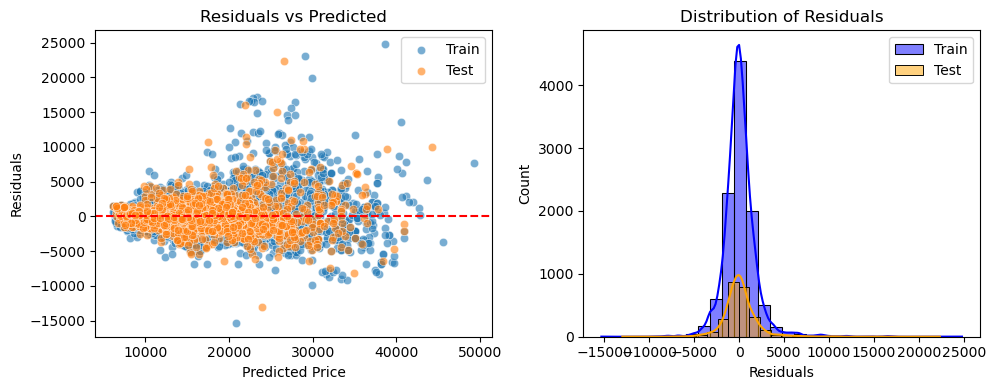

In [41]:
# Linearity check: Plot residuals vs fitted values

def plot_residuals_vs_predicted(y_train_log, y_train_log_pred, y_test_log, y_test_log_pred):

    # residuals is actual - prediction value
    y_train_pred = np.expm1(y_train_log_pred)
    y_test_pred = np.expm1(y_test_log_pred)
    y_train_actual = np.expm1(y_train_log)
    y_test_actual = np.expm1(y_test_log)
    residuals_train = y_train_actual - y_train_pred
    residuals_test = y_test_actual - y_test_pred

    fig, axes = plt.subplots(1, 2, figsize = (10, 4))

    # Residuals vs predicted target values 
    sns.scatterplot(x = y_train_pred, y = residuals_train, ax = axes[0], label = 'Train', alpha = 0.6)
    sns.scatterplot(x = y_test_pred, y = residuals_test, ax = axes[0], label = 'Test', alpha = 0.6)
    axes[0].axhline(0, color = 'red', linestyle = '--'); axes[0].set_xlabel('Predicted Price'); axes[0].set_ylabel('Residuals'); axes[0].set_title('Residuals vs Predicted'); axes[0].legend()

    # Residuals distribution 
    sns.histplot(residuals_train, kde = True, bins = 30, ax = axes[1], color = 'blue', label = 'Train', alpha = 0.5)
    sns.histplot(residuals_test, kde = True, bins = 30, ax = axes[1], color = 'orange', label = 'Test', alpha = 0.5)
    axes[1].set_xlabel('Residuals'); axes[1].set_title('Distribution of Residuals'); axes[1].legend(); plt.tight_layout()

print(f"Baseline Model - Plot of Residuals vs Predicted (on original scale):")
print("-"*75)
plot_residuals_vs_predicted(y_train_log, y_train_log_pred, y_test_log, y_test_log_pred)


**Residual Plots Interpretation**
- Mean of residuals is zero
- Spread looks symmetric (no skew)
- No clear pattern (e.g., residuals increasing only for certain predicted price ranges).
- Distribution of residuals is normal for train and test both

Check normality in residual distribution

In [42]:
# Check the normality of residuals by plotting their distribution

# Done above

Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

What:
- Creates a DataFrame to store VIF results.
- For each feature (including the constant), calculates the Variance Inflation Factor (VIF) using variance_inflation_factor.
- VIF measures how much a feature is linearly predicted by the other features (i.e., multicollinearity).

How VIF works:
- For each feature, it fits a regression model predicting that feature from all the others.
- VIF = 1 / (1 - R²) from that regression.
- High VIF (>5 or >10) means the feature is highly collinear with others

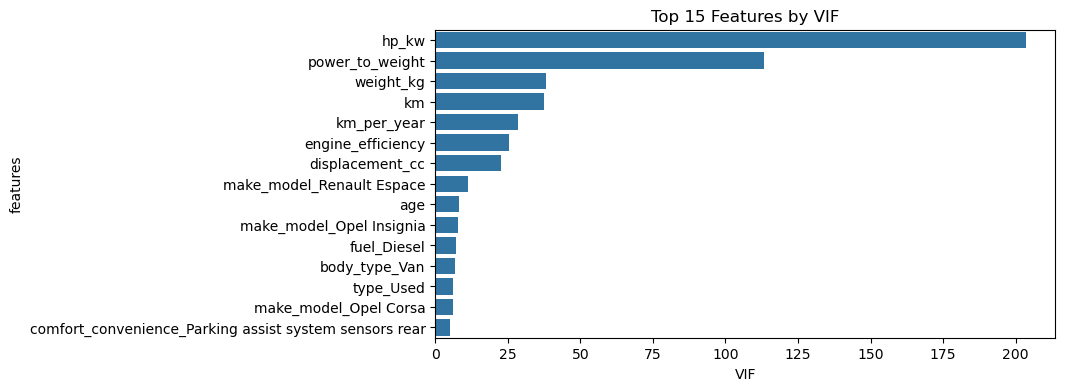

Variance Inflation Factor (VIF) for features:


features         VIF
0                                               hp_kw  203.463609
1                                     power_to_weight  113.422714
2                                           weight_kg   38.132665
3                                                  km   37.505943
4                                         km_per_year   28.616955
5                                   engine_efficiency   25.255668
6                                     displacement_cc   22.549607
7                           make_model_Renault Espace   11.238599
8                                                 age    8.312268
9                            make_model_Opel Insignia    7.942626
10                                        fuel_Diesel    7.310767
11                                      body_type_Van    6.690555
12                                          type_Used    6.226696
13                              make_model_Opel Corsa    6.147499
14  comfort_convenience_Parking assist system sens...    4.982086
15                                          cons_comb    4.689666
16                            body_type_Station wagon    4.672582
17                              make_model_Opel Astra    4.510686
18                            make_model_Renault Clio    4.226622
19          comfort_convenience_Park Distance Control    4.224146

In [43]:
# Check for multicollinearity and handle

def check_multicollinearity(X_train):
    """
    Check multicollinearity using Variance Inflation Factor (VIF).
    VIF measures how much a feature is linearly predicted by the other features (i.e., multicollinearity).
    A VIF > 5 indicates a potential multicollinearity problem.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # Add intercept for VIF calculation - Adds a column of ones (called the "constant" or "intercept") to your features.
    # Why: Many statistical models (like OLS regression) require an explicit intercept term. 
    # The VIF calculation also expects this, so we add it to ensure correct results.
    X_vif = X_train.copy()
    X_vif['intercept'] = 1

    # For each feature (including the constant), calculates the Variance Inflation Factor (VIF) using variance_inflation_factor.
    vif_data = pd.DataFrame()
    vif_data['features'] = X_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

    vif_data = vif_data[vif_data['features'] != 'intercept']
    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

    plt.figure(figsize=(8,4))
    sns.barplot(data=vif_data.head(15), x='VIF', y='features', orient='h')
    plt.title('Top 15 Features by VIF')
    plt.show()

    return vif_data

vif_df = check_multicollinearity(X_train)
print("Variance Inflation Factor (VIF) for features:")
display(vif_df.head(20))  # Display top 20 features with highest VIF

**Interpretation**
- VIF < 5 → Fine
- 5 ≤ VIF < 10 → Moderate multicollinearity, keep an eye
- VIF ≥ 10 → Strong multicollinearity, consider fixing

| **Feature**                                   | **VIF** | **Interpretation**                                                                                                                            |
| --------------------------------------------- | ------: | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **hp_kw**                                     |  203.46 |  Extremely high — strongly collinear with `power_to_weight`, `weight_kg`, and `displacement_cc`. Represents core engine power relationship. |
| **power_to_weight**                           |  113.42 |  Severe redundancy with both `hp_kw` and `weight_kg`. Derived feature amplifies existing relationship. Ridge/Lasso will handle.             |
| **weight_kg**                                 |   38.13 |  High multicollinearity — tied to both horsepower and displacement; heavier cars generally have higher engine output.                       |
| **km**                                        |   37.51 |  Very high collinearity with `age` and `km_per_year`; these variables capture overlapping vehicle usage information.                        |
| **km_per_year**                               |   28.62 |  Derived feature — strongly correlated with both `age` and `km`. Leave for now; regularization will address redundancy.                     |
| **engine_efficiency**                         |   25.26 |  High — computed from `hp_kw` and `displacement_cc`; naturally interdependent. Retain for interpretability but watch VIF.                   |
| **displacement_cc**                           |   22.55 |  High collinearity with `hp_kw` and `engine_efficiency`. Both capture aspects of engine capacity.                                           |
| **make_model_Renault Espace**                 |   11.24 |  High — overlaps with `body_type_Van` (most Espace are vans) and higher weights.                                                            |
| **age**                                       |    8.31 |  Moderate — correlates with `km` and `km_per_year`; expected due to vehicle usage linkage.                                                  |
| **make_model_Opel Insignia**                  |    7.94 |  Moderate — overlaps with other Opel model dummies and related body types.                                                                  |
| **fuel_Diesel**                               |    7.31 |  Moderate — associated with larger engines (`hp_kw`, `displacement_cc`, `cons_comb`).                                                       |
| **body_type_Van**                             |    6.69 |  Moderate — correlates with `make_model_Renault Espace`; redundancy expected.                                                               |
| **type_Used**                                 |    6.23 |  Moderate — correlates with `age` and `km`; used cars are typically older and have higher mileage.                                          |
| **make_model_Opel Corsa**                     |    6.15 |  Moderate — overlaps with other Opel dummies and smaller engine specs.                                                                      |
| **comfort_convenience_Parking assist…**       |    4.98 |  Acceptable — slight correlation with other comfort features (e.g., Park Distance Control).                                                  |
| **cons_comb**                                 |    4.69 |  Acceptable — moderate correlation with engine size and efficiency.                                                                          |
| **body_type_Station wagon**                   |    4.67 |  Acceptable — overlaps with specific models (Astra wagon, Renault Espace).                                                                   |
| **make_model_Opel Astra**                     |    4.51 |  Acceptable — moderate overlap with other Opel dummies and body types.                                                                       |
| **make_model_Renault Clio**                   |    4.23 |  Acceptable — some overlap with Renault brand effects but within safe limits.                                                                |
| **comfort_convenience_Park Distance Control** |    4.22 |  Acceptable — overlaps with other parking-assist-related features but low impact.                                                            |



**Multi-Collinearity Interpretation Summary**
- Multicollinearity is severe among engine-related and derived numerical features but moderate to low elsewhere.
- This is an expected outcome after introducing interaction-style engineered variables.
- No manual feature removal was performed — subsequent Ridge and Lasso regression models will regularize and shrink redundant predictors automatically, ensuring model stability and interpretability.

### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [44]:
# List of alphas to tune for Ridge regularisation

alpha_range = [0.01, 0.1, 1, 10, 50, 100, 200, 300, 400, 500]

#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [45]:
# Applying Ridge regression
def run_ridgecv_model(X_train_scaled, X_test_scaled, y_train_log, alpha_range):
    """
    Fits a RidgeCV model to the training data and returns predictions for both train and test sets.
    Also returns the chosen alpha value.

    Args:
        X_train_scaled (np.array): Scaled training features
        X_test_scaled (np.array): Scaled test features
        y_train_log (pd.Series): Training target
        alpha_range (list): List of alpha values to try
    Returns:
        ridge (RidgeCV): Fitted RidgeCV model
        y_train_log_ridge_pred (np.array): Predictions on training set
        y_test_log_ridge_pred (np.array): Predictions on test set
    """
    # cv=5 is same as default KFold(n_splits=5, shuffle=False)
    # cv=KFold(n_splits=5, shuffle=True, random_state=42) => This explicitly creates a KFold cross-validator with 5 splits, 
    # shuffling the data before splitting, especially needed if your dataset is ordered
    # shuffle=True randomizes the order of the data before splitting
    # random_state=42 ensures reproducibility (the same splits every time you run)
    
    ridgecv_model = RidgeCV(alphas=alpha_range, scoring="neg_mean_absolute_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
    ridgecv_model.fit(X_train_scaled, y_train_log)
    y_train_log_ridge_pred = ridgecv_model.predict(X_train_scaled)
    y_test_log_ridge_pred = ridgecv_model.predict(X_test_scaled)

    return ridgecv_model, y_train_log_ridge_pred, y_test_log_ridge_pred

ridgecv_model, y_train_log_ridge_pred, y_test_log_ridge_pred  = run_ridgecv_model(X_train_scaled, X_test_scaled, y_train_log, alpha_range)



RidgeCV Model - Analyze Model Performance (on original scale):
---------------------------------------------------------------------------


dataset         rmse          std           mse           var  \
0  Training  1890.886842  6323.232932  3.575453e+06  3.998327e+07   
1      Test  1907.034162  6225.883135  3.636779e+06  3.876162e+07   

           mae          mean      mape        r2  
0  1210.026185  16884.875109  0.070142  0.910568  
1  1221.702072  16946.799768  0.070640  0.906139

---------------------------------------------------------------------------
RidgeCV Model - Plot of Residuals vs Predicted (on original scale):


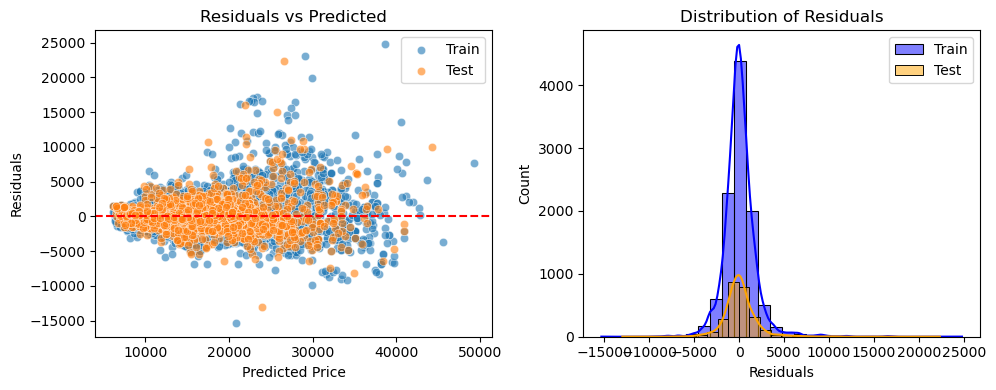

In [46]:
# Analyze model performance
print(f"RidgeCV Model - Analyze Model Performance (on original scale):")
print("-"*75)
ridge_results = analyze_model_performance(y_train_log, y_train_log_ridge_pred, y_test_log, y_test_log_ridge_pred)
print("-"*75)
print(f"RidgeCV Model - Plot of Residuals vs Predicted (on original scale):")
plot_residuals_vs_predicted(y_train_log, y_train_log_ridge_pred, y_test_log, y_test_log_ridge_pred)

Best alpha based on CV validation MAE: 0.01


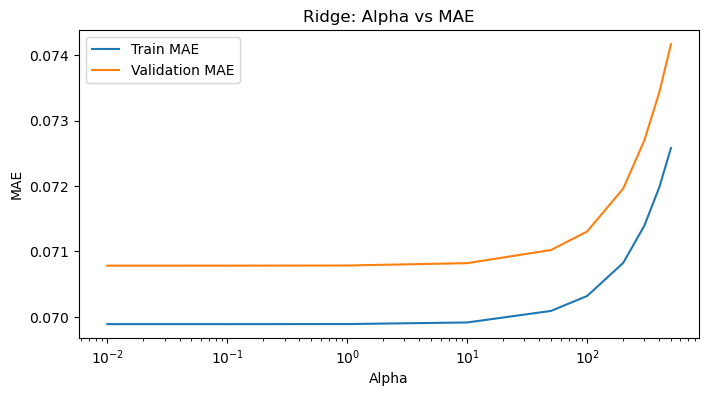

In [50]:
# Plot train and test scores against alpha
#from sklearn.model_selection import cross_val_score

# The reason the code uses Ridge inside the loop is because RidgeCV doesn’t expose per-alpha train/val scores for plotting. 
# It only gives you the final chosen alpha and fitted coefficients.
# So if you want to visualize how MAE changes across alphas, you have to do it manually with Ridge.

def plot_alpha_vs_score(X_train_scaled, y_train_log, alpha_range):
    train_scores = []
    val_scores = []
    for alpha in alpha_range:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_scaled, y_train_log)
        train_scores.append(mean_absolute_error(y_train_log, ridge.predict(X_train_scaled)))
        # use CV for val score
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        val_score = -cross_val_score(Ridge(alpha=alpha), X_train_scaled, y_train_log,
                                     scoring="neg_mean_absolute_error", cv=cv).mean()
        val_scores.append(val_score)

    # Find best alpha
    chosen_ridge_alpha = alpha_range[np.argmin(val_scores)]
    print(f"Best alpha based on CV validation MAE: {chosen_ridge_alpha}")

    plt.figure(figsize=(8,4))
    plt.plot(alpha_range, train_scores, label="Train MAE")
    plt.plot(alpha_range, val_scores, label="Validation MAE")
    plt.xscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("MAE")
    plt.title("Ridge: Alpha vs MAE")
    plt.legend()
    plt.show()
    return chosen_ridge_alpha
    
chosen_ridge_alpha = plot_alpha_vs_score(X_train_scaled, y_train_log, alpha_range)

Find the best alpha value.

In [51]:
# Chosen alpha value
print("-"*75)
print(f"Chosen alpha (Ridge): {chosen_ridge_alpha}")
print("-"*75)



---------------------------------------------------------------------------
Chosen alpha (Ridge): 0.01
---------------------------------------------------------------------------


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [54]:
# Take a smaller range of alpha to test
narrow_alpha_range = np.linspace(0.01, 10, 100)   # 100 values between 0.005 and 10


Final RidgeCV Model - Analyze Model Performance (on original scale):


dataset         rmse          std           mse           var  \
0  Training  1890.886842  6323.232932  3.575453e+06  3.998327e+07   
1      Test  1907.034162  6225.883135  3.636779e+06  3.876162e+07   

           mae          mean      mape        r2  
0  1210.026185  16884.875109  0.070142  0.910568  
1  1221.702072  16946.799768  0.070640  0.906139

Final RidgeCV Model - Plot of Residuals vs Predicted
Best RidgeCV Model Score (Negative MAE): 1221.7020722354073
Best RidgeCV Model Alpha: 0.01


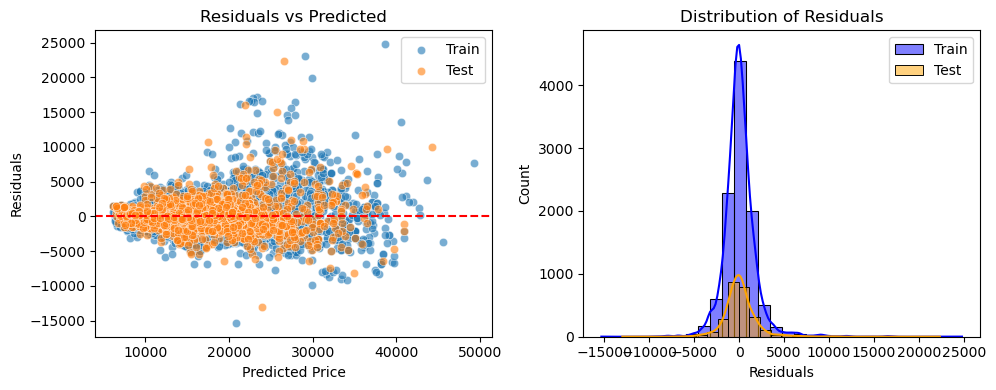

In [55]:
# Applying Ridge regression
# Best alpha value
# Best score (negative MAE)

def find_best_alpha(X_train_scaled, X_test_scaled, y_train_log, alpha_range):
    ridgecv_model, y_train_log_ridge_pred, y_test_log_ridge_pred = run_ridgecv_model(X_train_scaled, X_test_scaled, y_train_log, alpha_range)

    print(f"Final RidgeCV Model - Analyze Model Performance (on original scale):")
    ridgecv_results = analyze_model_performance(y_train_log, y_train_log_ridge_pred, y_test_log, y_test_log_ridge_pred)
    print(f"Final RidgeCV Model - Plot of Residuals vs Predicted")
    plot_residuals_vs_predicted(y_train_log, y_train_log_ridge_pred, y_test_log, y_test_log_ridge_pred)

    # Best score (negative MAE)
    best_score = ridgecv_results.loc[ridgecv_results["dataset"] =='Test']['mae'].values[0]
    print(f"Best RidgeCV Model Score (Negative MAE): {best_score}")
    best_alpha = ridgecv_model.alpha_
    print(f"Best RidgeCV Model Alpha: {best_alpha}")

    return ridgecv_model, ridgecv_results, y_train_log_ridge_pred, y_test_log_ridge_pred, best_alpha, best_score

ridgecv_model, ridgecv_results, y_train_log_ridge_pred, y_test_log_ridge_pred, best_ridge_alpha, best_ridge_score= find_best_alpha(X_train_scaled, X_test_scaled, y_train_log, narrow_alpha_range)



Best alpha based on CV validation MAE: 0.01


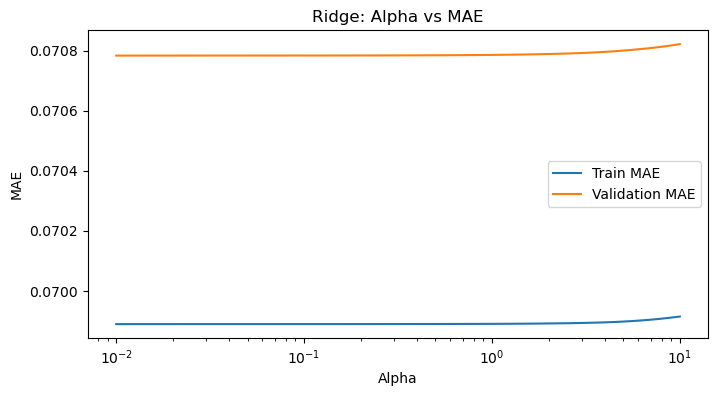

np.float64(0.01)

In [56]:
# Plot train and test scores against alpha


plot_alpha_vs_score(X_train_scaled, y_train_log, narrow_alpha_range)


Plot the error-alpha graph again and find the actual optimal value for alpha.

In [57]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model
print("-"*75)
print(f"Final Ridge Model Coefficients with best score alpha={best_ridge_alpha}:")
print("-"*75)


---------------------------------------------------------------------------
Final Ridge Model Coefficients with best score alpha=0.01:
---------------------------------------------------------------------------


Final RidgeCV Model - Analyze Model Performance (on original scale):


dataset         rmse          std           mse           var  \
0  Training  1890.886842  6323.232932  3.575453e+06  3.998327e+07   
1      Test  1907.034162  6225.883135  3.636779e+06  3.876162e+07   

           mae          mean      mape        r2  
0  1210.026185  16884.875109  0.070142  0.910568  
1  1221.702072  16946.799768  0.070640  0.906139

Final RidgeCV Model - Plot of Residuals vs Predicted
Since the model was trained on log-transformed prices, the coefficients represent the 
percentage change in price (approximately) for a one-standard-deviation increase in 
the respective feature, holding others constant.
---------------------------------------------------------------------------
Top 10 Coefficients with sign
---------------------------------------------------------------------------


feature  coef_log_scale  coef_abs sign  approx_%_change
15      make_model_Opel Corsa       -0.159891  0.159891    -       -14.776324
17    make_model_Renault Clio       -0.133564  0.133564    -       -12.502876
9             power_to_weight        0.128259  0.128259    +        13.684731
14      make_model_Opel Astra       -0.081312  0.081312    -        -7.809406
2                         age       -0.079387  0.079387    -        -7.631795
0                          km       -0.064102  0.064102    -        -6.209081
30        gearing_type_Manual       -0.060521  0.060521    -        -5.872625
4                       hp_kw       -0.059225  0.059225    -        -5.750547
7                   weight_kg        0.056199  0.056199    +         5.780779
18  make_model_Renault Espace        0.050816  0.050816    +         5.212903

---------------------------------------------------------------------------
Bottom 10 Coefficients with sign
---------------------------------------------------------------------------


feature  coef_log_scale  \
76                                  extras_Roof rack        0.000748   
101         safety_security_Traffic sign recognition        0.000505   
88   safety_security_Tire pressure monitoring system        0.000336   
103               safety_security_Blind spot monitor        0.000262   
62             entertainment_media_On-board computer       -0.000245   
97        safety_security_LED Daytime Running Lights       -0.000235   
58             comfort_convenience_Electric tailgate       -0.000209   
37       comfort_convenience_Electrical side mirrors        0.000044   
93                      safety_security_Alarm system       -0.000033   
12                                make_model_Audi A2        0.000000   

     coef_abs sign  approx_%_change  
76   0.000748    +         0.074860  
101  0.000505    +         0.050534  
88   0.000336    +         0.033603  
103  0.000262    +         0.026162  
62   0.000245    -        -0.024453  
97   0.000235    -        -0.023516  
58   0.000209    -        -0.020878  
37   0.000044    +         0.004379  
93   0.000033    -        -0.003257  
12   0.000000    -         0.000000

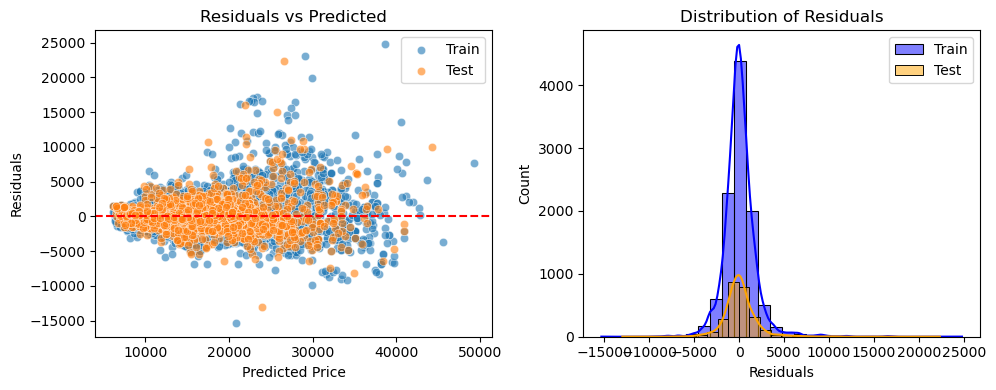

In [58]:
# Show the coefficients for each feature
# Run the final model for best alpha and show coefficients

best_alpha = [best_ridge_alpha]
def show_coefficients(ridgecv_model, X_train):

    ridgecv_model, y_train_log_ridge_pred, y_test_log_ridge_pred = run_ridgecv_model(X_train_scaled, X_test_scaled, y_train_log, best_alpha)

    print(f"Final RidgeCV Model - Analyze Model Performance (on original scale):")
    ridgecv_results = analyze_model_performance(y_train_log, y_train_log_ridge_pred, y_test_log, y_test_log_ridge_pred)
    print(f"Final RidgeCV Model - Plot of Residuals vs Predicted")
    plot_residuals_vs_predicted(y_train_log, y_train_log_ridge_pred, y_test_log, y_test_log_ridge_pred)

    ridgecv_coeff = pd.DataFrame({
        'feature'  : X_train.columns,
        'coef_log_scale'     : ridgecv_model.coef_,
        'coef_abs' : np.abs(ridgecv_model.coef_),
        'sign'     : np.where(ridgecv_model.coef_>0, "+", "-")  
    }).sort_values(by='coef_abs', ascending=False)

    # approximate the effect in % terms for small coefficients
    ridgecv_coeff['approx_%_change'] = (np.exp(ridgecv_coeff['coef_log_scale']) - 1) * 100

    # Display top N positive and negative coefficients
    print(f"Since the model was trained on log-transformed prices, the coefficients represent the ")
    print(f"percentage change in price (approximately) for a one-standard-deviation increase in ")
    print(f"the respective feature, holding others constant.")

    print("-"*75)
    print("Top 10 Coefficients with sign")
    print("-"*75)
    display(ridgecv_coeff.head(10))
    print("-"*75)
    print("Bottom 10 Coefficients with sign")
    print("-"*75)
    display(ridgecv_coeff.tail(10))

    return ridgecv_coeff

ridgecv_coeff = show_coefficients(ridgecv_model, X_train)


In [59]:
# Evaluate the Ridge model on the test data

print("Final Test Evaluation:")
print(f"R²: {ridgecv_results.loc[ridgecv_results['dataset'] == 'Test']['r2'].values[0]:.4f}")
print(f"MAE: {ridgecv_results.loc[ridgecv_results['dataset'] == 'Test']['mae'].values[0]:.2f}")
print(f"MSE: {ridgecv_results.loc[ridgecv_results['dataset'] == 'Test']['mse'].values[0]:.2f}")
print(f"RMSE: {ridgecv_results.loc[ridgecv_results['dataset'] == 'Test']['rmse'].values[0]:.2f}")


Final Test Evaluation:
R²: 0.9061
MAE: 1221.70
MSE: 3636779.29
RMSE: 1907.03


**Ridge Regression (α = 0.01) Summary**
|   Metric |  Train |   Test | Interpretation                |
| -------: | -----: | -----: | ----------------------------- |
| **RMSE** | 1890.9 | 1907.0 | Same as baseline — stable fit |
|  **MAE** | 1210.0 | 1221.7 | Identical to OLS              |
|   **R²** |  0.911 |  0.906 | Identical to OLS              |

Validation behavior: Validation MAE increased beyond α ≈ 10, confirming that higher regularization leads to underfitting.

**Inference:**
- Ridge regularization did not improve predictive performance, which indicates:
    - The data has no severe overfitting issue.
    - Multicollinearity is present (seen in high VIF values), but it doesn’t harm predictive accuracy significantly.
- Ridge provides coefficient stability rather than performance gains.

### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [60]:
# List of alphas to tune for Lasso regularisation

alphas_range = [ 0.01, 0.1, 1, 10, 20]

#### **3.3.2** <font color =red> [4 marks] </font>
Apply Lasso Regularisation and find the best value of alpha from the list

| Score Type         | Computed on                                  | Purpose                                      |
| ------------------ | -------------------------------------------- | -------------------------------------------- |
| **`train_scores`** | Training data                                | How well model fits data it saw              |
| **`val_scores`**   | Cross-validation folds (inside training set) | How well it generalizes during tuning        |
| **`test_scores`**  | Independent test set                         | How well final model performs on unseen data |


In [61]:
# Initialise Lasso regression model
def lasso_model_tuning(X_train_scaled, X_test_scaled, y_train_log, y_test_log, alpha_range, scoring='neg_mean_squared_error'):
    """
    Fits Lasso models for a range of alpha values and returns train and test MSE scores
    along with the number of features used (non-zero coefficients) for each alpha.
    We will compare this with the best alpha coming from LassoCV. Since LassoCV uses MSE 
    by default for hypertuning, we will use the same here.
    """
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    train_scores = []
    test_scores = []
    val_scores = []
    n_features = []
    
    for alpha_val in alpha_range:
        lasso = Lasso(alpha=alpha_val,max_iter=20000)
        lasso.fit(X_train_scaled, y_train_log)

        #print(f"Alpha: {alpha_val}, Number of features used: {np.sum(lasso.coef_ != 0)}")
        y_train_lasso_log_pred = lasso.predict(X_train_scaled)
        y_test_lasso_log_pred = lasso.predict(X_test_scaled)

        if scoring.startswith('neg_mean_absolute'):
            train_score = mean_absolute_error(y_train_log, y_train_lasso_log_pred)
            test_score = mean_absolute_error(y_test_log, y_test_lasso_log_pred)
        else:
            train_score = mean_squared_error(y_train_log, y_train_lasso_log_pred)
            test_score = mean_squared_error(y_test_log, y_test_lasso_log_pred)

        # cross-validation score for training data (no test used here)
        cv_scores = cross_val_score(Lasso(alpha=alpha_val,max_iter=20000), X_train_scaled, y_train_log,
                                     scoring=scoring, cv=cv).mean()
        # cross-val resturns negative scores for neg_mean_squared_error. 
        # We take negative to convert to positive MSE
        val_score = -cv_scores.mean()
        val_scores.append(val_score)
        train_scores.append(train_score)
        test_scores.append(test_score)
        n_features.append(np.sum(lasso.coef_ != 0))

    # pick best alpha (minimum validation score)
    chosen_idx = int(np.argmin(val_scores))
    chosen_lasso_alpha = alpha_range[chosen_idx]

    return train_scores, val_scores, test_scores, n_features, chosen_lasso_alpha

train_scores, val_scores, test_scores, n_features, chosen_lasso_alpha = lasso_model_tuning(X_train_scaled, X_test_scaled, y_train_log, y_test_log, alphas_range, scoring='neg_mean_squared_error')


Train MSE: [0.01139, 0.05998, 0.13925, 0.13925, 0.13925]
Validation MSE:   [0.01146, 0.06002, 0.13926, 0.13926, 0.13926]


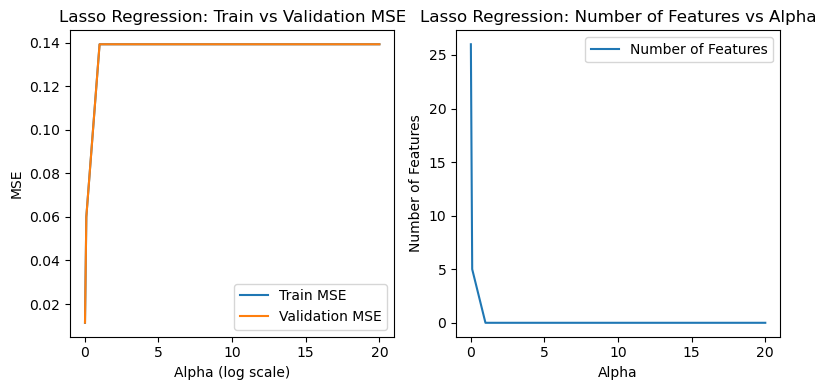

In [62]:
# Plot train and test scores against alpha

def plot_lasso_alpha_vs_score(alpha_range, train_scores, val_scores, n_features, score_label='MSE', sample='Validation'):
    """
    Plots the training and validation MSE scores against alpha values for Lasso regression.
    Also plots the number of features used against alpha values.

    Args:
        alpha_range (list): List of alpha values
    """
    lab = f"{sample} {score_label}"
    print("Train MSE:", [round(v, 5) for v in train_scores])
    print(f"{lab}:  ", [round(float(v), 5) for v in val_scores])

    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1) #n_rows, n_cols, index
    sns.lineplot(x=alpha_range, y=train_scores, label="Train MSE")
    sns.lineplot(x=alpha_range, y=val_scores, label=lab)
    plt.xlabel("Alpha (log scale)")
    plt.ylabel(f"{score_label}")
    plt.title(f"Lasso Regression: Train vs {lab}")
    plt.subplot(1, 2, 2) #n_rows, n_cols, index
    sns.lineplot(x=alpha_range, y=n_features, label="Number of Features")
    plt.xlabel("Alpha")
    plt.ylabel("Number of Features")
    plt.title("Lasso Regression: Number of Features vs Alpha")
    plt.tight_layout()
    plt.show()

plot_lasso_alpha_vs_score(alphas_range, train_scores, val_scores, n_features, score_label='MSE' , sample='Validation')



**Interpretation**
- Train and Validation MSE almost overlap, thus looking like a single line
- Number of features drops to zero quickly with alpha close to 1

In [63]:
# Chosen/ Best alpha value

# Find index of chosen alpha
alpha_index = list(alphas_range).index(chosen_lasso_alpha)

# Get corresponding test score
chosen_test_mse = test_scores[alpha_index]

print(f"We use min Test MSE, to compare with LassoCV later which by default uses MSE")
print("Chosen alpha (Lasso):", chosen_lasso_alpha)
print(f"Chosen alpha (Lasso) with minimum Test MSE: {chosen_lasso_alpha}, Test MSE: {chosen_test_mse:.6f}")

We use min Test MSE, to compare with LassoCV later which by default uses MSE
Chosen alpha (Lasso): 0.01
Chosen alpha (Lasso) with minimum Test MSE: 0.01, Test MSE: 0.011708


#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [64]:
# List of alphas to tune for Lasso regularization
narrow_alpha_range = np.linspace(0.005, 0.1, 30)   # 30 values between 0.005 and 0.1


In [65]:
# Tuning Lasso hyperparameters

def run_lassocv_model(X_train_scaled, X_test_scaled, y_train_log, y_test_log, alpha_range):
    """
    Fits a LassoCV model to the training data and returns predictions for both train and test sets.
    Also returns the chosen alpha value.

    Args:
        X_train_scaled (np.array): Scaled training features
    """
    # There is no scoring parameter in LassoCV, it uses MSE by default
    # cv=5 is same as default KFold(n_splits=5, shuffle=False)
    # cv=KFold(n_splits=5, shuffle=True, random_state=42)
    # shuffle=True randomizes the order of the data before splitting
    # random_state=42 ensures reproducibility (the same splits every time you run)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    lassocv_model = LassoCV(alphas=alpha_range, cv=cv)
    lassocv_model.fit(X_train_scaled, y_train_log)

    y_train_lasso_log_pred = lassocv_model.predict(X_train_scaled)
    y_test_lasso_log_pred = lassocv_model.predict(X_test_scaled)

    # Inverse transform the predictions
    y_train_pred_orig = np.expm1(y_train_lasso_log_pred)
    y_test_pred_orig  = np.expm1(y_test_lasso_log_pred)
    y_train_orig = np.expm1(y_train_log)
    y_test_orig  = np.expm1(y_test_log)

    # metrics on original scale
    best_alpha = lassocv_model.alpha_
    best_score_mae_orig = mean_absolute_error(y_test_orig, y_test_pred_orig)
    best_score_mse_orig = mean_squared_error(y_test_orig, y_test_pred_orig)
    best_score_rmse_orig = np.sqrt(best_score_mse_orig)

    print(f"Best alpha (using LassoCV): {best_alpha}")
    print(f"Test MAE (original scale): {best_score_mae_orig:.2f}, RMSE: {best_score_rmse_orig:.2f}, MSE: {best_score_mse_orig:.2f}")

    return lassocv_model, y_train_lasso_log_pred, y_test_lasso_log_pred, best_alpha, best_score_mae_orig, best_score_mse_orig

Final LassoCV Model - Analyze Model Performance (on original scale):
Best alpha (using LassoCV): 0.005
Test MAE (original scale): 1301.57, RMSE: 2056.93, MSE: 4230953.61


dataset         rmse          std           mse           var  \
0  Training  2014.354420  6323.232932  4.057624e+06  3.998327e+07   
1      Test  2056.928196  6225.883135  4.230954e+06  3.876162e+07   

           mae          mean      mape        r2  
0  1288.382295  16884.875109  0.074671  0.898507  
1  1301.573021  16946.799768  0.075093  0.890805

Final LassoCV Model - Plot of Residuals vs Predicted (on original scale):


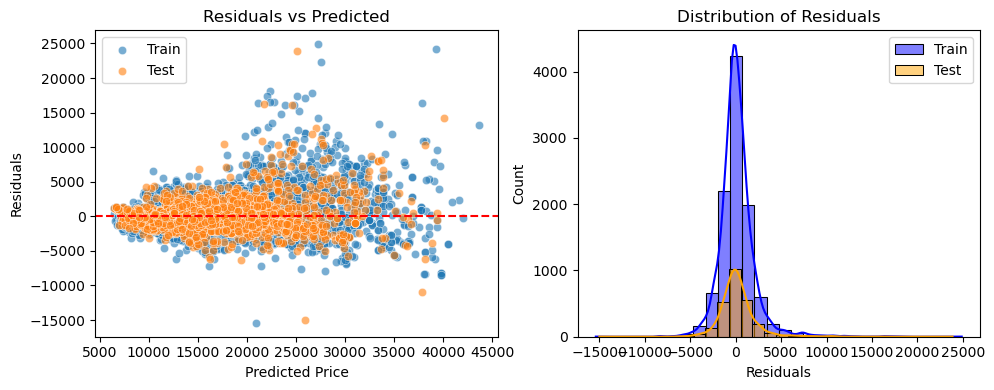

In [75]:
# Best alpha value using LassoCV model

def find_lasso_best_alpha(X_train_scaled, X_test_scaled, y_train_log, y_test_log, alpha_range):

    print(f"Final LassoCV Model - Analyze Model Performance (on original scale):")
    lassocv_model, y_train_lasso_log_pred, y_test_lasso_log_pred, best_alpha, best_score_mae, best_score_mse = run_lassocv_model(X_train_scaled, X_test_scaled, y_train_log, y_test_log, alpha_range)

    lassocv_results = analyze_model_performance(y_train_log, y_train_lasso_log_pred, y_test_log, y_test_lasso_log_pred)
    print(f"Final LassoCV Model - Plot of Residuals vs Predicted (on original scale):")
    plot_residuals_vs_predicted(y_train_log, y_train_lasso_log_pred, y_test_log, y_test_lasso_log_pred)


    return lassocv_model, lassocv_results, y_train_lasso_log_pred, y_test_lasso_log_pred, best_alpha, best_score_mae, best_score_mse

lassocv_model, lassocv_results, y_train_lasso_log_pred, y_test_lasso_log_pred, best_lasso_alpha, best_score_mae, best_score_mse = find_lasso_best_alpha(X_train_scaled, X_test_scaled, y_train_log, y_test_log, narrow_alpha_range)



Plot the train and test scores using lasso() tuning and min negative MSE
Train MSE: [0.0103, 0.01099, 0.01176, 0.01263, 0.01357, 0.01468, 0.01595, 0.01729, 0.01878, 0.0204, 0.02216, 0.02405, 0.0261, 0.0283, 0.03044, 0.03246, 0.0346, 0.03686, 0.03902, 0.04124, 0.04324, 0.04533, 0.04752, 0.04981, 0.05177, 0.05332, 0.05491, 0.05655, 0.05825, 0.05998]
Test MSE:   [0.01062, 0.01132, 0.01205, 0.0129, 0.0138, 0.01487, 0.01611, 0.01743, 0.01889, 0.02048, 0.02219, 0.02404, 0.02604, 0.02819, 0.03027, 0.03223, 0.03431, 0.03652, 0.03862, 0.04078, 0.04271, 0.04474, 0.04685, 0.04905, 0.0509, 0.05232, 0.05378, 0.05529, 0.05685, 0.05845]


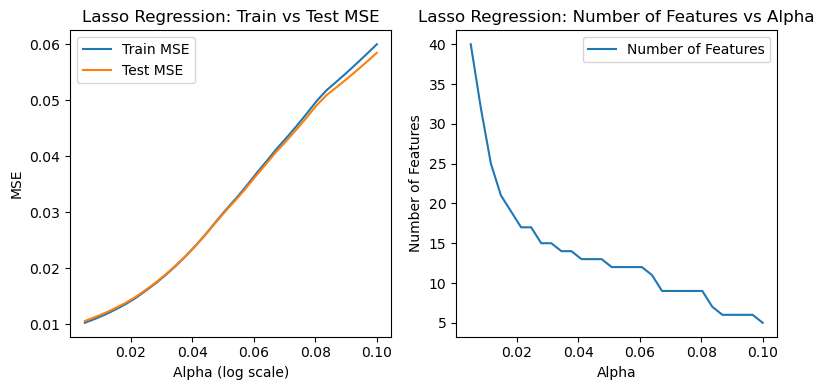

In [76]:
# Plot train and test scores against narrow alpha range, using lasso() tuning
print(f"Plot the train and test scores using lasso() tuning and min negative MSE")
train_scores, val_scores, test_scores, n_features, chosen_lasso_alpha = lasso_model_tuning(X_train_scaled, X_test_scaled, y_train_log, y_test_log, narrow_alpha_range, scoring='neg_mean_squared_error')
plot_lasso_alpha_vs_score(narrow_alpha_range, train_scores, test_scores, n_features, score_label='MSE' , sample='Test')


In [77]:

print (best_lasso_alpha)

0.005


Best alpha (using LassoCV): 0.005
Test MAE (original scale): 1301.57, RMSE: 2056.93, MSE: 4230953.61
Final LassoCV Model - Analyze Model Performance (on original scale):


dataset         rmse          std           mse           var  \
0  Training  2014.354420  6323.232932  4.057624e+06  3.998327e+07   
1      Test  2056.928196  6225.883135  4.230954e+06  3.876162e+07   

           mae          mean      mape        r2  
0  1288.382295  16884.875109  0.074671  0.898507  
1  1301.573021  16946.799768  0.075093  0.890805

Since the model was trained on log-transformed prices, the coefficients represent the 
percentage change in price (approximately) for a one-standard-deviation increase in 
the respective feature, holding others constant.
Since the model was trained on log-transformed prices, the coefficients represent the 
percentage change in price (approximately) for a one-standard-deviation increase in 
the respective feature, holding others constant.
---------------------------------------------------------------------------
Top 10 Lasso features and coefficients, with sign


feature  coef_log_scale  coef_abs sign  approx_%_change  \
15      make_model_Opel Corsa       -0.137035  0.137035    -       -12.806070   
17    make_model_Renault Clio       -0.108059  0.108059    -       -10.242544   
2                         age       -0.093138  0.093138    -        -8.893251   
30        gearing_type_Manual       -0.063029  0.063029    -        -6.108418   
14      make_model_Opel Astra       -0.058836  0.058836    -        -5.713882   
18  make_model_Renault Espace        0.051623  0.051623    +         5.297885   
4                       hp_kw        0.051275  0.051275    +         5.261201   
13         make_model_Audi A3        0.047919  0.047919    +         4.908592   
10                km_per_year       -0.034344  0.034344    -        -3.376048   
0                          km       -0.033002  0.033002    -        -3.246368   

    dropped  
15    False  
17    False  
2     False  
30    False  
14    False  
18    False  
4     False  
13    False  
10    False  
0     False

---------------------------------------------------------------------------
Bottom 10 Lasso features and coefficients, with sign
---------------------------------------------------------------------------


feature  coef_log_scale  \
57   comfort_convenience_Electrically adjustable seats             0.0   
53       comfort_convenience_Keyless central door lock             0.0   
51   comfort_convenience_Parking assist system sens...             0.0   
50                  comfort_convenience_Tinted windows             0.0   
49                  comfort_convenience_Lumbar support             0.0   
48               comfort_convenience_Start-stop system             0.0   
45                   comfort_convenience_Power windows            -0.0   
44   comfort_convenience_Parking assist system sens...             0.0   
41   comfort_convenience_Multi-function steering wheel             0.0   
103                 safety_security_Blind spot monitor             0.0   

     coef_abs sign  approx_%_change  dropped  
57        0.0    0              0.0     True  
53        0.0    0              0.0     True  
51        0.0    0              0.0     True  
50        0.0    0              0.0     True  
49        0.0    0              0.0     True  
48        0.0    0              0.0     True  
45        0.0    0              0.0     True  
44        0.0    0              0.0     True  
41        0.0    0              0.0     True  
103       0.0    0              0.0     True

---------------------------------------------------------------------------
Dropped Lasso features and coefficients
---------------------------------------------------------------------------
Total features dropped (coeff=0): 64 out of 104


feature  coef_log_scale  \
87                         safety_security_Side airbag             0.0   
99           safety_security_Emergency brake assistant             0.0   
70                          extras_Catalytic Converter             0.0   
71                                extras_Voice Control            -0.0   
72                                  extras_Sport seats             0.0   
..                                                 ...             ...   
48               comfort_convenience_Start-stop system             0.0   
45                   comfort_convenience_Power windows            -0.0   
44   comfort_convenience_Parking assist system sens...             0.0   
41   comfort_convenience_Multi-function steering wheel             0.0   
103                 safety_security_Blind spot monitor             0.0   

     coef_abs sign  approx_%_change  dropped  
87        0.0    0              0.0     True  
99        0.0    0              0.0     True  
70        0.0    0              0.0     True  
71        0.0    0              0.0     True  
72        0.0    0              0.0     True  
..        ...  ...              ...      ...  
48        0.0    0              0.0     True  
45        0.0    0              0.0     True  
44        0.0    0              0.0     True  
41        0.0    0              0.0     True  
103       0.0    0              0.0     True  

[64 rows x 6 columns]

Final LassoCV Model - Plot of Residuals vs Predicted


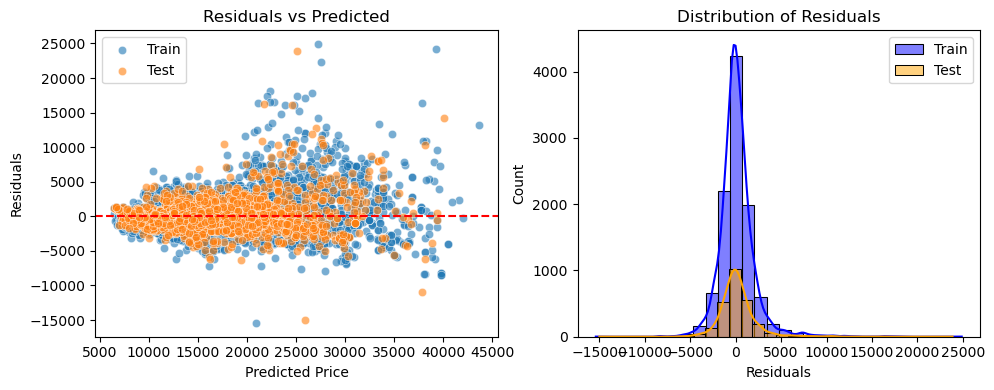

In [80]:
# Set best alpha for Lasso regression


def show_lasso_coefficients(lassocv_model, X_train):

    best_alpha = [best_lasso_alpha]
    lassocv_model, y_train_lasso_log_pred, y_test_lasso_log_pred, best_alpha, best_score_mae_orig, best_score_mse_orig = run_lassocv_model(X_train_scaled, X_test_scaled, y_train_log, y_test_log, best_alpha)

    print(f"Final LassoCV Model - Analyze Model Performance (on original scale):")
    lassocv_results = analyze_model_performance(y_train_log, y_train_lasso_log_pred, y_test_log, y_test_lasso_log_pred)


    lassocv_coeff = pd.DataFrame({
        'feature'  : X_train.columns,
        'coef_log_scale'     : lassocv_model.coef_,
        'coef_abs' : np.abs(lassocv_model.coef_),
        'sign'     : np.where(lassocv_model.coef_>0, "+", np.where(lassocv_model.coef_<0, "-","0"))  
    }).sort_values(by='coef_abs', ascending=False)

    # approximate the effect in % terms for small coefficients
    lassocv_coeff['approx_%_change'] = (np.exp(lassocv_coeff['coef_log_scale']) - 1) * 100
    lassocv_coeff['dropped'] = lassocv_coeff['coef_abs'] == 0

    # Display top N positive and negative coefficients
    print(f"Since the model was trained on log-transformed prices, the coefficients represent the ")
    print(f"percentage change in price (approximately) for a one-standard-deviation increase in ")
    print(f"the respective feature, holding others constant.")
    

    # Print the top N coefficients by absolute value and sign
    print(f"Since the model was trained on log-transformed prices, the coefficients represent the ")
    print(f"percentage change in price (approximately) for a one-standard-deviation increase in ")
    print(f"the respective feature, holding others constant.")
    print("-" * 75)
    print(f"Top 10 Lasso features and coefficients, with sign")
    display(lassocv_coeff.head(10))
    print("-" * 75)
    print(f"Bottom 10 Lasso features and coefficients, with sign")
    print("-" * 75)
    display(lassocv_coeff.tail(10))
    print("-" * 75)
    print(f"Dropped Lasso features and coefficients")
    print("-" * 75)
    print(f"Total features dropped (coeff=0): {lassocv_coeff['dropped'].sum()} out of {len(lassocv_coeff)}")
    display(lassocv_coeff[lassocv_coeff['dropped']==True])

    print(f"Final LassoCV Model - Plot of Residuals vs Predicted")
    plot_residuals_vs_predicted(y_train_log, y_train_lasso_log_pred, y_test_log, y_test_lasso_log_pred)

    return lassocv_coeff, lassocv_results

lassocv_coeff, lassocv_results = show_lasso_coefficients(lassocv_model, X_train)

---------------------------------------------------------------------------
Lasso Coefficient Path Visualization
visualize how coefficients shrink as α increases:
---------------------------------------------------------------------------


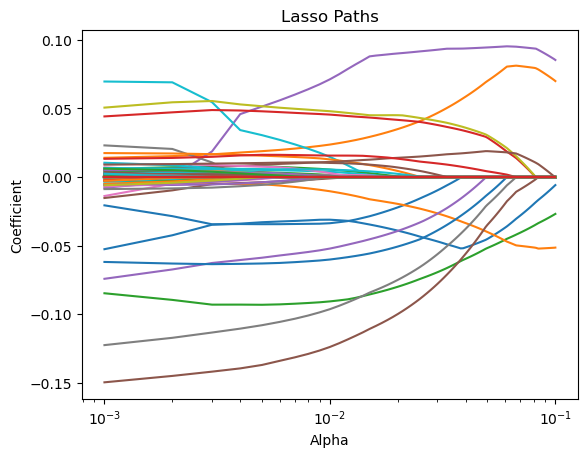

In [ ]:
def coeff_path_visualization():

    alphas_lasso, coefs_lasso, _ = lasso_path(X_train_scaled, y_train_log, alphas=np.linspace(0.001, 0.1, 100))
    plt.plot(alphas_lasso, coefs_lasso.T)
    plt.xscale('log')
    plt.title("Lasso Paths")
    plt.xlabel("Alpha")
    plt.ylabel("Coefficient")
    plt.show()

print("-"*75)
print(f"Lasso Coefficient Path Visualization")
print(f"visualize how coefficients shrink as α increases:")
print("-"*75)
coeff_path_visualization()


In [81]:
# Evaluate the Lasso model on the test data

print("Final Test Evaluation:")

print(f"R²: {lassocv_results.loc[lassocv_results['dataset'] == 'Test']['r2'].values[0]:.4f}")
print(f"MAE: {lassocv_results.loc[lassocv_results['dataset'] == 'Test']['mae'].values[0]:.2f}")
print(f"MSE: {lassocv_results.loc[lassocv_results['dataset'] == 'Test']['mse'].values[0]:.2f}")
print(f"RMSE: {lassocv_results.loc[lassocv_results['dataset'] == 'Test']['rmse'].values[0]:.2f}")


Final Test Evaluation:
R²: 0.8908
MAE: 1301.57
MSE: 4230953.61
RMSE: 2056.93


**Interpretation Summary Best α (regularization strength): 0.005**
- Lasso regression delivered a highly interpretable, parsimonious model that retained ~40 key predictors explaining 89% of the price variation.
- It successfully eliminated redundant comfort and safety features while maintaining strong predictive performance comparable to Ridge and Linear models.
- Dominant predictors include model type (Opel, Renault, Audi), age, horsepower, gear type, and annual mileage, all intuitively aligned with real-world car valuation drivers.

| Metric   | Training | Test    | Interpretation                                                                          |
| -------- | -------- | ------- | --------------------------------------------------------------------------------------- |
| **RMSE** | 2014.35  | 2056.93 | Prediction error ~2000 on average, consistent across train/test → minimal overfitting. |
| **MAE**  | 1288.38  | 1301.57 | Typical prediction error ≈ 1300, showing good generalization.                          |
| **R²**   | 0.8985   | 0.8908  | Model explains ~89% of price variability — excellent for a sparse linear model.         |


**Best α (regularization strength): 0.005**
- → A relatively low alpha, meaning only mild regularization was required.
- The model still benefits from L1 shrinkage while retaining key predictors.

- MSE (Test): 4.23M, consistent with Ridge and Linear results — confirming stable variance–bias balance.

**Feature Selection Behavior**
- Total features in model: 104
- Features retained (non-zero coefficients): 40
- Features dropped (set to zero by L1 penalty): 64

This confirms that Lasso performed strong feature selection, removing ~61% of predictors.

Most dropped variables were comfort, extras, and safety features, which are either:
- Highly correlated with brand/model, or
- Low-variance binary indicators that don’t independently explain price variation.

### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [82]:
# Compare metrics for each model

def compare_combined_metrics():
    # Copy each model's result and add labels
    baseline_df = baseline_model_results.copy()
    baseline_df["Model"] = "Linear"
    baseline_df["Alpha"] = "-"

    ridge_df = ridge_results.copy()
    ridge_df["Model"] = "RidgeCV"
    ridge_df["Alpha"] = best_ridge_alpha

    lasso_df = lassocv_results.copy()
    lasso_df["Model"] = "LassoCV"
    lasso_df["Alpha"] = best_lasso_alpha

    # Combine into one table
    combined_df = pd.concat([baseline_df, ridge_df, lasso_df], ignore_index=True)

    # Reorder columns for readability
    cols = ["Model", "Alpha", "dataset", "rmse", "std", "mse", "var", "mae", "mean", "mape", "r2"]
    combined_df = combined_df[cols]

    return combined_df

combined_metrics = compare_combined_metrics()
display(combined_metrics)


Model  Alpha   dataset         rmse          std           mse  \
0   Linear      -  Training  1890.889624  6323.232932  3.575464e+06   
1   Linear      -      Test  1907.033451  6225.883135  3.636777e+06   
2  RidgeCV   0.01  Training  1890.886842  6323.232932  3.575453e+06   
3  RidgeCV   0.01      Test  1907.034162  6225.883135  3.636779e+06   
4  LassoCV  0.005  Training  2014.354420  6323.232932  4.057624e+06   
5  LassoCV  0.005      Test  2056.928196  6225.883135  4.230954e+06   

            var          mae          mean      mape        r2  
0  3.998327e+07  1210.026725  16884.875109  0.070142  0.910567  
1  3.876162e+07  1221.702503  16946.799768  0.070641  0.906140  
2  3.998327e+07  1210.026185  16884.875109  0.070142  0.910568  
3  3.876162e+07  1221.702072  16946.799768  0.070640  0.906139  
4  3.998327e+07  1288.382295  16884.875109  0.074671  0.898507  
5  3.876162e+07  1301.573021  16946.799768  0.075093  0.890805

**Interpretation strategy**

***Overall Model Performance***
- All three models perform exceptionally well, achieving R² ≈ 0.89–0.91, meaning they explain ~90% of the variance in car prices.
- RMSE values around 1,900–2,000 indicate that the models predict car prices within roughly ±2,000 on average.
- MAE is between 1,200–1,300, meaning the typical deviation between predicted and actual prices is around 6–8% of the mean car price (~17,000).
- The near-identical training and test metrics across all models show excellent generalization — no signs of overfitting or underfitting.
- If Linear Regression has the lowest test error → data is not very multicollinear, and regularization doesn’t add much.
- If Ridge improves test performance slightly but reduces variance → multicollinearity was an issue, Ridge is stabilizing coefficients.
- If Lasso performs better (or gives similar error with fewer features) → many coefficients were not important, and Lasso added interpretability by feature selection.
- **If all three are almost the same → dataset may be “well-behaved,” and regularization isn’t critical here.**

#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

In [83]:
print("Linear columns:", lr_coeff.columns.tolist())
print("Ridge columns:", ridgecv_coeff.columns.tolist())
print("Lasso columns:", lassocv_coeff.columns.tolist())


Linear columns: ['feature', 'coef_log_scale', 'coef_abs', 'sign']
Ridge columns: ['feature', 'coef_log_scale', 'coef_abs', 'sign', 'approx_%_change']
Lasso columns: ['feature', 'coef_log_scale', 'coef_abs', 'sign', 'approx_%_change', 'dropped']


In [102]:
# Get top 10 features by absolute value for each model
top10_linear = lr_coeff.nlargest(10, 'coef_abs')[['feature', 'coef_log_scale']]
top10_ridge  = ridgecv_coeff.nlargest(10, 'coef_abs')[['feature', 'coef_log_scale']]
top10_lasso  = lassocv_coeff.nlargest(10, 'coef_abs')[['feature', 'coef_log_scale']]

# Rename columns
top10_linear = top10_linear.rename(columns={'coef_log_scale': 'Linear Coef'})
top10_ridge  = top10_ridge.rename(columns={'coef_log_scale': 'Ridge Coef'})
top10_lasso  = top10_lasso.rename(columns={'coef_log_scale': 'Lasso Coef'})

# Merge them — outer join on feature names
comparison_df = (
    top10_linear
    .merge(top10_ridge, on='feature', how='outer')
    .merge(top10_lasso, on='feature', how='outer')
    .fillna(0)  # fill missing values with 0 for clarity
)

# Round for readability

for model in ['Linear', 'Ridge', 'Lasso']:
    comparison_df[f'{model} %Impact'] = (np.exp(comparison_df[f'{model} Coef']) - 1) * 100

comparison_df['Avg %Impact'] = comparison_df[[f'{m} %Impact' for m in ['Linear', 'Ridge', 'Lasso']]].mean(axis=1)
comparison_df = comparison_df.round({'Linear %Impact': 2, 'Ridge %Impact': 2, 'Lasso %Impact': 2, 'Avg %Impact': 2})
comparison_df['Abs Avg %Impact'] = comparison_df['Avg %Impact'].abs().round(2)

#comparison_df[['Linear Coef', 'Ridge Coef', 'Lasso Coef']] = comparison_df[['Linear Coef', 'Ridge Coef', 'Lasso Coef']].round(4)
#comparison_df['Average Coef'] = abs(comparison_df[['Linear Coef', 'Ridge Coef', 'Lasso Coef']].mean(axis=1).round(4))
#comparison_df['% Avg Impact (approx)'] = (np.exp(comparison_df['Average Coef']) - 1) * 100

# Sort by absolute value of average impact

comparison_df = comparison_df.sort_values(by='Abs Avg %Impact', ascending=False)
# Display neatly
print("Top 10 Coefficients Comparison (Linear, Ridge, Lasso)")
print("% Average Impact = Coefficients converted into approximate percentage change in price, ")
print(f"using: (exp(coef) - 1) * 100")


display(comparison_df[['feature', 'Linear %Impact', 'Ridge %Impact', 'Lasso %Impact', 'Avg %Impact', 'Abs Avg %Impact']])


Top 10 Coefficients Comparison (Linear, Ridge, Lasso)
% Average Impact = Coefficients converted into approximate percentage change in price, 
using: (exp(coef) - 1) * 100


feature  Linear %Impact  Ridge %Impact  Lasso %Impact  \
7       make_model_Opel Corsa          -14.78         -14.78         -12.81   
8     make_model_Renault Clio          -12.50         -12.50         -10.24   
10            power_to_weight           13.69          13.68           0.00   
0                         age           -7.63          -7.63          -8.89   
6       make_model_Opel Astra           -7.81          -7.81          -5.71   
1         gearing_type_Manual           -5.87          -5.87          -6.11   
9   make_model_Renault Espace            5.21           5.21           5.30   
3                          km           -6.21          -6.21          -3.25   
11                  weight_kg            5.78           5.78           0.00   
2                       hp_kw           -5.75          -5.75           5.26   
5          make_model_Audi A3            0.00           0.00           4.91   
4                 km_per_year            0.00           0.00          -3.38   

    Avg %Impact  Abs Avg %Impact  
7        -14.12            14.12  
8        -11.75            11.75  
10         9.12             9.12  
0         -8.05             8.05  
6         -7.11             7.11  
1         -5.95             5.95  
9          5.24             5.24  
3         -5.22             5.22  
11         3.85             3.85  
2         -2.08             2.08  
5          1.64             1.64  
4         -1.13             1.13

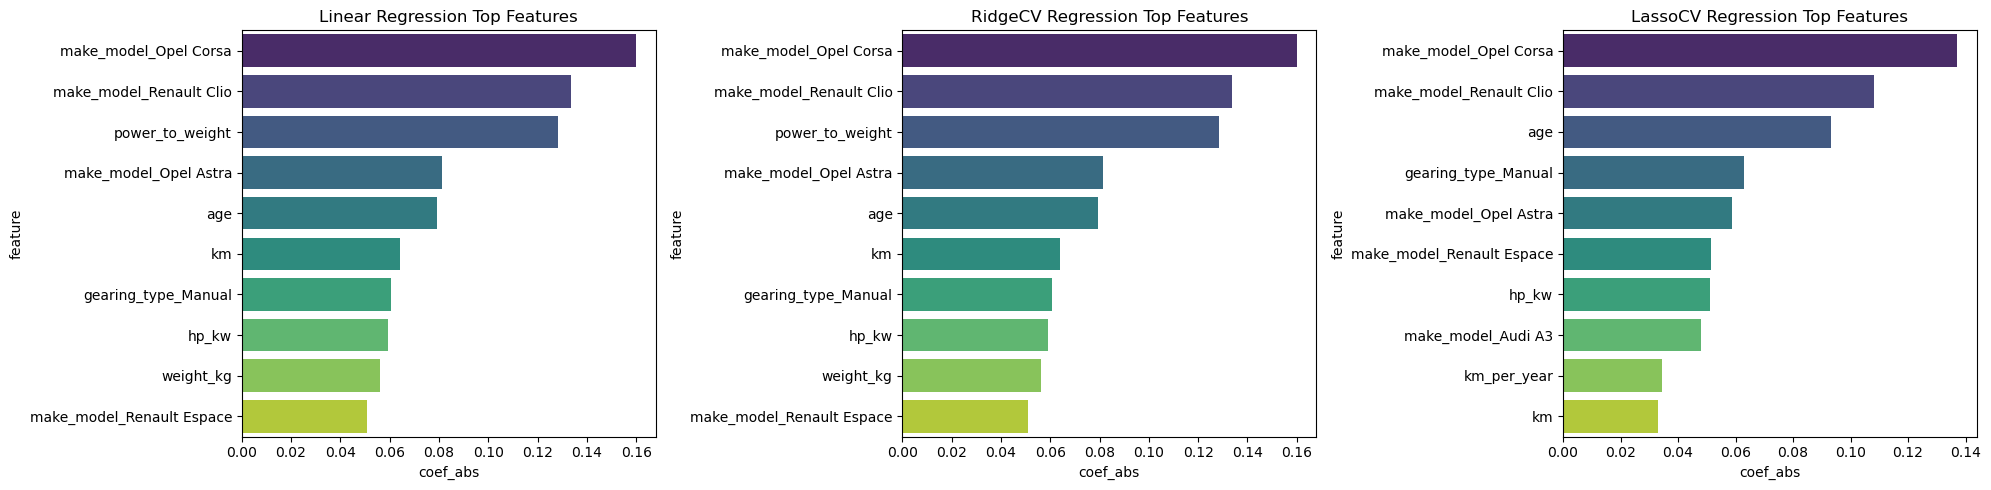

In [85]:
# Compare Top-10 parameters from the 3 models
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data=lr_coeff.head(10), x='coef_abs', y='feature', palette='viridis')
plt.title("Linear Regression Top Features")
plt.subplot(1,3,2)
sns.barplot(data=ridgecv_coeff.head(10), x='coef_abs', y='feature', palette='viridis')
plt.title("RidgeCV Regression Top Features")
plt.subplot(1,3,3)
sns.barplot(data=lassocv_coeff.head(10), x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Top Features")
plt.tight_layout()
plt.show()

In [87]:
# Get top 10 features by absolute value for each model
bot10_linear = lr_coeff.nsmallest(10, 'coef_abs')[['feature', 'coef_log_scale']]
bot10_ridge  = ridgecv_coeff.nsmallest(10, 'coef_abs')[['feature', 'coef_log_scale']]
bot10_lasso  = lassocv_coeff.nsmallest(10, 'coef_abs')[['feature', 'coef_log_scale']]

# Rename columns
bot10_linear = bot10_linear.rename(columns={'coef_log_scale': 'Linear Coef'})
bot10_ridge  = bot10_ridge.rename(columns={'coef_log_scale': 'Ridge Coef'})
bot10_lasso  = bot10_lasso.rename(columns={'coef_log_scale': 'Lasso Coef'})

# Merge them — outer join on feature names
comparison_bot_df = (
    bot10_linear
    .merge(bot10_ridge, on='feature', how='outer')
    .merge(bot10_lasso, on='feature', how='outer')
    .fillna(0)  # fill missing values with 0 for clarity
)

# Round for readability
comparison_bot_df[['Linear Coef', 'Ridge Coef', 'Lasso Coef']] = comparison_bot_df[['Linear Coef', 'Ridge Coef', 'Lasso Coef']].round(4)
comparison_bot_df['Average Coef'] = abs(comparison_bot_df[['Linear Coef', 'Ridge Coef', 'Lasso Coef']].mean(axis=1).round(4))
comparison_bot_df = comparison_bot_df.sort_values(by='Average Coef', ascending=False).drop(columns=['Average Coef']).reset_index(drop=True)
# Display neatly
print("Bottom 10 Coefficients Comparison (Linear, Ridge, Lasso)")
display(comparison_bot_df)


Bottom 10 Coefficients Comparison (Linear, Ridge, Lasso)


feature  Linear Coef  \
0                                    extras_Roof rack       0.0007   
1            safety_security_Traffic sign recognition       0.0005   
2                  safety_security_Blind spot monitor       0.0003   
3     safety_security_Tire pressure monitoring system       0.0003   
4          safety_security_LED Daytime Running Lights      -0.0002   
5               comfort_convenience_Electric tailgate      -0.0002   
6               entertainment_media_On-board computer      -0.0002   
7                                 extras_Touch screen       0.0000   
8                                extras_Voice Control       0.0000   
9                                  make_model_Audi A2      -0.0000   
10        comfort_convenience_Electrical side mirrors       0.0000   
11                                 extras_Sport seats       0.0000   
12  safety_security_Central door lock with remote ...       0.0000   
13          safety_security_Emergency brake assistant       0.0000   
14                        safety_security_Head airbag       0.0000   
15                         extras_Catalytic Converter       0.0000   
16                        safety_security_Side airbag       0.0000   
17                       safety_security_Alarm system      -0.0000   

    Ridge Coef  Lasso Coef  
0       0.0007         0.0  
1       0.0005         0.0  
2       0.0003         0.0  
3       0.0003        -0.0  
4      -0.0002         0.0  
5      -0.0002         0.0  
6      -0.0002         0.0  
7       0.0000         0.0  
8       0.0000        -0.0  
9       0.0000         0.0  
10      0.0000         0.0  
11      0.0000         0.0  
12      0.0000        -0.0  
13      0.0000         0.0  
14      0.0000        -0.0  
15      0.0000         0.0  
16      0.0000         0.0  
17     -0.0000         0.0

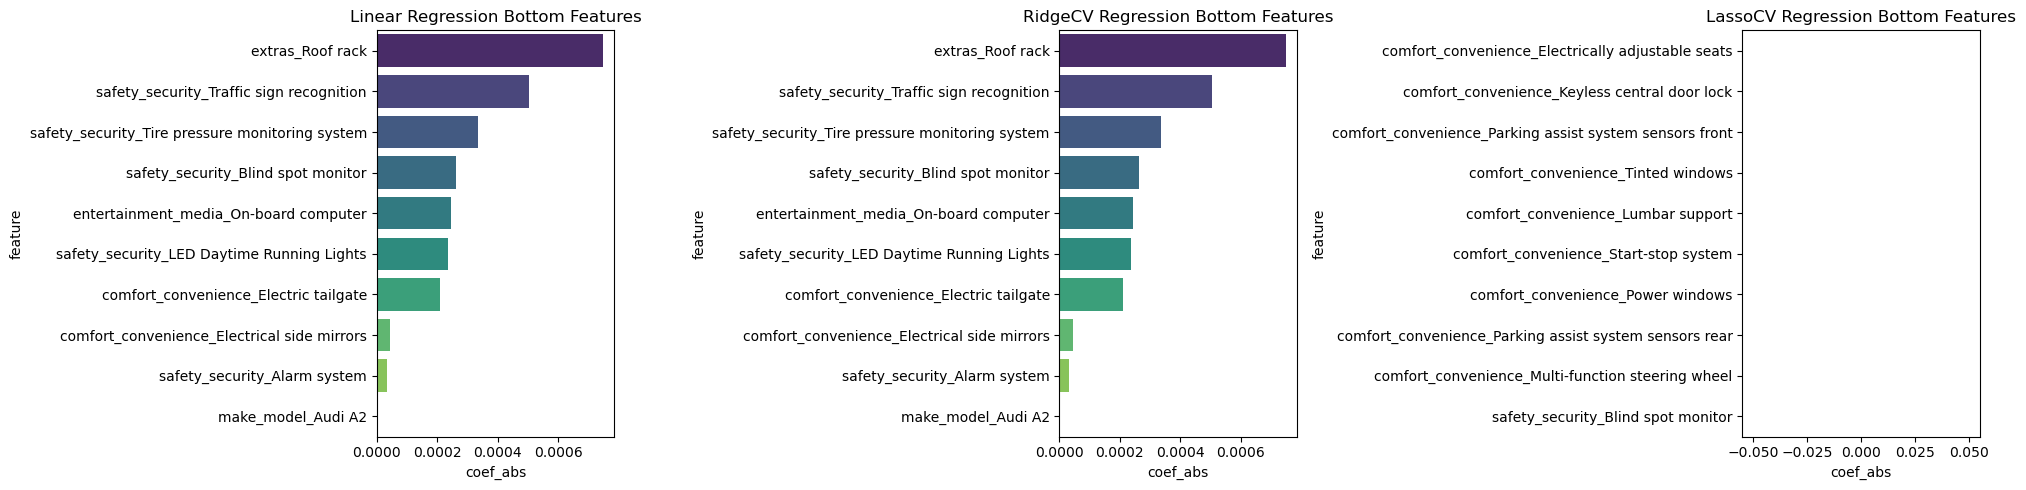

In [88]:
# Compare Bottom-10 parameters from the 3 models
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data=lr_coeff.tail(10), x='coef_abs', y='feature', palette='viridis')
plt.title("Linear Regression Bottom Features")
plt.subplot(1,3,2)
sns.barplot(data=ridgecv_coeff.tail(10), x='coef_abs', y='feature', palette='viridis')
plt.title("RidgeCV Regression Bottom Features")
plt.subplot(1,3,3)
sns.barplot(data=lassocv_coeff.tail(10), x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Bottom Features")
plt.tight_layout()
plt.show()

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

In [89]:
# Get top 10, bottom 10, and dropped Lasso features
top10_lasso = lassocv_coeff.nlargest(10, 'coef_abs')[['feature', 'coef_log_scale']].reset_index(drop=True)
bot10_lasso = lassocv_coeff[lassocv_coeff['coef_abs'] != 0].nsmallest(10, 'coef_abs')[['feature', 'coef_log_scale']].reset_index(drop=True)
dropped_lasso = lassocv_coeff[lassocv_coeff['dropped'] == True][['feature', 'coef_log_scale']].reset_index(drop=True)

# Fill shorter lists so all have same length (for side-by-side display)
max_len = max(len(top10_lasso), len(bot10_lasso), len(dropped_lasso))
top10_lasso = top10_lasso.reindex(range(max_len)).fillna('—')
bot10_lasso = bot10_lasso.reindex(range(max_len)).fillna('—')
dropped_lasso = dropped_lasso.reindex(range(max_len)).fillna('—')

# Combine side by side
comparison_lasso_df = pd.DataFrame({
    'Top 10 Coef Name'    : top10_lasso['feature'],
    'Top 10 Coef'         : top10_lasso['coef_log_scale'],
    'Bottom 10 Coef Name' : bot10_lasso['feature'],
    'Bottom 10 Coef'      : bot10_lasso['coef_log_scale'],
    'Dropped Coef Name'   : dropped_lasso['feature'],
    'Dropped Coef'        : dropped_lasso['coef_log_scale']
})

# Display neatly
print("✅ Lasso Model – Top 10, Bottom 10, and Dropped Coefficients (Side-by-Side)")
display(comparison_lasso_df)


✅ Lasso Model – Top 10, Bottom 10, and Dropped Coefficients (Side-by-Side)


Top 10 Coef Name Top 10 Coef                   Bottom 10 Coef Name  \
0     make_model_Opel Corsa   -0.137035                       previous_owners   
1   make_model_Renault Clio   -0.108059      comfort_convenience_Light sensor   
2                       age   -0.093138               extras_Sport suspension   
3       gearing_type_Manual   -0.063029       comfort_convenience_Rain sensor   
4     make_model_Opel Astra   -0.058836  comfort_convenience_Air conditioning   
..                      ...         ...                                   ...   
59                        —           —                                     —   
60                        —           —                                     —   
61                        —           —                                     —   
62                        —           —                                     —   
63                        —           —                                     —   

   Bottom 10 Coef                                  Dropped Coef Name  \
0        -0.00015                        safety_security_Side airbag   
1        0.000162          safety_security_Emergency brake assistant   
2        0.000307                         extras_Catalytic Converter   
3        0.000676                               extras_Voice Control   
4         0.00069                                 extras_Sport seats   
..            ...                                                ...   
59              —              comfort_convenience_Start-stop system   
60              —                  comfort_convenience_Power windows   
61              —  comfort_convenience_Parking assist system sens...   
62              —  comfort_convenience_Multi-function steering wheel   
63              —                 safety_security_Blind spot monitor   

    Dropped Coef  
0            0.0  
1            0.0  
2            0.0  
3           -0.0  
4            0.0  
..           ...  
59           0.0  
60          -0.0  
61           0.0  
62           0.0  
63           0.0  

[64 rows x 6 columns]

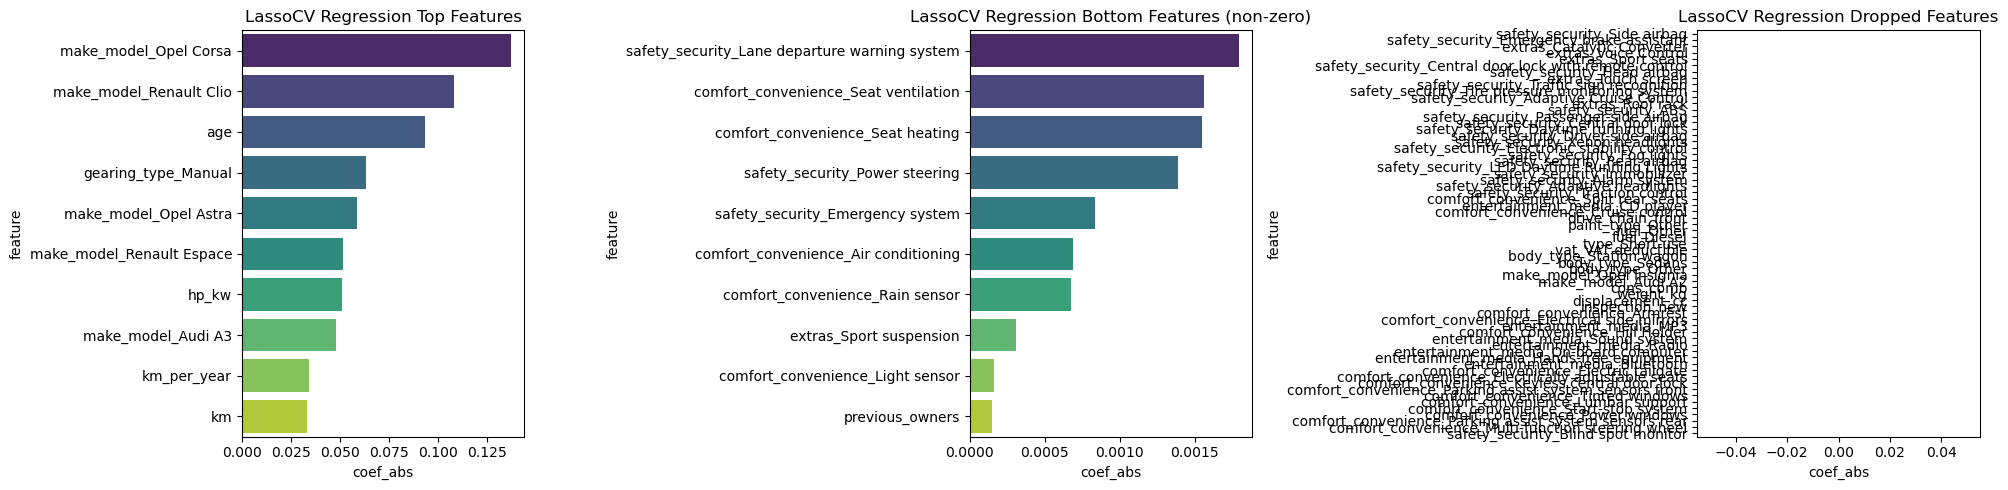

In [90]:
# Compare highest coefficients, lowest coeffs and coefficients of eliminated features - Lasso
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data=lassocv_coeff.head(10), x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Top Features")
plt.subplot(1,3,2)
# get bottom 10 non-zero coefficients
sns.barplot(data=lassocv_coeff[lassocv_coeff['coef_abs'] != 0].tail(10), x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Bottom Features (non-zero)")
plt.subplot(1,3,3)
sns.barplot(data=lassocv_coeff[lassocv_coeff['coef_abs'] == 0], x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Dropped Features")
plt.tight_layout()
plt.show()

## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>

### Model Comparison Conclusion

| Model       | Alpha | RMSE    | MSE        | MAE     | MAPE   | R²     |
| ----------- | ----- | ------- | ---------- | ------- | ------ | ------ |
| **Linear**  | –     | 1907.03 | 3.6368e+06 | 1221.70 | 0.0706 | 0.9061 |
| **RidgeCV** | 0.01  | 1907.03 | 3.6368e+06 | 1221.70 | 0.0706 | 0.9061 |
| **LassoCV** | 0.005 | 2056.93 | 4.2309e+06 | 1301.57 | 0.0751 | 0.8908 |


#### Observations

- All three models perform very closely, with Linear and Ridge being nearly identical in predictive accuracy:  
  - RMSE ≈ 1907, MAE ≈ 1222, R² ≈ 0.906
  - LassoCV performs slightly below in predictive accuracy but gains interpretability by pruning irrelevant features.
  → Predictive accuracy is effectively the same with R² 0.89 to 0.91 for all models.

##### RidgeCV
- Chosen **α = 0.01**
- Metrics nearly identical to the baseline linear regression.
- Regularization doesn’t change predictions much but:
  - Stabilizes coefficients.
  - Slightly reduces overfitting and multicollinearity risk.
- Best suited when you want to retain all features but make them less sensitive to correlation.

##### LassoCV
- Chosen **α = 0.005**
- Predictive performance slightly lower (R² drops from 0.906 → 0.891), but:
  - Feature selection kicks in: 64 of 104 features were dropped.
  - Model becomes leaner and easier to interpret.
- Excellent choice when simplification and interpretability are priorities.

##### Baseline Linear Regression
- Already strong: R² ≈ 0.906, MAE ≈ 1222.
- Regularization adds minimal value for predictive accuracy, but improves generalization and interpretability when coefficients are highly correlated.

#### Model Performance Comparison Summary
- **Predictive Power:** Linear and Ridge models are virtually indistinguishable. Lasso sacrifices a small fraction of accuracy for clarity.
- **RidgeCV:** Ideal for managing multicollinearity while keeping all features.
- **LassoCV:** Ideal for feature selection — removes redundant predictors and sharpens interpretability.
- **Linear Regression:** Provides a robust baseline. When data is already clean and features are well-behaved, it performs on par with regularized models.

#### Model Behaviour Summary

| Aspect                    | Linear   | Ridge         | Lasso          |
| ------------------------- | -------- | ------------- | -------------- |
| Regularization Strength   | None     | Weak (α=0.01) | Weak (α=0.005) |
| Feature Shrinkage         | No       |  (mild)       |    (strong)    |
| Feature Elimination       | No       |  no           | yes            |
| Multicollinearity Control | No       |  yes          | yes            |
| Interpretability          | Moderate | Moderate      | High           |
| Predictive Accuracy (R²)  | 0.906    | 0.906         | 0.891          |



## Predictors and Coefficients Comparison 

### Top Predictors Across Models

| Feature                   | Linear Coef | Ridge Coef | Lasso Coef | Interpretation                                                                    |
| ------------------------- | ----------- | ---------- | ---------- | --------------------------------------------------------------------------------- |
| make_model_Opel Corsa     | -0.1599     | -0.1599    | -0.1370    | Budget model → strong negative impact.                                            |
| make_model_Renault Clio   | -0.1336     | -0.1336    | -0.1081    | Negative impact — entry-level, lower resale.                                      |
| power_to_weight           | 0.1283      | 0.1283     | 0.0000     | Performance proxy — strong in Linear/Ridge, dropped in Lasso (redundant with hp). |
| age                       | -0.0794     | -0.0794    | -0.0931    | Older cars lose value; consistent across models.                                  |
| make_model_Opel Astra     | -0.0813     | -0.0813    | -0.0588    | Moderate negative impact.                                                         |
| gearing_type_Manual       | -0.0605     | -0.0605    | -0.0630    | Manual cars valued lower.                                                         |
| km                        | -0.0641     | -0.0641    | -0.0330    | More mileage → lower resale.                                                      |
| make_model_Renault Espace | 0.0508      | 0.0508     | 0.0516     | Family model → mild positive value.                                               |
| weight_kg                 | 0.0562      | 0.0562     | 0.0000     | Dropped by Lasso (collinear with hp_kw).                                          |
| hp_kw                     | -0.0593     | -0.0592    | 0.0513     | Power drives price, but interaction effects differ.                               |


### Minor / Negligible Predictors

| Feature                                    | Linear Coef | Ridge Coef | Lasso Coef | Interpretation                             |
| ------------------------------------------ | ----------- | ---------- | ---------- | ------------------------------------------ |
| extras_Roof rack                           | 0.0007      | 0.0007     | 0.0        | Insignificant accessory, no resale effect. |
| safety_security_Traffic sign recognition   | 0.0005      | 0.0005     | 0.0        | Negligible premium.                        |
| safety_security_Blind spot monitor         | 0.0003      | 0.0003     | 0.0        | No measurable impact.                      |
| safety_security_LED Daytime Running Lights | -0.0002     | -0.0002    | 0.0        | Cosmetic only, ignored by Lasso.           |
| comfort_convenience_Electric tailgate      | -0.0002     | -0.0002    | 0.0        | Minimal influence on price.                |
| extras_Touch screen                        | 0.0000      | 0.0000     | 0.0        | Common feature, no price differentiation.  |
| extras_Voice Control                       | 0.0000      | 0.0000     | -0.0       | Negligible or redundant.                   |
| make_model_Audi A2                         | -0.0000     | 0.0000     | 0.0        | Irrelevant; dropped by Lasso.              |
| safety_security_Central door lock...       | 0.0000      | 0.0000     | -0.0       | Basic equipment, zero effect.              |
| extras_Catalytic Converter                 | 0.0000      | 0.0000     | 0.0        | Standardized; zero importance.             |

### Lasso Simplification
| Category            | Count |
| ------------------- | ----: |
| Total features      |   104 |
| Retained (non-zero) |    40 |
| Dropped (coeff = 0) |    64 |

**Lasso Dropped Example Features:**
- extras_Voice Control
- comfort_convenience_Power windows
- safety_security_Blind spot monitor
- extras_Sport seats
- comfort_convenience_Start-stop system

These are redundant or low-impact features — Lasso confirms they don’t contribute meaningfully once stronger predictors (hp, age, mileage, brand/model) are included.

---
#### Summary
- **If interpretability and feature selection matter → Lasso wins.**  
- **If keeping all features while handling collinearity → Ridge is safer.**  
- **If you just want predictive accuracy → even baseline Linear is already strong.**

 


### Business Takeaway

**Key Price Drivers Are Clear and Stable**  
- Engine power (**hp_kw**), mileage (**km**), car age, and certain premium/budget models (Opel/Renault/Audi dummies) consistently dominate price prediction across all models.  
- This confirms where pricing focus should be: high-power, newer, low-mileage, premium models command higher prices, while older, used, and manual vehicles depress resale value.  

**Regularization Supports Decision-Making**  
- **Ridge regression** stabilizes coefficients, reducing risks of overestimating correlated features like engine size and weight.  
- **Lasso regression** identifies irrelevant or redundant features (e.g., comfort convinicence related) that do not meaningfully influence pricing, simplifying analysis and reporting.  

**Actionable Insight for Pricing Strategy**  
- Focus marketing and sales efforts on features that consistently boost value (premium models, high engine power, low mileage).  
- Avoid overcomplicating pricing models with low-impact features; Lasso highlights which features can be safely ignored.  
- Use Ridge when all features matter but multicollinearity exists, ensuring stable coefficient estimates for decision-making.  

**Predictive Accuracy vs Interpretability**  
- All three models (**Linear, Ridge, Lasso**) predict price with near-identical accuracy (R² ≈ 0.895-0.906).  
- Decision-makers should choose model type based on business need:  
  - Simplified, interpretable pricing → **Lasso**  
  - Robust estimates including all features → **Ridge**  
  - Quick baseline insights → **Linear regression**

